In [320]:
%pip install pandas
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [322]:
#switch the years to analyze different years

#data = pd.read_csv('c:/Users/estifo/Downloads/gamma-capture-project/data/DAT_ASCII_EURUSD_M1_2010.csv', header=None, sep=';')

In [323]:
import pandas as pd
import os

# Define the file path pattern (adjust if needed)
base_path = r"C:\Users\estifo\OneDrive\Projects\gamma-capture-project\data"

# List to store DataFrames
data_frames = []

# Loop through years 2010 to 2021
for year in range(2010, 2021):
    file_path = os.path.join(base_path, f'DAT_ASCII_EURUSD_M1_{year}.csv')
    
    # Read CSV file (adjust parameters if needed)
    df = pd.read_csv(file_path, header=None, sep=';')
    
    # Append to list
    data_frames.append(df)

# Concatenate all DataFrames into one
data = pd.concat(data_frames, ignore_index=True)

# Display first few rows to confirm
print(data.head())

                 0       1       2       3       4  5
0  20100103 170000  1.4301  1.4304  1.4301  1.4304  0
1  20100103 170100  1.4303  1.4303  1.4303  1.4303  0
2  20100103 170200  1.4302  1.4303  1.4301  1.4303  0
3  20100103 170300  1.4302  1.4302  1.4302  1.4302  0
4  20100103 170400  1.4301  1.4302  1.4298  1.4300  0


In [324]:
data.tail()

0        1        2        3        4  5
4053929  20201231 165400  1.22159  1.22182  1.22153  1.22175  0
4053930  20201231 165500  1.22175  1.22180  1.22170  1.22174  0
4053931  20201231 165600  1.22176  1.22179  1.22160  1.22165  0
4053932  20201231 165700  1.22166  1.22167  1.22153  1.22164  0
4053933  20201231 165800  1.22163  1.22168  1.22143  1.22153  0

In [325]:
data.shape

(4053934, 6)

In [326]:
# Rename columns for clarity
data.columns = ['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume']

In [327]:
data.tail(4)

DateTime     Open     High      Low    Close  Volume
4053930  20201231 165500  1.22175  1.22180  1.22170  1.22174       0
4053931  20201231 165600  1.22176  1.22179  1.22160  1.22165       0
4053932  20201231 165700  1.22166  1.22167  1.22153  1.22164       0
4053933  20201231 165800  1.22163  1.22168  1.22143  1.22153       0

In [328]:
# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')

In [329]:
counts = data['DateTime'].value_counts()
print(counts[counts > 1])

DateTime
2019-10-27 19:00:00    2
2019-10-27 19:01:00    2
2019-10-27 19:02:00    2
2019-10-27 19:03:00    2
2019-10-27 19:04:00    2
                      ..
2020-10-25 19:55:00    2
2020-10-25 19:56:00    2
2020-10-25 19:57:00    2
2020-10-25 19:58:00    2
2020-10-25 19:59:00    2
Name: count, Length: 120, dtype: int64


In [330]:
# 1) Make a boolean mask for every duplicated timestamp (marking all occurrences)
dup_mask = data['DateTime'].duplicated(keep=False)

# 2) Subset and sort so we see each duplicated group in one place
dupe_rows = data.loc[dup_mask].sort_values('DateTime')

print(dupe_rows)


                   DateTime     Open     High      Low    Close  Volume
3615027 2019-10-27 19:00:00  1.10839  1.10844  1.10836  1.10836       0
3615087 2019-10-27 19:00:00  1.10839  1.10844  1.10836  1.10836       0
3615028 2019-10-27 19:01:00  1.10837  1.10837  1.10826  1.10826       0
3615088 2019-10-27 19:01:00  1.10837  1.10837  1.10826  1.10826       0
3615029 2019-10-27 19:02:00  1.10826  1.10826  1.10822  1.10822       0
...                     ...      ...      ...      ...      ...     ...
3985936 2020-10-25 19:57:00  1.18451  1.18463  1.18450  1.18453       0
3985997 2020-10-25 19:58:00  1.18453  1.18456  1.18447  1.18447       0
3985937 2020-10-25 19:58:00  1.18453  1.18456  1.18447  1.18447       0
3985938 2020-10-25 19:59:00  1.18448  1.18448  1.18436  1.18443       0
3985998 2020-10-25 19:59:00  1.18448  1.18448  1.18436  1.18443       0

[240 rows x 6 columns]


In [331]:
data.tail()

DateTime     Open     High      Low    Close  Volume
4053929 2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175       0
4053930 2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174       0
4053931 2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165       0
4053932 2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164       0
4053933 2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153       0

In [332]:
data.set_index('DateTime', inplace=True)

In [333]:
data

Open     High      Low    Close  Volume
DateTime                                                       
2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040       0
2010-01-03 17:01:00  1.43030  1.43030  1.43030  1.43030       0
2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030       0
2010-01-03 17:03:00  1.43020  1.43020  1.43020  1.43020       0
2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000       0
...                      ...      ...      ...      ...     ...
2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175       0
2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174       0
2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165       0
2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164       0
2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153       0

[4053934 rows x 5 columns]

In [334]:
# Ensure 'DateTime' is the index
data.index = pd.to_datetime(data.index)

# Generate a full range of 1-minute timestamps
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\4214865167.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='1T')


In [335]:
full_range

DatetimeIndex(['2010-01-03 17:00:00', '2010-01-03 17:01:00',
               '2010-01-03 17:02:00', '2010-01-03 17:03:00',
               '2010-01-03 17:04:00', '2010-01-03 17:05:00',
               '2010-01-03 17:06:00', '2010-01-03 17:07:00',
               '2010-01-03 17:08:00', '2010-01-03 17:09:00',
               ...
               '2020-12-31 16:49:00', '2020-12-31 16:50:00',
               '2020-12-31 16:51:00', '2020-12-31 16:52:00',
               '2020-12-31 16:53:00', '2020-12-31 16:54:00',
               '2020-12-31 16:55:00', '2020-12-31 16:56:00',
               '2020-12-31 16:57:00', '2020-12-31 16:58:00'],
              dtype='datetime64[ns]', length=5781599, freq='min')

In [336]:
# Find missing timestamps
missing_timestamps = full_range.difference(data.index)   # Identifies missing timestamps

# Display missing timestamps
print(f"Missing Timestamps:\n{missing_timestamps}")


Missing Timestamps:
DatetimeIndex(['2010-01-03 17:05:00', '2010-01-03 17:07:00',
               '2010-01-03 17:11:00', '2010-01-03 17:14:00',
               '2010-01-03 17:15:00', '2010-01-03 17:16:00',
               '2010-01-03 17:17:00', '2010-01-03 17:18:00',
               '2010-01-03 17:24:00', '2010-01-03 17:25:00',
               ...
               '2020-12-29 17:42:00', '2020-12-29 17:46:00',
               '2020-12-29 17:55:00', '2020-12-29 17:56:00',
               '2020-12-29 17:59:00', '2020-12-29 18:50:00',
               '2020-12-29 23:24:00', '2020-12-30 17:55:00',
               '2020-12-30 18:33:00', '2020-12-30 18:56:00'],
              dtype='datetime64[ns]', length=1727785, freq=None)


In [337]:
data.iloc[35:45]

Open    High     Low   Close  Volume
DateTime                                                   
2010-01-03 17:48:00  1.4321  1.4323  1.4321  1.4322       0
2010-01-03 17:49:00  1.4323  1.4326  1.4322  1.4325       0
2010-01-03 17:50:00  1.4326  1.4326  1.4325  1.4325       0
2010-01-03 17:52:00  1.4326  1.4328  1.4326  1.4327       0
2010-01-03 17:53:00  1.4329  1.4333  1.4328  1.4333       0
2010-01-03 17:54:00  1.4332  1.4336  1.4332  1.4335       0
2010-01-03 17:55:00  1.4336  1.4337  1.4334  1.4335       0
2010-01-03 17:56:00  1.4334  1.4334  1.4334  1.4334       0
2010-01-03 17:57:00  1.4332  1.4332  1.4332  1.4332       0
2010-01-03 17:58:00  1.4331  1.4332  1.4329  1.4329       0

In [338]:
data.iloc[50:60]

Open    High     Low   Close  Volume
DateTime                                                   
2010-01-03 18:04:00  1.4323  1.4323  1.4323  1.4323       0
2010-01-03 18:05:00  1.4324  1.4324  1.4323  1.4323       0
2010-01-03 18:06:00  1.4324  1.4328  1.4324  1.4327       0
2010-01-03 18:07:00  1.4328  1.4329  1.4327  1.4329       0
2010-01-03 18:08:00  1.4329  1.4329  1.4329  1.4329       0
2010-01-03 18:09:00  1.4329  1.4329  1.4328  1.4329       0
2010-01-03 18:10:00  1.4330  1.4334  1.4330  1.4333       0
2010-01-03 18:11:00  1.4332  1.4332  1.4331  1.4331       0
2010-01-03 18:12:00  1.4330  1.4330  1.4328  1.4329       0
2010-01-03 18:13:00  1.4330  1.4330  1.4329  1.4329       0

In [339]:
missing_timestamps.shape   # All missing timestamps (including weekends)

(1727785,)

In [340]:
# Convert missing timestamps to a DataFrame
missing_df = pd.DataFrame(missing_timestamps, columns=['DateTime'])

In [341]:
missing_df['indicator'] = 1
missing_df

DateTime  indicator
0       2010-01-03 17:05:00          1
1       2010-01-03 17:07:00          1
2       2010-01-03 17:11:00          1
3       2010-01-03 17:14:00          1
4       2010-01-03 17:15:00          1
...                     ...        ...
1727780 2020-12-29 18:50:00          1
1727781 2020-12-29 23:24:00          1
1727782 2020-12-30 17:55:00          1
1727783 2020-12-30 18:33:00          1
1727784 2020-12-30 18:56:00          1

[1727785 rows x 2 columns]

In [342]:
# Generate a complete time range with 1-minute frequency
# Instead of data['DateTime'], use data.index to access the DateTime values
full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')

C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\2015894820.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  full_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='T')


In [343]:
# Create a dataframe from the complete time range
complete_df = pd.DataFrame(full_range, columns=['DateTime'])

# Merge the original dataframe with the complete time range
combined_df = pd.merge(complete_df, data, on='DateTime', how='left')

In [344]:
# Merge the missing dataframe with the combined dataframe
combined_df = pd.merge(combined_df, missing_df, on='DateTime', how='left')

In [345]:
combined_df

DateTime     Open     High      Low    Close  Volume  \
0       2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0   
1       2010-01-03 17:01:00  1.43030  1.43030  1.43030  1.43030     0.0   
2       2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0   
3       2010-01-03 17:03:00  1.43020  1.43020  1.43020  1.43020     0.0   
4       2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0   
...                     ...      ...      ...      ...      ...     ...   
5781714 2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0   
5781715 2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0   
5781716 2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0   
5781717 2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0   
5781718 2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0   

         indicator  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
5781714        NaN  
5781715        NaN  
5781716        NaN  
5781717        NaN  
5781718        NaN  

[5781719 rows x 7 columns]

In [346]:
# Fill the 'indicator' column: 0 for non-missing, 1 for missing
combined_df['indicator'] = combined_df['indicator'].fillna(0).astype(int)

# Sort by DateTime (optional)
combined_df = combined_df.sort_values(by='DateTime').reset_index(drop=True)

In [347]:
combined_df.shape

(5781719, 7)

In [348]:
#######    EXPLANATORY DATA ANALYSIS   #######

In [349]:
'''
####   DUPLICATED DATA ANALYSIS  #####
# plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plot duplicate occurrences per day
plt.figure(figsize=(22, 5))
dup_per_day.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
'''

"\n####   DUPLICATED DATA ANALYSIS  #####\n# plt.figure(figsize=(22, 5))\nplt.bar(dup_per_day.index, dup_per_day.values, color='purple')\nplt.title('Duplicate Data Per Day')\nplt.xlabel('Date')\nplt.ylabel('Number of Duplicate Price Occurrences')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()\n\n\n# Plot duplicate occurrences per day\nplt.figure(figsize=(22, 5))\ndup_per_day.plot(kind='bar', color='purple')\nplt.title('Duplicate Data Per Day')\nplt.xlabel('Date')\nplt.ylabel('Number of Duplicate Price Occurrences')\nplt.xticks(rotation=45)\nplt.grid(axis='y', linestyle='--', alpha=0.7)\nplt.show()\n"

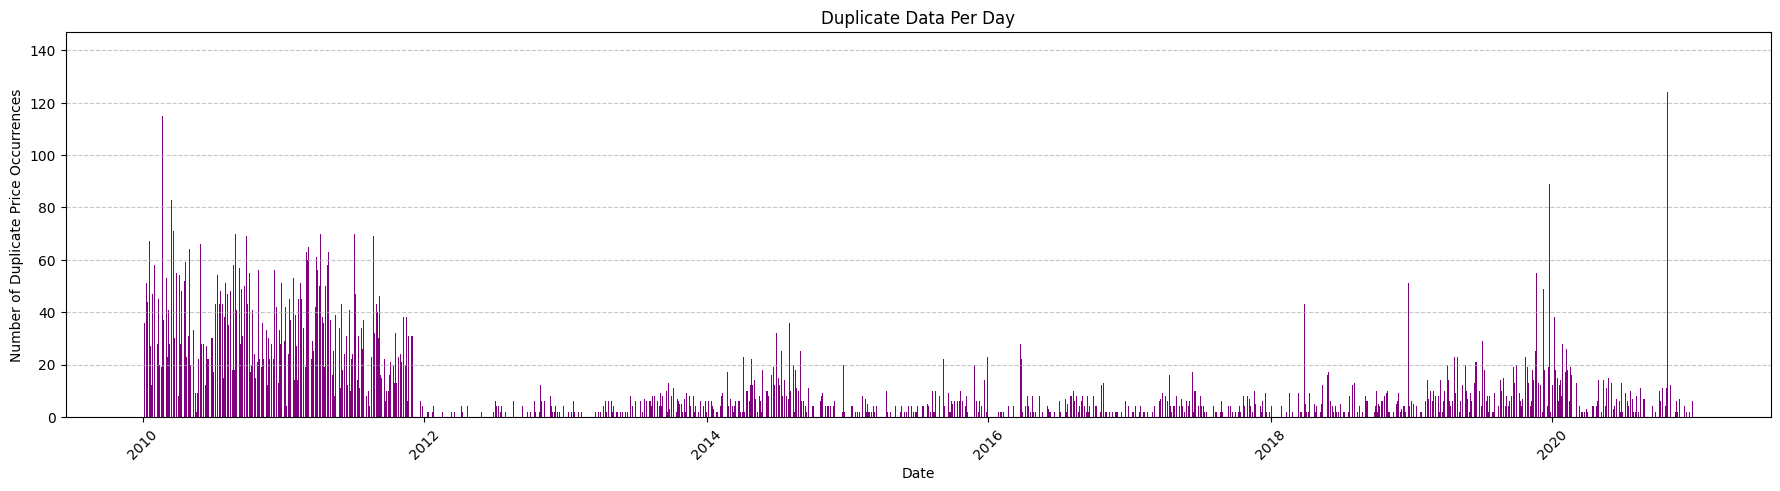

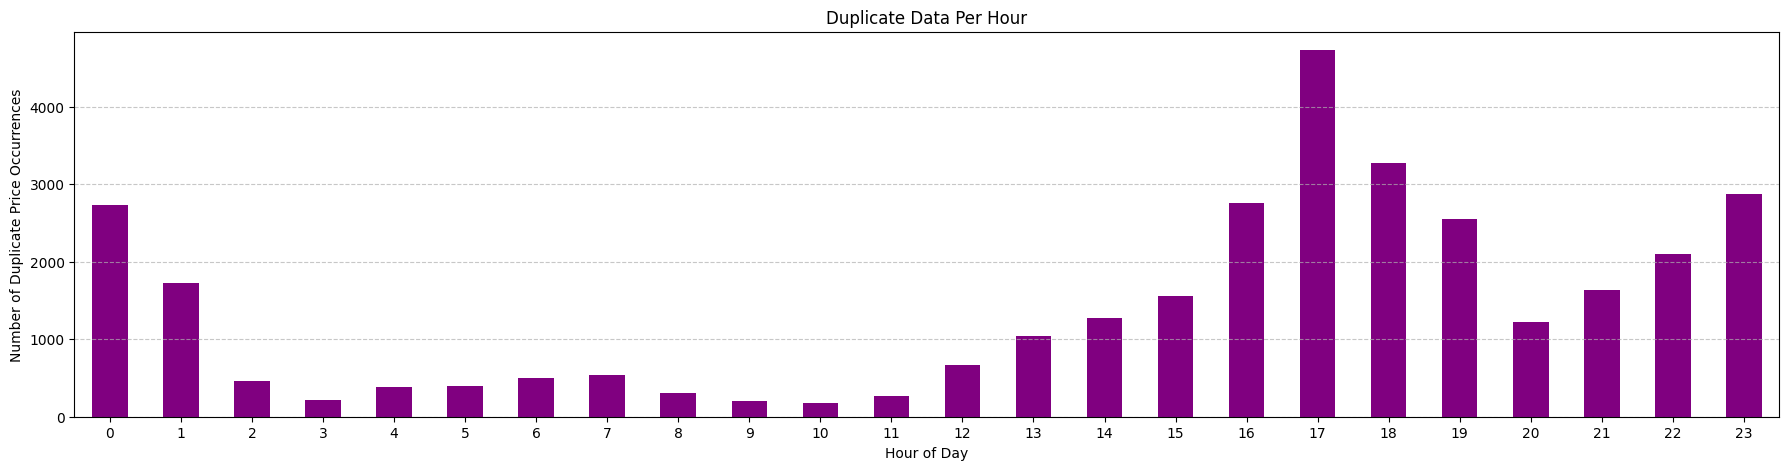

In [350]:
# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Identify duplicated consecutive OHLC prices
dup_consecutive = combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(-1)).all(axis=1) | \
                  combined_df[['Open', 'High', 'Low', 'Close']].eq(combined_df[['Open', 'High', 'Low', 'Close']].shift(1)).all(axis=1)

dup_df = combined_df[dup_consecutive]

# Group duplicate occurrences by date
dup_per_day = dup_df.groupby(dup_df['DateTime'].dt.date).size()

#  Group by hour and count occurrences of duplicate data
dup_per_hour = dup_df.groupby(dup_df['DateTime'].dt.hour).size()

# 
plt.figure(figsize=(22, 5))
plt.bar(dup_per_day.index, dup_per_day.values, color='purple')
plt.title('Duplicate Data Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the bar chart for duplicate data occurrences per hour
plt.figure(figsize=(22, 5))
dup_per_hour.plot(kind='bar', color='purple')
plt.title('Duplicate Data Per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Duplicate Price Occurrences')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

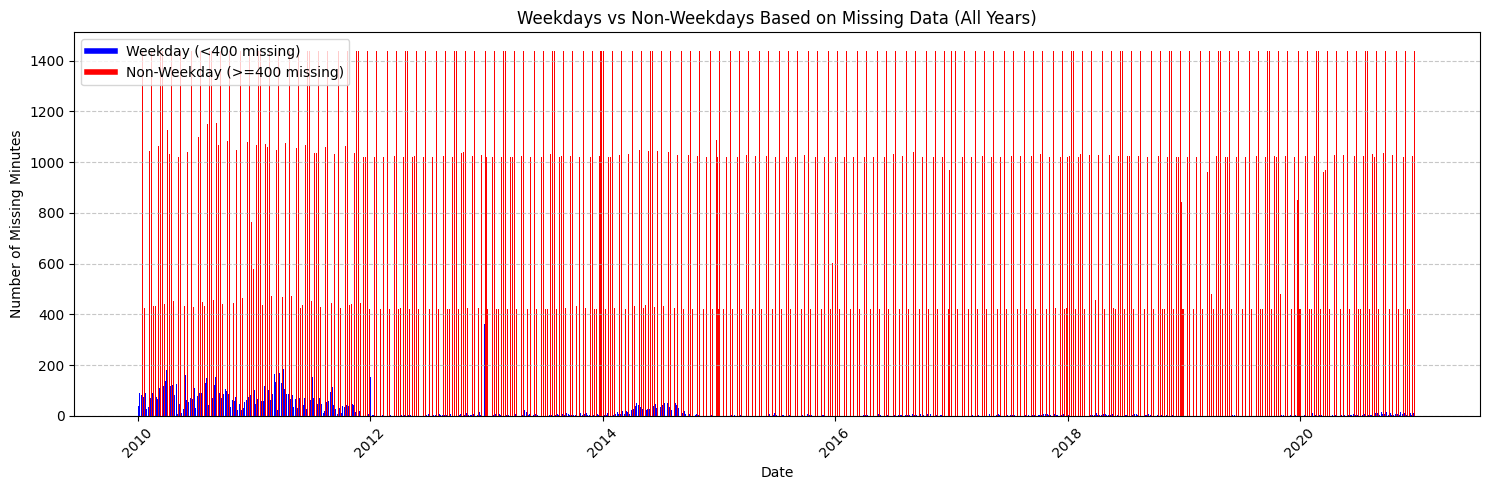

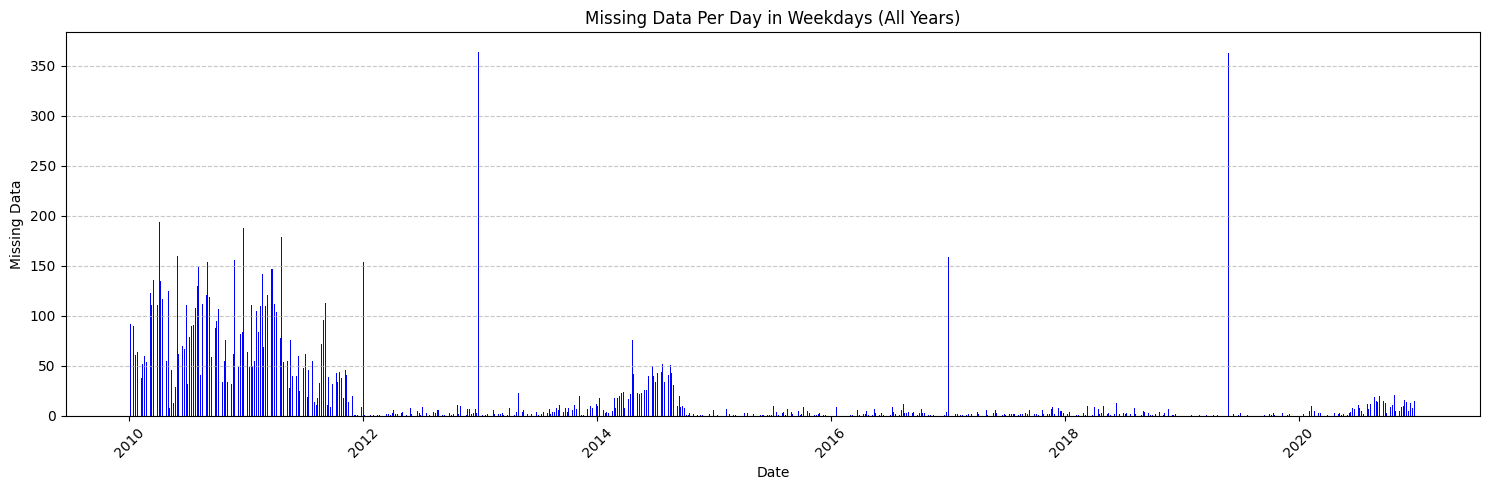

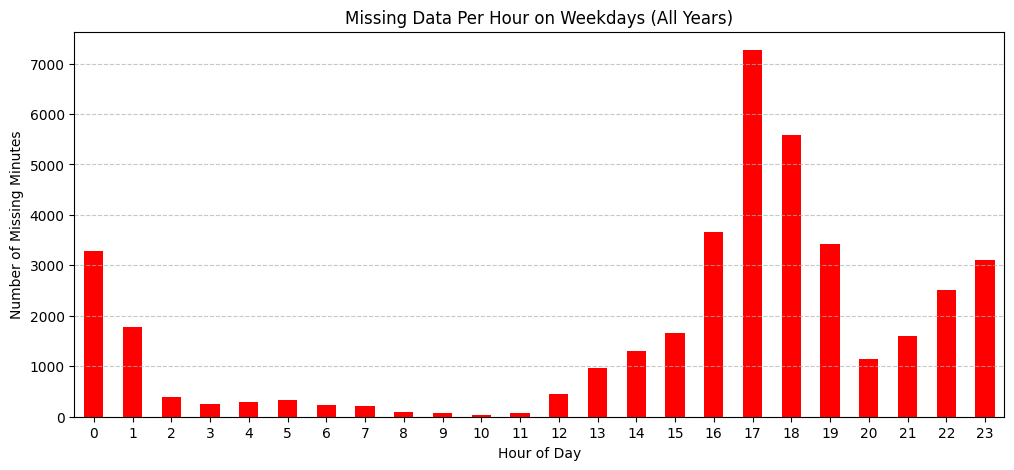

In [351]:
import pandas as pd
import matplotlib.pyplot as plt



# Ensure DateTime is in datetime format
combined_df['DateTime'] = pd.to_datetime(combined_df['DateTime'])

# Step 1: Group by date and sum the indicator column (missing minutes per day)
missing_per_day = combined_df.groupby(combined_df['DateTime'].dt.date)['indicator'].sum()

# Step 2: Identify weekdays (days with less than 400 missing data)
weekdays = missing_per_day[missing_per_day < 400].index       

# Step 3: Filter the dataframe to include only weekdays
weekday_df = combined_df[combined_df['DateTime'].dt.date.isin(weekdays)]

# Step 4: Group by hour and sum missing data
missing_per_hour_weekdays = weekday_df.groupby(weekday_df['DateTime'].dt.hour)['indicator'].sum()

# Step 5: Add year-wise grouping for better analysis
missing_per_day_yearly = combined_df.groupby([combined_df['DateTime'].dt.year, combined_df['DateTime'].dt.date])['indicator'].sum()

# --- PLOTS ---

plt.figure(figsize=(15, 5))
colors = ['blue' if date in weekdays else 'red' for date in missing_per_day.index]
plt.bar(missing_per_day.index, missing_per_day.values, color=colors)

plt.title('Weekdays vs Non-Weekdays Based on Missing Data (All Years)')
plt.xlabel('Date')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Weekday (<400 missing)')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Non-Weekday (>=400 missing)')
plt.legend(handles=[blue_patch, red_patch])
plt.tight_layout()
plt.show()


weekday_missing_data = missing_per_day[weekdays]
plt.figure(figsize=(15, 5))
plt.bar(weekday_missing_data.index, weekday_missing_data.values, color='blue')

plt.title('Missing Data Per Day in Weekdays (All Years)')
plt.xlabel('Date')
plt.ylabel('Missing Data')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Plot Step 4: Missing data per hour on weekdays
plt.figure(figsize=(12, 5))
missing_per_hour_weekdays.plot(kind='bar', color='red')
plt.title('Missing Data Per Hour on Weekdays (All Years)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [352]:
missing_per_day

DateTime
2010-01-03      40
2010-01-04      92
2010-01-05      98
2010-01-06      90
2010-01-07      96
              ... 
2020-12-27    1031
2020-12-28      15
2020-12-29      18
2020-12-30       3
2020-12-31       0
Name: indicator, Length: 4016, dtype: int64

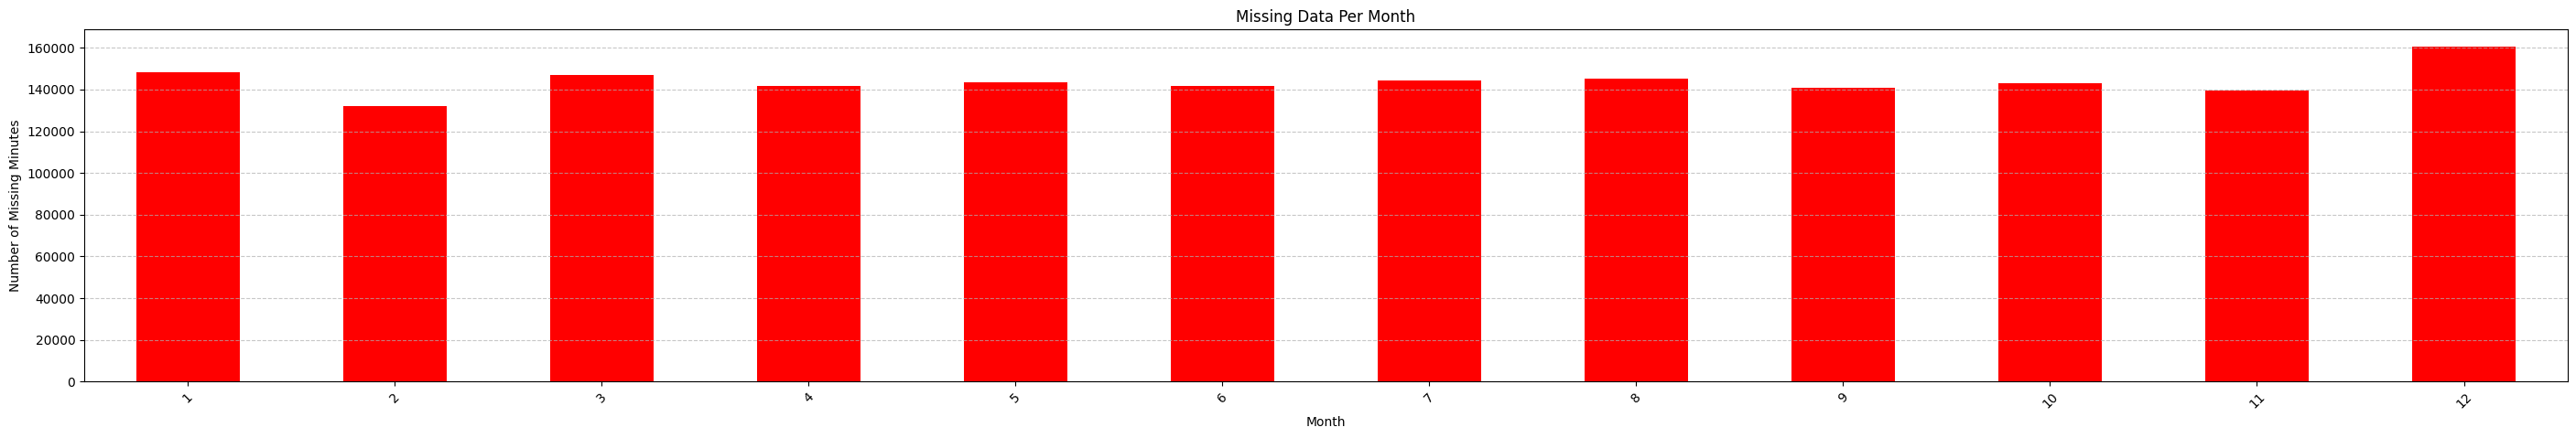

In [353]:
# Group by month and sum the indicator column (missing minutes per month)
missing_per_month = combined_df.groupby(combined_df['DateTime'].dt.month)['indicator'].sum()

# Plot the bar chart
plt.figure(figsize=(35, 5))
missing_per_month.plot(kind='bar', color='red')
plt.title('Missing Data Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Missing Minutes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [354]:
# We expect to have 4 weekends/ mo. Therefore 4*2*24*60 minutes missing per month = 11,520

In [355]:
print(missing_per_month)

DateTime
1     148402
2     131860
3     146965
4     141562
5     143687
6     141651
7     144217
8     145113
9     141014
10    143041
11    139526
12    160747
Name: indicator, dtype: int64


In [356]:
sum(missing_per_month)-(11520*12)

1589545

In [357]:
def remove_all_consecutive_duplicates(df):
    """Remove consecutive OHLC duplicates and flat bars with no price movement"""
    df_clean = df.copy()
    
    while True:
        # Check for consecutive duplicates
        prev_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(1)) & 
            (df_clean['High'] == df_clean['High'].shift(1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(1))
        )
        
        next_dup = (
            (df_clean['Open'] == df_clean['Open'].shift(-1)) & 
            (df_clean['High'] == df_clean['High'].shift(-1)) & 
            (df_clean['Low'] == df_clean['Low'].shift(-1)) & 
            (df_clean['Close'] == df_clean['Close'].shift(-1))
        )
        
        # Check for flat bars (no price movement)
        flat_bar = (
            (df_clean['Open'] == df_clean['High']) & 
            (df_clean['Open'] == df_clean['Low']) & 
            (df_clean['Open'] == df_clean['Close'])
        )
        
        # Combine conditions
        is_duplicate = prev_dup | next_dup | flat_bar
        count = is_duplicate.sum()
        
        if count == 0:
            break
            
        print(f"Marking {count} duplicates and flat bars…")

        # 1) blank out the OHLC
        df_clean.loc[is_duplicate, ['Open','High','Low','Close']] = np.nan
        df_clean.loc[is_duplicate, 'Volume'] = 0
        # 2) flag them
        df_clean.loc[is_duplicate, 'indicator'] = 1
        
    
    
    return df_clean

def remove_duplicate_timestamps(df):
    """
    Remove rows so that every DateTime is unique.
    Keeps the first occurrence of each timestamp and deletes all others.
    """
    df_clean = df.copy()

    while True:
        # Mark all rows whose DateTime appears more than once
        dup_mask = df_clean['DateTime'].duplicated(keep=False)
        if not dup_mask.any():
            break

        # Of those duplicates, keep only the first in each group
        to_remove = df_clean['DateTime'].duplicated(keep='first')
        count = to_remove.sum()
        print(f"Removing {count} rows with duplicate timestamps…")

        df_clean = df_clean.loc[~to_remove].reset_index(drop=True)

    return df_clean

def process_duplicated_data(df):
    """
    Process the DataFrame to remove duplicate timestamps and consecutive duplicates.
    """
    # Remove duplicate timestamps
    df = remove_duplicate_timestamps(df)

    # Remove consecutive duplicates and flat bars
    df = remove_all_consecutive_duplicates(df)

    return df


In [358]:
final_data_clean = process_duplicated_data(combined_df)

Removing 120 rows with duplicate timestamps…
Marking 102314 duplicates and flat bars…


In [359]:
def check_dup(data):
    # Check for consecutive duplicates with previous row
    verify_prev = (
        (data['Open'] == data['Open'].shift(1)) & 
        (data['High'] == data['High'].shift(1)) & 
        (data['Low'] == data['Low'].shift(1)) & 
        (data['Close'] == data['Close'].shift(1))
    )
    
    # Check for consecutive duplicates with next row
    verify_next = (
        (data['Open'] == data['Open'].shift(-1)) & 
        (data['High'] == data['High'].shift(-1)) & 
        (data['Low'] == data['Low'].shift(-1)) & 
        (data['Close'] == data['Close'].shift(-1))
    )
    
    # Check for flat bars (no price movement)
    flat_bar = (
        (data['Open'] == data['High']) & 
        (data['Open'] == data['Low']) & 
        (data['Open'] == data['Close'])
    )
    
    # Count each type of duplicate
    consecutive_dups = (verify_prev | verify_next).sum()
    flat_bars = flat_bar.sum()
    total_dups = (verify_prev | verify_next | flat_bar).sum()
    
    print(f"Consecutive duplicates: {consecutive_dups}")
    print(f"Flat bars (no price movement): {flat_bars}")
    print(f"Total issues: {total_dups}")
    
    return total_dups

In [360]:
check_dup(final_data_clean)

Consecutive duplicates: 0
Flat bars (no price movement): 0
Total issues: 0


np.int64(0)

In [361]:
final_data_clean

DateTime     Open     High      Low    Close  Volume  \
0       2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0   
1       2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0   
2       2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0   
3       2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0   
4       2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0   
...                     ...      ...      ...      ...      ...     ...   
5781594 2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0   
5781595 2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0   
5781596 2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0   
5781597 2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0   
5781598 2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0   

         indicator  
0                0  
1                1  
2                0  
3                1  
4                0  
...            ...  
5781594          0  
5781595          0  
5781596          0  
5781597          0  
5781598          0  

[5781599 rows x 7 columns]

In [362]:
final_data = final_data_clean.copy()
# Ensure 'DateTime' is the index
#final_data.index = pd.to_datetime(final_data.index)

<Axes: >

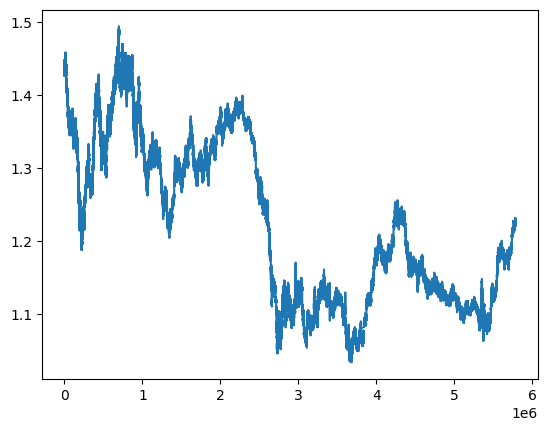

In [363]:
final_data['Close'].plot()    ### plot data nicely including years

In [364]:
final_data

DateTime     Open     High      Low    Close  Volume  \
0       2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0   
1       2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0   
2       2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0   
3       2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0   
4       2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0   
...                     ...      ...      ...      ...      ...     ...   
5781594 2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0   
5781595 2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0   
5781596 2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0   
5781597 2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0   
5781598 2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0   

         indicator  
0                0  
1                1  
2                0  
3                1  
4                0  
...            ...  
5781594          0  
5781595          0  
5781596          0  
5781597          0  
5781598          0  

[5781599 rows x 7 columns]

In [365]:
data = final_data.copy()

In [366]:
data['Close'].iloc[374920:374950].max()

np.float64(1.3095)

In [367]:
data['Close'].nlargest(n=5)

699420    1.4936
699419    1.4932
699374    1.4929
699415    1.4929
699416    1.4929
Name: Close, dtype: float64

In [368]:
max_idx = data['Close'].idxmax()
max_idx

699420

In [369]:
data.loc[max_idx, :] = np.nan

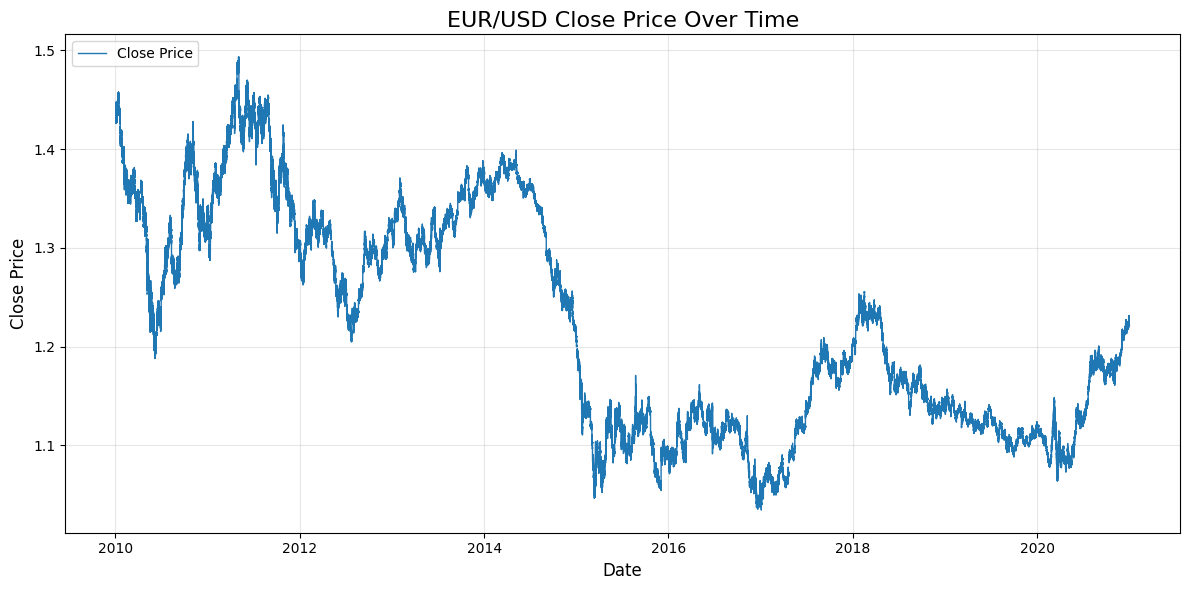

In [370]:

# Plot the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Close'], label='Close Price', linewidth=1)

# Enhancing the plot aesthetics
plt.title('EUR/USD Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [371]:
# Create a column to identify hourly groups
data['Hour'] = pd.to_datetime(data['DateTime']).dt.floor('h').dt.hour
data

DateTime     Open     High      Low    Close  Volume  \
0       2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0   
1       2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0   
2       2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0   
3       2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0   
4       2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0   
...                     ...      ...      ...      ...      ...     ...   
5781594 2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0   
5781595 2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0   
5781596 2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0   
5781597 2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0   
5781598 2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0   

         indicator  Hour  
0              0.0  17.0  
1              1.0  17.0  
2              0.0  17.0  
3              1.0  17.0  
4              0.0  17.0  
...            ...   ...  
5781594        0.0  16.0  
5781595        0.0  16.0  
5781596        0.0  16.0  
5781597        0.0  16.0  
5781598        0.0  16.0  

[5781599 rows x 8 columns]

In [372]:
#data.reset_index(inplace=True)

In [373]:
data

DateTime     Open     High      Low    Close  Volume  \
0       2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0   
1       2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0   
2       2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0   
3       2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0   
4       2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0   
...                     ...      ...      ...      ...      ...     ...   
5781594 2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0   
5781595 2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0   
5781596 2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0   
5781597 2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0   
5781598 2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0   

         indicator  Hour  
0              0.0  17.0  
1              1.0  17.0  
2              0.0  17.0  
3              1.0  17.0  
4              0.0  17.0  
...            ...   ...  
5781594        0.0  16.0  
5781595        0.0  16.0  
5781596        0.0  16.0  
5781597        0.0  16.0  
5781598        0.0  16.0  

[5781599 rows x 8 columns]

In [374]:
#data.drop(columns=['index'], inplace=True)

In [375]:
data.head(20)

DateTime    Open    High     Low   Close  Volume  indicator  \
0  2010-01-03 17:00:00  1.4301  1.4304  1.4301  1.4304     0.0        0.0   
1  2010-01-03 17:01:00     NaN     NaN     NaN     NaN     0.0        1.0   
2  2010-01-03 17:02:00  1.4302  1.4303  1.4301  1.4303     0.0        0.0   
3  2010-01-03 17:03:00     NaN     NaN     NaN     NaN     0.0        1.0   
4  2010-01-03 17:04:00  1.4301  1.4302  1.4298  1.4300     0.0        0.0   
5  2010-01-03 17:05:00     NaN     NaN     NaN     NaN     NaN        1.0   
6  2010-01-03 17:06:00  1.4301  1.4301  1.4300  1.4301     0.0        0.0   
7  2010-01-03 17:07:00     NaN     NaN     NaN     NaN     NaN        1.0   
8  2010-01-03 17:08:00  1.4300  1.4302  1.4300  1.4301     0.0        0.0   
9  2010-01-03 17:09:00  1.4300  1.4301  1.4298  1.4298     0.0        0.0   
10 2010-01-03 17:10:00  1.4299  1.4301  1.4299  1.4301     0.0        0.0   
11 2010-01-03 17:11:00     NaN     NaN     NaN     NaN     NaN        1.0   
12 2010-01-03 17:12:00  1.4302  1.4303  1.4302  1.4303     0.0        0.0   
13 2010-01-03 17:13:00  1.4304  1.4307  1.4304  1.4307     0.0        0.0   
14 2010-01-03 17:14:00     NaN     NaN     NaN     NaN     NaN        1.0   
15 2010-01-03 17:15:00     NaN     NaN     NaN     NaN     NaN        1.0   
16 2010-01-03 17:16:00     NaN     NaN     NaN     NaN     NaN        1.0   
17 2010-01-03 17:17:00     NaN     NaN     NaN     NaN     NaN        1.0   
18 2010-01-03 17:18:00     NaN     NaN     NaN     NaN     NaN        1.0   
19 2010-01-03 17:19:00  1.4308  1.4308  1.4307  1.4307     0.0        0.0   

    Hour  
0   17.0  
1   17.0  
2   17.0  
3   17.0  
4   17.0  
5   17.0  
6   17.0  
7   17.0  
8   17.0  
9   17.0  
10  17.0  
11  17.0  
12  17.0  
13  17.0  
14  17.0  
15  17.0  
16  17.0  
17  17.0  
18  17.0  
19  17.0

In [376]:
# Count how many times each timestamp appears:
counts = data['DateTime'].value_counts()
print(counts[counts > 1])


Series([], Name: count, dtype: int64)


In [377]:
########################################################################
########################################################################
#############   SPY 15 VOL TEST DATASET   ##############################

In [378]:
df = pd.read_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol.csv")
df['mid'] = (df['bid '] + df['ask'])/2

# 1. Make sure your time column is datetime and floor it to the minute
df['time'] = pd.to_datetime(df['time'])
df['minute'] = df['time'].dt.floor('T')

# 2. Assign group_id by “which minute‐bin” each row belongs to
df['group_id'] = df.groupby('minute').ngroup()

# 3. Now compute the OHLC on mid for each group_id
mid_ohlc = (
    df
    .groupby('group_id')
    .agg(
        minute = ('minute', 'first'),
        open   = ('mid',    'first'),
        high   = ('mid',    'max'),
        low    = ('mid',    'min'),
        close  = ('mid',    'last')
    )
    .reset_index()
)

# mid_ohlc now has:
#   group_id | minute           | open      | high      | low       | close
#   -------------------------------------------------------------------------
#     0      | 2025-02-19 08:00 | 609.6209  | 609.6287  | 609.6209  | …
#     1      | 2025-02-19 08:01 | 609.4673  | 609.5114  | 609.4503  | …
#     2      | 2025-02-19 08:02 | …         | …         | …         | …



C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\461763248.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol.csv")
C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\461763248.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])
C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\461763248.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['minute'] = df['time'].dt.floor('T')


In [379]:
mid_ohlc

group_id              minute        open        high         low  \
0         0.0 2025-02-19 08:00:00  609.620921  609.718208  609.435313   
1         1.0 2025-02-19 08:01:00  609.458008  609.531182  609.437541   
2         2.0 2025-02-19 08:02:00  609.472416  609.530265  609.427305   
3         3.0 2025-02-19 08:03:00  609.439725  609.490422  609.400389   
4         4.0 2025-02-19 08:04:00  609.419199  609.421599  609.263119   
..        ...                 ...         ...         ...         ...   
776     776.0 2025-02-19 20:56:00  610.653237  610.653237  610.366333   
777     777.0 2025-02-19 20:57:00  610.403186  610.421814  610.076369   
778     778.0 2025-02-19 20:58:00  610.156854  610.246400  610.081910   
779     779.0 2025-02-19 20:59:00  610.174585  610.208648  610.006565   
780     780.0 2025-02-19 21:00:00  610.140808  610.146115  610.140808   

          close  
0    609.469308  
1    609.474540  
2    609.446263  
3    609.425303  
4    609.277285  
..          ...  
776  610.403551  
777  610.155527  
778  610.179745  
779  610.129943  
780  610.146115  

[781 rows x 6 columns]

In [380]:
# assuming your per-minute OHLC is in mid_ohlc

# 1. Create `indicator` = 1 if any of open/high/low/close is NaN, else 0
mid_ohlc['indicator'] = (
    mid_ohlc[['open','high','low','close']]
    .isnull()
    .any(axis=1)
    .astype(int)
)

# Now mid_ohlc looks like:
#    group_id  minute              open      high       low      close  indicator
# 0         0 2025-02-19 08:00:00  609.6209  609.7182  609.4353  609.4693          0
# 1         1 2025-02-19 08:01:00  609.4580  609.5312  609.4375  609.4745          0
# ...     ...                 ...       ...       ...       ...       ...
# n       781 2025-02-19 21:01:00       NaN       NaN       NaN       NaN          1


In [381]:
mid_ohlc['DateTime'] = pd.to_datetime(mid_ohlc['minute'])

In [382]:
mid_ohlc = mid_ohlc.drop(columns=['minute'])

In [383]:
# Rename the lowercase OHLC columns to Titlecase
mid_ohlc = mid_ohlc.rename(columns={
    'open':  'Open',
    'high':  'High',
    'low':   'Low',
    'close': 'Close'
})

# Add a Volume column, all zeros (same length as mid_ohlc)
mid_ohlc['Volume'] = 0

In [384]:
mid_ohlc

group_id        Open        High         Low       Close  indicator  \
0         0.0  609.620921  609.718208  609.435313  609.469308          0   
1         1.0  609.458008  609.531182  609.437541  609.474540          0   
2         2.0  609.472416  609.530265  609.427305  609.446263          0   
3         3.0  609.439725  609.490422  609.400389  609.425303          0   
4         4.0  609.419199  609.421599  609.263119  609.277285          0   
..        ...         ...         ...         ...         ...        ...   
776     776.0  610.653237  610.653237  610.366333  610.403551          0   
777     777.0  610.403186  610.421814  610.076369  610.155527          0   
778     778.0  610.156854  610.246400  610.081910  610.179745          0   
779     779.0  610.174585  610.208648  610.006565  610.129943          0   
780     780.0  610.140808  610.146115  610.140808  610.146115          0   

               DateTime  Volume  
0   2025-02-19 08:00:00       0  
1   2025-02-19 08:01:00       0  
2   2025-02-19 08:02:00       0  
3   2025-02-19 08:03:00       0  
4   2025-02-19 08:04:00       0  
..                  ...     ...  
776 2025-02-19 20:56:00       0  
777 2025-02-19 20:57:00       0  
778 2025-02-19 20:58:00       0  
779 2025-02-19 20:59:00       0  
780 2025-02-19 21:00:00       0  

[781 rows x 8 columns]

In [385]:
mid_ohlc.to_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol_OHLC.csv", index=False)

In [386]:
#########################################################################

In [387]:
data#.iloc[6150:6200]

DateTime     Open     High      Low    Close  Volume  \
0       2010-01-03 17:00:00  1.43010  1.43040  1.43010  1.43040     0.0   
1       2010-01-03 17:01:00      NaN      NaN      NaN      NaN     0.0   
2       2010-01-03 17:02:00  1.43020  1.43030  1.43010  1.43030     0.0   
3       2010-01-03 17:03:00      NaN      NaN      NaN      NaN     0.0   
4       2010-01-03 17:04:00  1.43010  1.43020  1.42980  1.43000     0.0   
...                     ...      ...      ...      ...      ...     ...   
5781594 2020-12-31 16:54:00  1.22159  1.22182  1.22153  1.22175     0.0   
5781595 2020-12-31 16:55:00  1.22175  1.22180  1.22170  1.22174     0.0   
5781596 2020-12-31 16:56:00  1.22176  1.22179  1.22160  1.22165     0.0   
5781597 2020-12-31 16:57:00  1.22166  1.22167  1.22153  1.22164     0.0   
5781598 2020-12-31 16:58:00  1.22163  1.22168  1.22143  1.22153     0.0   

         indicator  Hour  
0              0.0  17.0  
1              1.0  17.0  
2              0.0  17.0  
3              1.0  17.0  
4              0.0  17.0  
...            ...   ...  
5781594        0.0  16.0  
5781595        0.0  16.0  
5781596        0.0  16.0  
5781597        0.0  16.0  
5781598        0.0  16.0  

[5781599 rows x 8 columns]

In [388]:
#########################     SAMPLE DATASET GENERATING FUNCTION   #########################

In [389]:
import pandas as pd
import numpy as np

def generate_sample_ohlc(start_datetime: str,
                         periods: int,
                         freq: str = '1T',
                         initial_price: float = 1.12,
                         annual_vol: float = 0.10,
                         missing_rate: float = 0.01) -> pd.DataFrame:
    """
    Generate a synthetic one-minute OHLC price dataset for testing realized-volatility pipelines.
    
    Parameters:
    - start_datetime: ISO string for the first timestamp (e.g., '2020-01-01 00:00:00').
    - periods: Number of 1-minute bars to generate.
    - freq: Frequency string, default '1T' for one-minute bars.
    - initial_price: Starting price for the simulation.
    - annual_vol: Target annualized volatility (e.g., 0.10 for 10%).
    - missing_rate: Fraction of minutes to randomly flag as missing (0 to 1).
    
    Returns:
    - DataFrame with columns ['DateTime','Open','High','Low','Close','Volume','indicator'].
    """
    # Create the datetime index
    idx = pd.date_range(start=start_datetime, periods=periods, freq=freq)
    
    # Convert annual volatility to per-minute volatility (FX: 252 trading days, 24h)
    dt = 1 / (365 * 24 * 60)
    sigma = annual_vol * np.sqrt(dt)
    
    # Simulate log-returns and price series
    returns = np.random.normal(loc=0, scale=sigma, size=periods)
    prices = initial_price * np.exp(np.cumsum(returns))
    
    # Build the OHLC DataFrame
    df = pd.DataFrame(index=idx)
    df['Open'] = prices
    # Add intraminute noise for High/Low/Close
    df['Close'] = prices * np.exp(np.random.normal(0, sigma/2, periods))
    df['High'] = np.maximum(df['Open'], df['Close']) * (1 + np.random.uniform(0, 0.0002, periods))
    df['Low']  = np.minimum(df['Open'], df['Close']) * (1 - np.random.uniform(0, 0.0002, periods))
    df['Volume']    = np.random.poisson(lam=100, size=periods)
    
    # Randomly inject missing rows
    mask = np.random.rand(periods) < missing_rate
    df['indicator'] = mask.astype(int)
    df.loc[mask, ['Open','High','Low','Close','Volume']] = np.nan
    
    # Reset index as DateTime column
    df = df.reset_index().rename(columns={'index':'DateTime'})
    return df


In [390]:
# Example usage:
sample_df = generate_sample_ohlc(start_datetime='2020-01-01 00:00:00',
                                 periods=300000,        
                                 initial_price=1.12,
                                 annual_vol=0.10,
                                 missing_rate=0.15)
sample_df

C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\2445614388.py:25: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  idx = pd.date_range(start=start_datetime, periods=periods, freq=freq)


DateTime      Open     Close      High       Low  Volume  \
0      2020-01-01 00:00:00  1.119806  1.119939  1.120045  1.119703    94.0   
1      2020-01-01 00:01:00  1.119952  1.119770  1.119986  1.119661    87.0   
2      2020-01-01 00:02:00  1.120026  1.119905  1.120152  1.119843    94.0   
3      2020-01-01 00:03:00  1.119894  1.119909  1.120068  1.119752    91.0   
4      2020-01-01 00:04:00  1.119826  1.119971  1.120071  1.119802    94.0   
...                    ...       ...       ...       ...       ...     ...   
299995 2020-07-27 07:55:00  1.127861  1.127805  1.127960  1.127741    93.0   
299996 2020-07-27 07:56:00  1.127884  1.127829  1.128081  1.127746   108.0   
299997 2020-07-27 07:57:00  1.127890  1.127905  1.127944  1.127686   109.0   
299998 2020-07-27 07:58:00  1.127894  1.127958  1.128002  1.127769    95.0   
299999 2020-07-27 07:59:00  1.127549  1.127455  1.127609  1.127263    90.0   

        indicator  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
299995          0  
299996          0  
299997          0  
299998          0  
299999          0  

[300000 rows x 7 columns]

In [391]:
#######   RVOLATILITY CALCULATION   #######

In [392]:
#filter_incomplete_groups(data, timeframe = 120, threshold=0.1, vol_measure='Close-to-Close', minute_interval=1)

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import skew, kurtosis
from matplotlib.ticker import FuncFormatter

"""

Overall, the pipeline is:

1. Drop days with too many missing minutes.

2. Resample to your small minute_interval (e.g. 5 min) to form bars.

3. Compute one per‐bar variance measure 𝑉

4. Sum V and count bars in each large bucket of length timeframe.

5. Turn that sum into an annualized realized volatility.

6. Map it back onto every row, then collapse each bucket to a single row for plotting and statistical analysis.

"""

def preprocess_ohlc_data(data, minute_interval):
    """
    Prepare OHLC data by properly formatting datetime and resampling to specified interval.
    For each timestamp, the interval is (timestamp - minute_interval + 1) to timestamp inclusive.
    For example, for 17:35:00 with 5-minute interval, we include [17:31:00 to 17:35:00].
    """
    # Ensure 'DateTime' is in datetime format
    data.reset_index(inplace=True)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y%m%d %H%M%S')
    

    data = data.groupby(pd.Grouper(key='DateTime', freq=f'{minute_interval}Min',closed='right',label='right')).agg({
                                          "Open":  "first",
                                          "High":  "max",
                                          "Low":   "min",
                                         "Close": "last",
                                          "Volume": "sum",
                                          "indicator": "sum",
                                          "group_id":  lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan

                                          
                                          })
    return data

def filter_incomplete_groups(ohlc_data, timeframe, threshold, vol_measure, minute_interval):
    """
    Filter out minutes within timeframe groups that exceed missing-data or are undersized.
    Before filtering, plots a scatter of available log-returns per group:
      • Green dots for groups with enough returns (≥ valid_returns_thresh)
      • Red dots for groups with too few returns (< valid_returns_thresh)
    The dashed horizontal line marks valid_returns_thresh.
    """
    # 1) Prepare & index
    ohlc = ohlc_data.copy()
    ohlc['DateTime'] = pd.to_datetime(ohlc['DateTime'], format='%Y%m%d %H%M%S')
    ohlc.set_index('DateTime', inplace=True)
    ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")

    # 2) Compute thresholds
    missing_thresh = timeframe * threshold               # max missing minutes
    valid_returns_thresh = timeframe - missing_thresh    # min log-returns needed

    # 3) Pre-filter metrics
    missing_counts = ohlc.groupby('group_id')['indicator'].sum()
    log_counts     = ohlc.groupby('group_id')['Log_Returns_global'] \
                         .apply(lambda x: x.notna().sum())

    # 4) Scatter plot of log-return counts
    passed = log_counts >= valid_returns_thresh
    plt.figure(figsize=(12, 5))
    plt.scatter(log_counts.index, log_counts.values,
                c=['green' if ok else 'red' for ok in passed],
                edgecolor='k', s=50)
    plt.axhline(y=valid_returns_thresh, color='black',
                linestyle='--', linewidth=2,
                label=f"Return-count threshold = {valid_returns_thresh:.0f}")
    plt.xticks(rotation=45)
    plt.xlabel('Group Start Time')
    plt.ylabel('Available Log-Returns')
    plt.title(
        f"Log-Return Counts per {timeframe}-Minute Group (Pre-Filter)\n"
        f"Green = ≥{valid_returns_thresh:.0f} returns, Red = <{valid_returns_thresh:.0f}"
    )
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    # 5) Now simply select the green groups
    valid_groups = passed[passed].index
    filtered_data = ohlc[ohlc['group_id'].isin(valid_groups)].copy()
    
    # 6) Diagnostics
    print(f"Keeping {len(valid_groups)} groups (the green ones) out of {len(passed)} total.")
    
    return filtered_data

def compute_volatility_measure(ohlc_data, vol_measure):
    """
    Calculate volatility using the specified method.
    
    Parameters:
    - ohlc_data (pd.DataFrame): OHLC data
    - vol_measure (str): Volatility measure ('Garman-Klass', 'Rogers-Satchell', 'Close-to-Close')
    
    Returns:
    - ohlc_data (pd.DataFrame): OHLC data with volatility measure added
    """
    # Make a copy to avoid modifying the input
    ohlc_data = ohlc_data.copy()
    
    # Constant for Garman-Klass
    k = 2 * np.log(2) - 1
    
    # Compute volatility measures (Variance)
    if vol_measure == 'Garman-Klass':
        ohlc_data['V'] = 0.5 * (np.log(ohlc_data['High'] / ohlc_data['Low']) ** 2) - \
                       k * (np.log(ohlc_data['Close'] / ohlc_data['Open']) ** 2)
    
    elif vol_measure == 'Rogers-Satchell':
        '''
        # Define prev close
        ohlc_data['Prev_Close'] = ohlc_data['Close'].shift(1)
        # Now compute Rogers–Satchell using Prev_Close (as before)
        ohlc_data['V'] = (
            np.log(ohlc_data['High']  / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['High']  / ohlc_data['Close'])      +
            np.log(ohlc_data['Low']   / ohlc_data['Prev_Close']) *
            np.log(ohlc_data['Low']   / ohlc_data['Close'])
        )'''

        H, L, C = ohlc_data['High'], ohlc_data['Low'], ohlc_data['Close']
        P = ohlc_data['Prev_Close_global']   # <— from step 1
        ohlc_data['V'] = np.log(H/P)*np.log(H/C) + np.log(L/P)*np.log(L/C)
                        
    
    elif vol_measure == 'Close-to-Close':
        ohlc_data['V'] = ohlc_data['Log_Returns_global']**2
        #print(ohlc_data['V'])
    
    else:
        raise ValueError("Invalid volatility measure. Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'.")
    
    return ohlc_data

def setup_rvol_col(data, timeframe, vol_measure):
    """
    The overall purpose is to:
    1. Compute variance contributions for each row
    2. Calculate realized volatility for each group
    3. Attach the group's volatility to every row in that group
    """
    # 1) Compute per-bar variance contributions (V) for each row
    v_by_group = data.groupby('group_id')\
                     .apply(lambda grp: compute_volatility_measure(grp, vol_measure))
    
    # If it came back as a DataFrame, pick its 'V' column
    if isinstance(v_by_group, pd.DataFrame):
        v_series = v_by_group['V']
    else:
        v_series = v_by_group
    
    # Ensure index is consistent
    v_series = v_series.reset_index(level=0, drop=True)
    
    # 2) Attach per-bar V back onto a copy of your DataFrame
    df = data.copy()
    df['V'] = np.nan  # Preallocate
    df.loc[v_series.index, 'V'] = v_series
    
    # 3) Compute per-group sum of V and count of rows
    grp_stats = (
        df
        .groupby('group_id')['V']
        .agg(sum='sum', count='count')
    )
    print(grp_stats)
        # Sample variance WITHOUT using (n_minus_1)
    grp_stats['n_minus_1'] = grp_stats['count']
    grp_stats['var'] = np.where(
        grp_stats['n_minus_1'] > 0,
        grp_stats['sum'],
        np.nan
    )
    

    # 4) √variance → realized vol, annualize as before
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    rvol_per_group = np.sqrt(grp_stats['var'])
    annualized_rvol = rvol_per_group * np.sqrt(365 * 24 * 60/ timeframe)

    # 5) Map both back onto every row
    df[col_name]    = df['group_id'].map(annualized_rvol)*100
    df['n_minus_1'] = df['group_id'].map(grp_stats['n_minus_1'])
    

    return df
    
def plot_realized_volatility(rvol_df, vol_measure, timeframe, minute_interval):
    """
    Plot realized volatility over time.
    
    Parameters:
    - rvol_df (pd.DataFrame): DataFrame with realized volatility values
    - vol_measure (str): Volatility measure used
    - timeframe (int): Timeframe used for calculation
    """
    col_name = f'RVol_{timeframe}min_{vol_measure}'
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    
    plt.figure(figsize=(30, 15))
    plt.scatter(rvol_df['EndDateTime'], rvol_df[col_name], 
               label=f'Realized Volatility ({vol_measure}, {timeframe} min)', 
               color='b', alpha=0.7)
    plt.xlabel('Time')
    plt.ylabel('Realized Volatility (%)')
    plt.title(f"{main_title}", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

def preprocess_by_group_id(rvol, vol_title):
    # Ensure 'DateTime' is in datetime format
    if isinstance(rvol.index, pd.DatetimeIndex):
        rvol.reset_index(inplace=True)
    
    # Convert DateTime if it's not already in datetime format
    if not pd.api.types.is_datetime64_any_dtype(rvol['DateTime']):
        rvol['DateTime'] = pd.to_datetime(rvol['DateTime'])
    
    # Group by group_id
    grouped = rvol.groupby('group_id')
    
    
    # Aggregate the data
    aggregated = grouped.agg({
        "DateTime": ["first", "last"],  # Keep first and last datetime for reference
        "Open": "first",                # First price in the group
        "High": "max",                  # Highest price in the group
        "Low": "min",                   # Lowest price in the group
        "Close": "last",                # Last price in the group
        "Volume": "sum",                # Sum of volume
        "indicator": "sum",             # Sum of indicator
        'n_minus_1': "mean",             # Mean of count
    })
    
    # Add vol_title aggregation explicitly
    #aggregated[vol_title] = grouped[vol_title].mean()
    
    #  — Compute mode of vol_title instead of mean:
    mode_series = grouped[vol_title].apply(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
    aggregated[vol_title] = mode_series.values
    
    # Flatten multi-level column names
    aggregated.columns = [f"{col[0]}_{col[1]}" if col[1] else col[0] for col in aggregated.columns]
    
    # Rename datetime columns for clarity
    aggregated.rename(columns={
        'DateTime_first': 'StartDateTime',
        'DateTime_last': 'EndDateTime',
        'n_minus_1_mean': 'count'  
    }, inplace=True)

    # Reset index to make group_id a regular column
    aggregated.reset_index(inplace=True)
    #print(aggregated)
    #aggregated['count'] = aggregated['n_minus_1'] # Rename n_minus_1 to count for clarity
    return aggregated

def plot_num_of_rows_per_group(df):
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['group_id'], df['count'], marker='o', linestyle='', markersize=4)
    plt.xlabel('group_id')
    plt.ylabel('count of rows')
    plt.title('count vs. group_id')
    plt.grid(True)
    plt.show()


def plot_rvol_histogram(rvol_data, timeframe, minute_interval, vol_measure, title_dates=None, bins=100):
    """
    Histogram of log(rVol) with:
      • green dashed = arithmetic mean
      • red dotted   = +1σ
      • red dashdot  = -1σ
    Stats‐box on left, legend on right, and date range as subtitle.
    """
    # 1) Series extraction & cleaning
    if isinstance(rvol_data, pd.DataFrame):
        series = rvol_data.iloc[:,0].dropna()
    else:
        series = rvol_data.dropna()
    series = series.replace([np.inf, -np.inf], np.nan).dropna()
    series = series[series > 0]
    if series.empty:
        print("No valid data to plot.")
        return

    # 2) Compute arithmetic stats
    mu    = series.mean()
    sigma = series.std()

    # 3) Log-transform
    log_data = np.log(series)

    # 4) Plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.hist(log_data, bins=bins, edgecolor='k', alpha=0.7)

    # 5) Vertical lines
    ax.axvline(np.log(mu),         color='green', linestyle='--', label=f"Mean = {mu:.4f}")
    ax.axvline(np.log(mu + sigma), color='red',   linestyle=':',   label=f"+1σ = {mu+sigma:.4f}")
    ax.axvline(np.log(mu - sigma), color='red',   linestyle='-.',  label=f"−1σ = {mu-sigma:.4f}")

    # 6) Stats‐box (left side)
    stats_text = (
        f"std: {sigma:.4f}\n"
        f"Min:  {series.min():.4f}\n"
        f"Max:  {series.max():.4f}\n"
        f"Skew: {skew(log_data):.2f}\n"
        f"Kurt: {kurtosis(log_data):.2f}"
    )
    ax.text(0.02, 0.95, stats_text, transform=ax.transAxes,
            fontsize=10, va='top', ha='left',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

    # 7) Format x‐axis back to original scale
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{np.exp(x):.3f}"))

    # 8) Title & subtitle
    main_title = f"EURO/USD FX Rate with Trailing {timeframe} min Realized Volatility using {vol_measure}"
    if title_dates:
        start_str, end_str = title_dates
        subtitle = f"Date range: {start_str} to {end_str} with {minute_interval}-minute Returns"
    else:
        subtitle = f"with {minute_interval}-minute Returns"

    ax.set_title(main_title, fontsize=13, pad=20)
    ax.text(0.5, 1.02, subtitle, transform=ax.transAxes,
            fontsize=11, ha='center')

    ax.set_xlabel("Realized Volatility (%)")
    ax.set_ylabel("Frequency")

    # 9) Legend outside right
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

    # 10) Tight layout with room on right
    plt.tight_layout(rect=(0,0,0.8,1))
    plt.show()


def analyze_volatility_prediction(rVol, rVol_pred, time, timeframe, vol_measure, minute_interval):
    # Calculate log ratio
    log_ratio = np.log(rVol / rVol_pred)
    
    # Compute statistics
    stats = {
        'mean': np.mean(log_ratio),
        'std': np.std(log_ratio),
        'max': np.max(log_ratio),
        'min': np.min(log_ratio),
        'skew': pd.Series(log_ratio).skew(),
        'kurtosis': pd.Series(log_ratio).kurt(),
        'correlation': np.corrcoef(rVol, rVol_pred)[0, 1]
    }
    
    # Format stats as label
    stats_text = (
        f"Mean: {stats['mean']:.4f}\n"
        f"Std: {stats['std']:.4f}\n"
        f"Min: {stats['min']:.4f}\n"
        f"Max: {stats['max']:.4f}\n"
        f"Skew: {stats['skew']:.2f}\n"
        f"Kurtosis: {stats['kurtosis']:.2f}"
    )
    
    plt.figure(figsize=(10,5))
    plt.scatter(time, log_ratio)
    
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    subtitle = f"ln(rVol/rVol_pred) over a Total # of Volatility Observed: {len(log_ratio)}"
    plt.title(f"{main_title}\n{subtitle}", fontsize=13)
    plt.xlabel('Time')
    plt.ylabel('Percentage Error')
    plt.axhline(y=0, color='r', linestyle='--')  # This adds a horizontal red dashed line at y=0
    plt.show()

    '''
        # Print out interpretation
    print("Prediction Quality Analysis:")
    print(f"Mean (Bias): {stats['mean']:.4f}")
    print(f"  > Close to 0 = Unbiased predictions")
    print(f"Standard Deviation (Consistency): {stats['std']:.4f}")
    print(f"  > Smaller = More consistent predictions")
    print(f"Skewness (Error Asymmetry): {stats['skew']:.4f}")
    print(f"  > 0 = Symmetric errors")
    print(f"  > Positive = More over-predictions")
    print(f"  > Negative = More under-predictions")
    print(f"Kurtosis (Tail Behavior): {stats['kurtosis']:.4f}")
    print(f"  > 0 = Normal tail behavior")
    print(f"  > Positive = More extreme errors")
    print(f"Correlation: {stats['correlation']:.4f}")
    print(f"  > 1 = Perfect linear relationship")'''
    
    plt.figure(figsize=(10,5))
    plt.hist(log_ratio, bins=100, edgecolor='k', alpha=0.7)
    
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    subtitle = f"Distribution of ln(rVol/rVol_pred) over a Total # of Volatility Observed: {len(log_ratio)}"
    plt.title(f"{main_title}\n{subtitle}", fontsize=13)
    #plt.title('Distribution of ln(rVol/rVol_pred)')
    plt.xlabel('Log Ratio')
    plt.ylabel('Frequency')
    # Add stats box
    plt.gca().text(0.98, 0.98, stats_text, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='top', horizontalalignment='right',
                   bbox=dict(facecolor='white', edgecolor='gray', alpha=0.8))
    plt.show()
    
    
    #plot_log_ratio_histogram_simple(log_ratio, title='Distribution of ln(rVol/rVol_pred)', percentile_cutoff = 10)


    return

def plot_rvol_r2(rvol_data, vol_measure, timeframe, minute_interval, vol_title):
    """
    Uses the previous rVol value as the prediction and plots R² between predicted and actual rVol.
    
    Parameters:
    - rvol_series (pd.Series): A time series of realized volatility values.
    - title (str): Title of the plot.
    """
    rvol_data.set_index('EndDateTime', inplace=True)
    
    rvol_series = rvol_data[vol_title]
    # Clean the series: remove inf and NaN
   
    rvol_series = rvol_series.replace([np.inf, -np.inf], np.nan).dropna()
    #rvol_series = rvol_series.set_index('EndDateTime')[f'RVol_{timeframe}min_{vol_measure}']
    
    # Use lag-1 as prediction
    rvol_pred = rvol_series.shift(1).dropna()
    rvol_actual = rvol_series.iloc[1:]
    
    # Align indices
    rvol_pred = rvol_pred.loc[rvol_actual.index]
    
    # Final clean: ensure both have no inf or NaN
    mask = (~rvol_actual.isna()) & (~rvol_pred.isna()) & \
           (~np.isinf(rvol_actual)) & (~np.isinf(rvol_pred))
    rvol_actual = rvol_actual[mask]
    rvol_pred = rvol_pred[mask]
    
    # Check if there is enough data
    if len(rvol_actual) < 2:
        print("Not enough valid data to calculate R².")
        return None
    
    # R² Score
    r2 = r2_score(rvol_actual, rvol_pred)
    # ln R² Score
    ln_R2 = r2_score(np.log(rvol_actual), np.log(rvol_pred))
    
    '''
    # Plot 1: Predicted vs Actual (swapped axes)
    plt.figure(figsize=(8, 6))
    plt.scatter(rvol_pred, rvol_actual, alpha=0.5)  # Swapped axes here
    plt.xlabel('Predicted rVol')                    # Swapped label
    plt.ylabel('Actual rVol')                       # Swapped label
    plt.title(f'{title}\nCorrelation ($R^2$ = {r2:.4f})')
    plt.grid(True)
    plt.show()'''
    
    # Plot 2: Log-Log plot with original rVol labels (swapped axes)
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Calculate log values for plotting
    log_actual = np.log(rvol_actual)
    log_pred = np.log(rvol_pred)
    
    # Scatter plot of log values (swapped axes)
    ax.scatter(log_pred, log_actual, alpha=0.5)  # Swapped axes here
    
    # Set up custom tick locators and formatters to show original values
    from matplotlib.ticker import ScalarFormatter, LogLocator
    
    # Create formatters that will convert log values back to original scale for display
    class ExpFormatter(ScalarFormatter):
        def __call__(self, x, pos=None):
            # Convert log value to original value for display
            return f"{np.exp(x):.3f}"
    
    # Apply the formatters to both axes
    ax.xaxis.set_major_formatter(ExpFormatter())
    ax.yaxis.set_major_formatter(ExpFormatter())
    
    main_title = f"EURO/USD FX Rate ({timeframe} min) Realized Volatility using {vol_measure} with {minute_interval}-minute Returns"
    sub_title = f"R² between Predicted and Actual rVol"
    title = f"{main_title}\n{sub_title}"
    # Set labels and title (swapped labels)
    ax.set_xlabel('Predicted rVol (%)')                   # Swapped label
    ax.set_ylabel('Actual rVol (%)')                      # Swapped label
    ax.set_title(f'{title} = {ln_R2:.4f}')
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    stats = analyze_volatility_prediction(rvol_actual, rvol_pred, time=rvol_actual.index, minute_interval = minute_interval, timeframe = timeframe, vol_measure = vol_measure)
    
    return stats

def calculate_rvol(data, vol_measure, timeframe, minute_interval, threshold, vol_title, plot=True):
    """

    Overall, the pipeline is:
    
    0. Prepare data with necessary columns (we are pushing each close price to the next row and labelling it Prev_Close_global)

    1. Drop timeframe groups with too many missing minutes.

    2. Resample to your small minute_interval (e.g. 5 min) to form bars. (for > 1 min intervals)

    3. Compute one per‐bar variance measure 𝑉

    4. Sum V and count bars in each large bucket of length timeframe.

    5. Turn that sum into an annualized realized volatility.

    6. Map it back onto every row, then collapse each bucket to a single row for plotting and statistical analysis.

    """
    # Input validation
    assert timeframe % 60 == 0, "Timeframe must be a multiple of 60 minutes."
    assert minute_interval > 0, "Minute interval must be positive."
    
    ### Step 0: Prepare data with necessary columns (we created a new col (Prev_Close_global) that is the previous period close price)
    ###                                             (we calculate log returns using Prev_Close_global)
    data['Prev_Close_global']  = data['Close'].shift(1)
    
    #### include logic to fill missing prev close with current open if prev close is NaN
    data['Prev_Close_global'].fillna(data['Open'], inplace=True)
    ####
    
    data['Log_Returns_global'] = np.log(data['Close'] / data['Prev_Close_global'])
    
    #print(data)
    
    # Step 1: Filter incomplete timeframe groups
    filtered_ohlc_data = filter_incomplete_groups(data, timeframe, threshold, vol_measure, minute_interval)
    
    # Step 2: Preprocess data
    #grouped_ohlc_data = preprocess_ohlc_data(filtered_ohlc_data, minute_interval)
    grouped_ohlc_data = filtered_ohlc_data.copy()
    #print(grouped_ohlc_data)
    # Step 3: Compute volatility measures
    compute_volatility_measure(grouped_ohlc_data, vol_measure)
    
    # Step 4: Aggregate into realized volatility
    rvol_df1 = setup_rvol_col(grouped_ohlc_data, timeframe, vol_measure)
    #print(rvol_df1)
    # Step 5: Preprocess by group_id
    rvol_df = preprocess_by_group_id(rvol_df1, vol_title = vol_title)
    
    
    #plot_num_of_rows_per_group(rvol_df)
    
    # Step 6: Plot if requested
    if plot:
        plot_realized_volatility(rvol_df, vol_measure, timeframe, minute_interval)
     
    start = rvol_df['StartDateTime'].min()
    end   = rvol_df['EndDateTime'].max()
    start_str, end_str = start.strftime("%m/%d/%Y"), end.strftime("%m/%d/%Y")   
    # Step 7: Plot histogram of realized volatility
    plot_rvol_histogram(rvol_df[vol_title], timeframe, minute_interval, vol_measure, title_dates=(start_str, end_str))
    
    # Step 8: Plot R² between predicted and actual rVol
    plot_rvol_r2(rvol_df, vol_measure, timeframe, minute_interval, vol_title = vol_title)
    
    return rvol_df

C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:551: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:62: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")


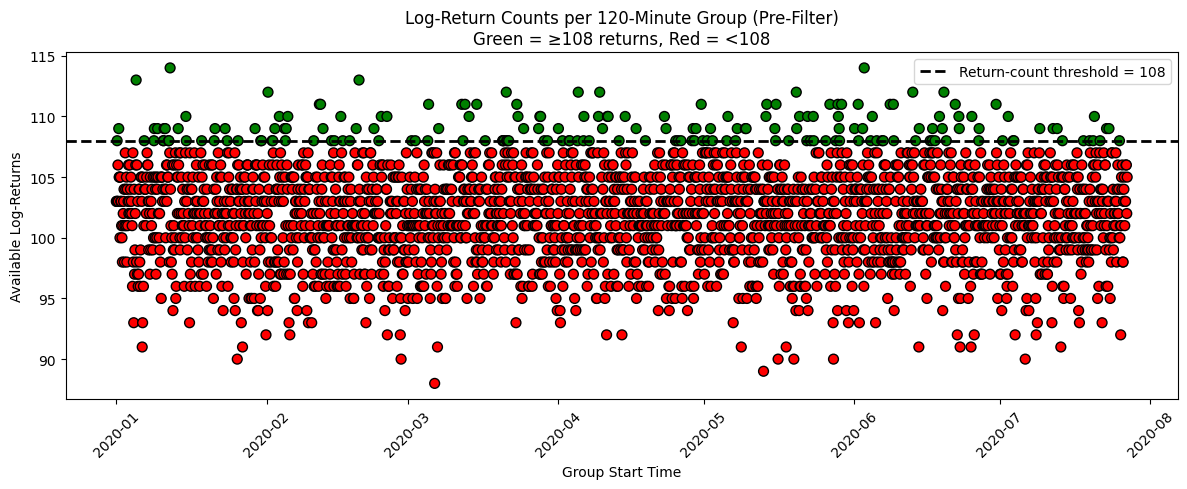

Keeping 183 groups (the green ones) out of 2500 total.


C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:159: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                          sum  count
group_id                            
2020-01-01 04:00:00  0.000002    108
2020-01-01 12:00:00  0.000003    109
2020-01-05 02:00:00  0.000003    113
2020-01-06 18:00:00  0.000003    108
2020-01-08 18:00:00  0.000003    108
...                       ...    ...
2020-07-20 12:00:00  0.000003    110
2020-07-21 16:00:00  0.000003    108
2020-07-23 00:00:00  0.000003    109
2020-07-23 12:00:00  0.000003    109
2020-07-25 16:00:00  0.000003    108

[183 rows x 2 columns]


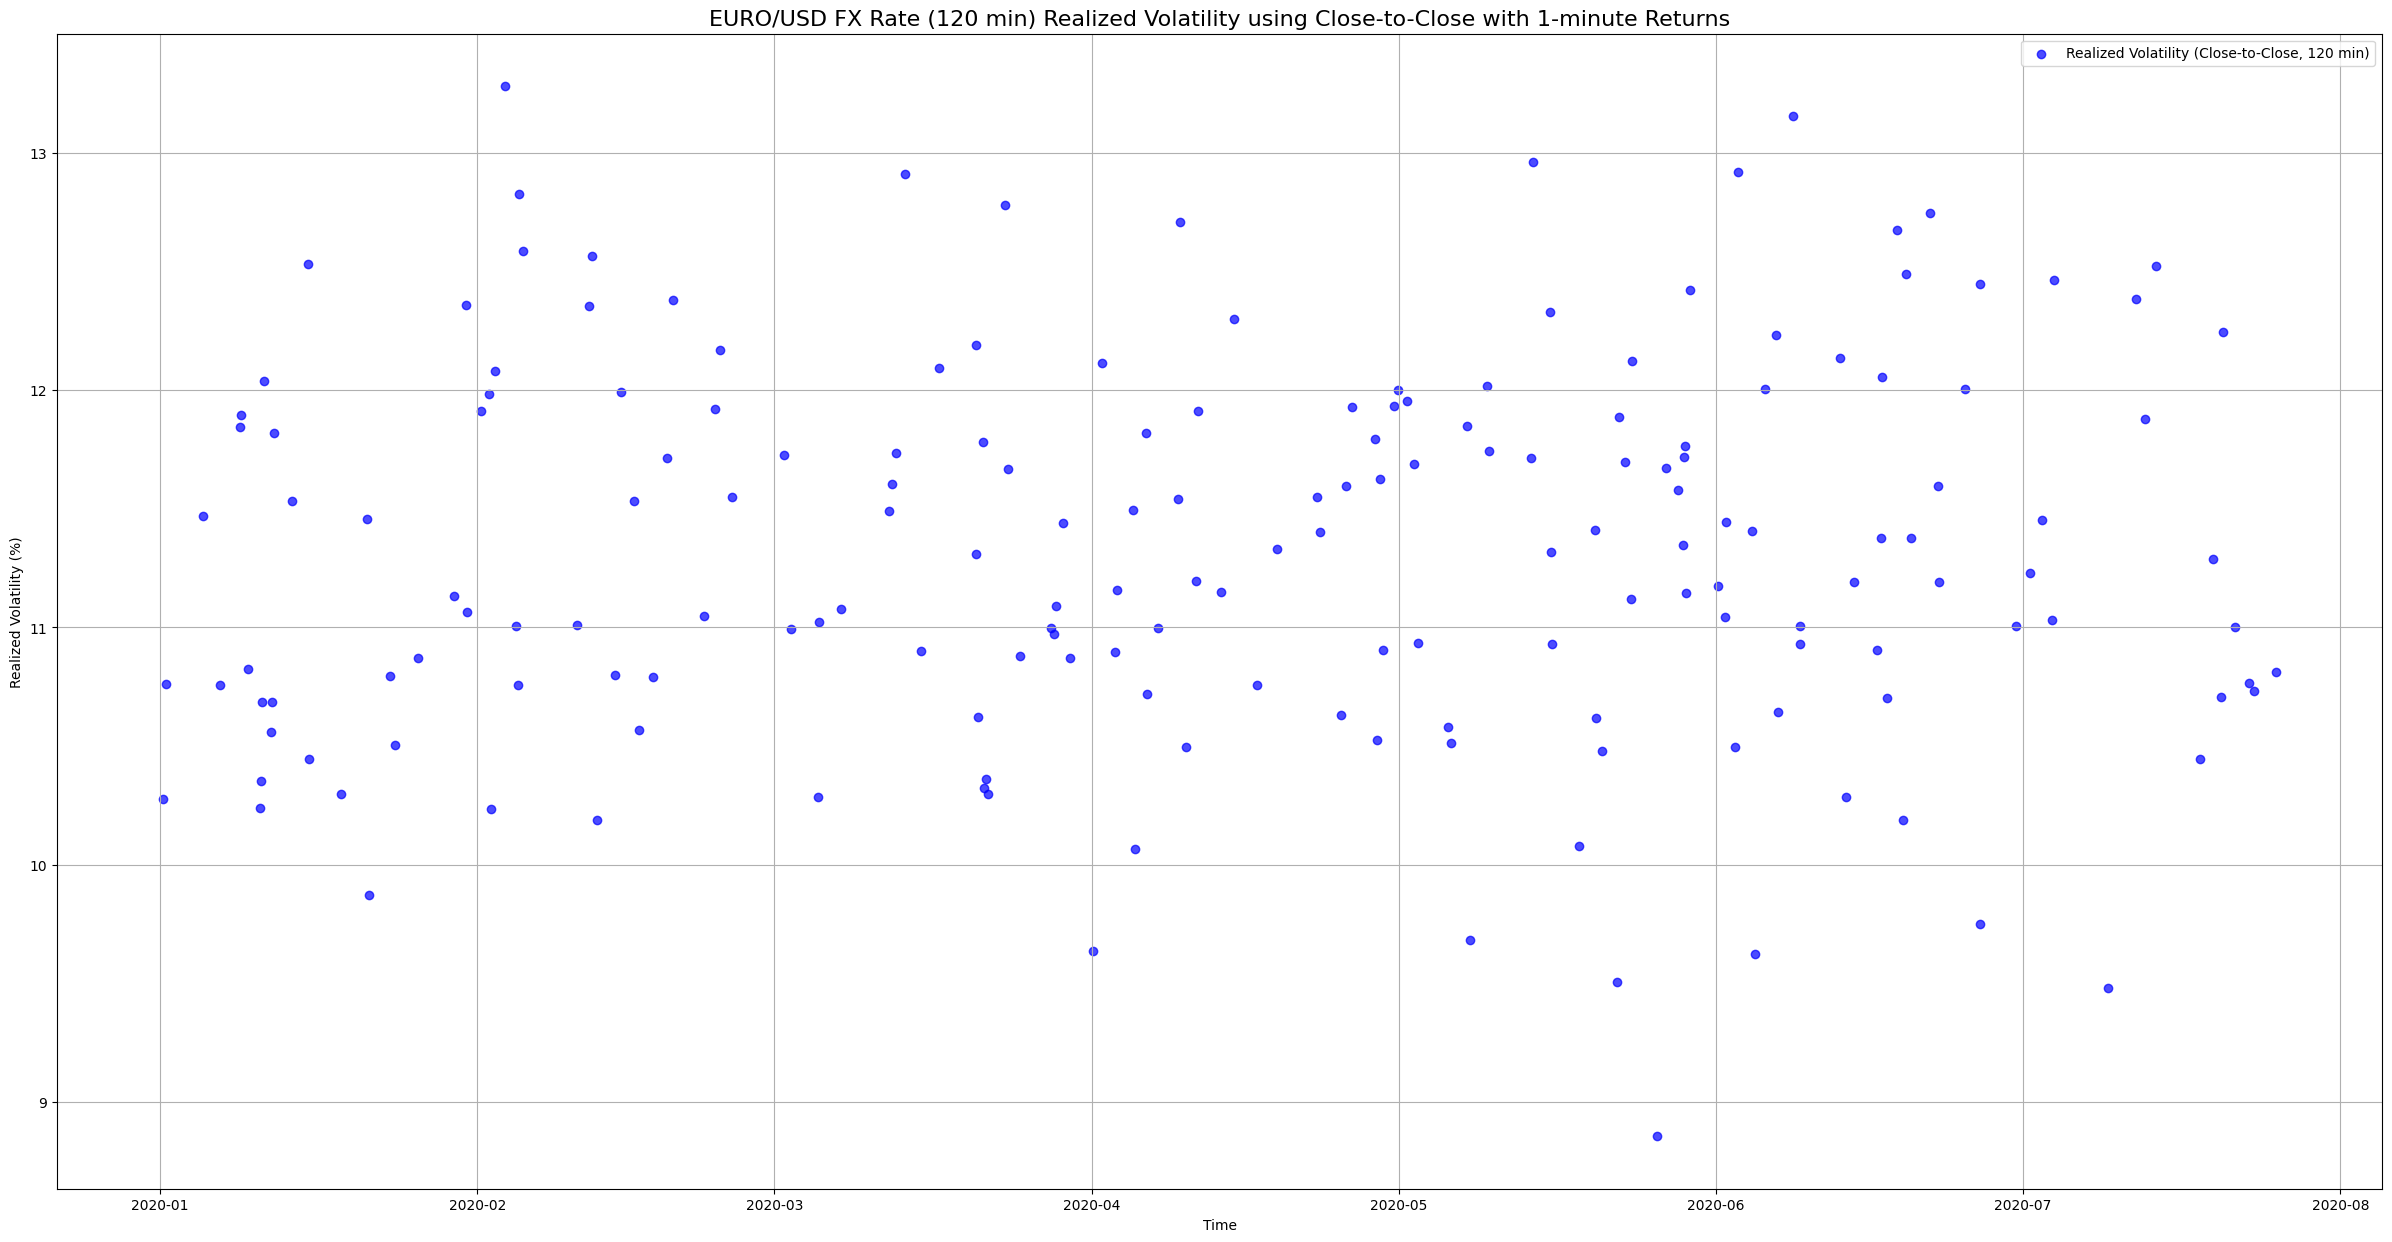

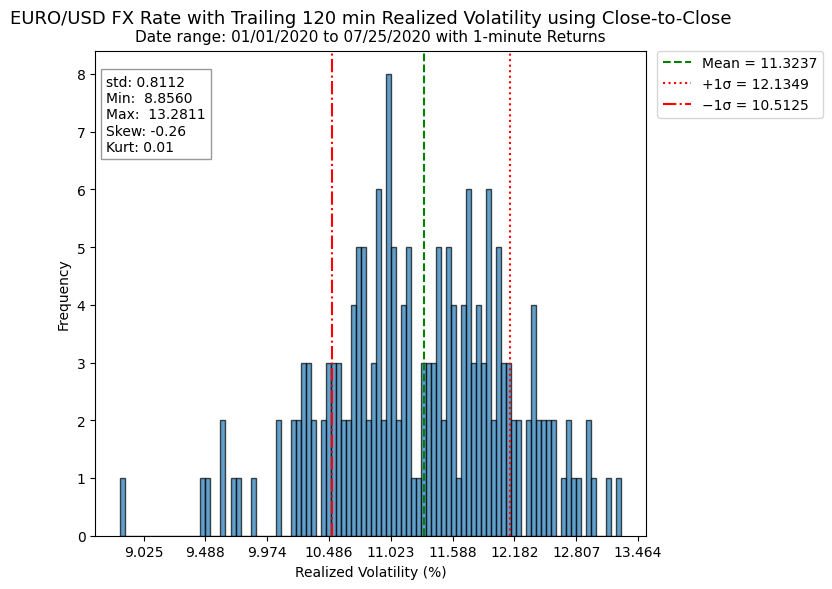

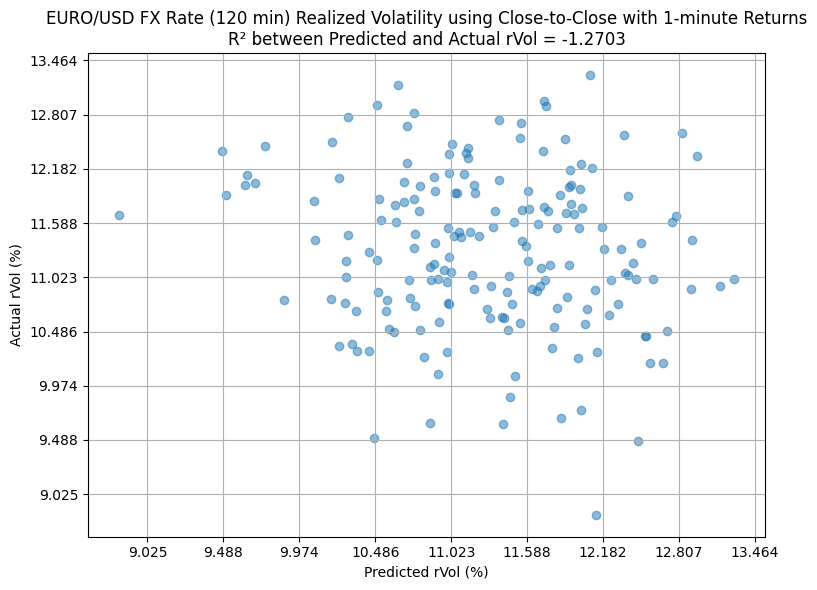

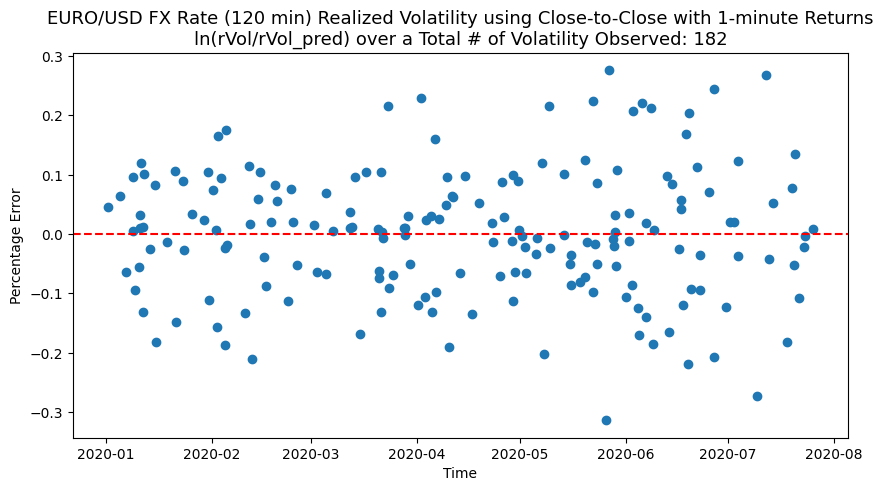

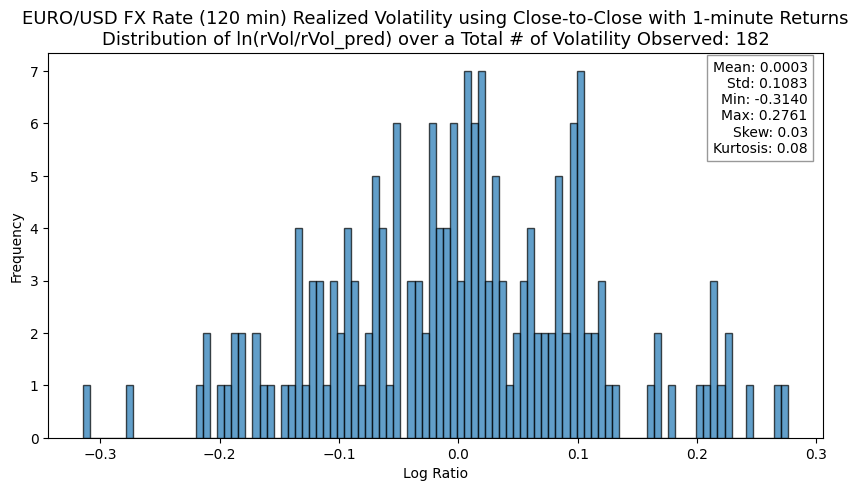

In [394]:
CC_120m_rvol_sample_df = calculate_rvol(sample_df, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Close-to-Close')

In [395]:
CC_120m_rvol_sample_df

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2020-01-01 05:59:00 2020-01-01 04:00:00 2020-01-01 04:00:00    1.124067   
2020-01-01 13:59:00 2020-01-01 12:00:00 2020-01-01 12:00:00    1.119605   
2020-01-05 03:59:00 2020-01-05 02:00:00 2020-01-05 02:00:00    1.110677   
2020-01-06 19:59:00 2020-01-06 18:00:00 2020-01-06 18:00:00    1.120383   
2020-01-08 19:59:00 2020-01-08 18:00:00 2020-01-08 18:00:00    1.120108   
...                                 ...                 ...         ...   
2020-07-20 13:59:00 2020-07-20 12:00:00 2020-07-20 12:00:00    1.122789   
2020-07-21 17:59:00 2020-07-21 16:00:00 2020-07-21 16:00:00    1.123085   
2020-07-23 01:59:00 2020-07-23 00:00:00 2020-07-23 00:00:00    1.129272   
2020-07-23 13:59:00 2020-07-23 12:00:00 2020-07-23 12:00:00    1.125520   
2020-07-25 17:59:00 2020-07-25 16:00:00 2020-07-25 16:00:00    1.125200   

                     High_max   Low_min  Close_last  Volume_sum  \
EndDateTime                                                       
2020-01-01 05:59:00  1.124299  1.120470    1.120832     10611.0   
2020-01-01 13:59:00  1.119830  1.116398    1.116892     10977.0   
2020-01-05 03:59:00  1.111216  1.109317    1.110937     11207.0   
2020-01-06 19:59:00  1.120933  1.119341    1.120680     10773.0   
2020-01-08 19:59:00  1.123528  1.119642    1.123281     10818.0   
...                       ...       ...         ...         ...   
2020-07-20 13:59:00  1.124226  1.122084    1.123031     11005.0   
2020-07-21 17:59:00  1.124438  1.122525    1.123344     10906.0   
2020-07-23 01:59:00  1.129804  1.127682    1.128689     10911.0   
2020-07-23 13:59:00  1.126789  1.124289    1.125031     10924.0   
2020-07-25 17:59:00  1.127111  1.124621    1.126075     10712.0   

                     indicator_sum  count  RVol_120min_Close-to-Close  
EndDateTime                                                            
2020-01-01 05:59:00             12  108.0                   10.278390  
2020-01-01 13:59:00             11  109.0                   10.762895  
2020-01-05 03:59:00              7  113.0                   11.469770  
2020-01-06 19:59:00             12  108.0                   10.755954  
2020-01-08 19:59:00             12  108.0                   11.845539  
...                            ...    ...                         ...  
2020-07-20 13:59:00             10  110.0                   12.244152  
2020-07-21 17:59:00             12  108.0                   11.000026  
2020-07-23 01:59:00             11  109.0                   10.765566  
2020-07-23 13:59:00             11  109.0                   10.731823  
2020-07-25 17:59:00             12  108.0                   10.814259  

[183 rows x 10 columns]

<Axes: xlabel='EndDateTime'>

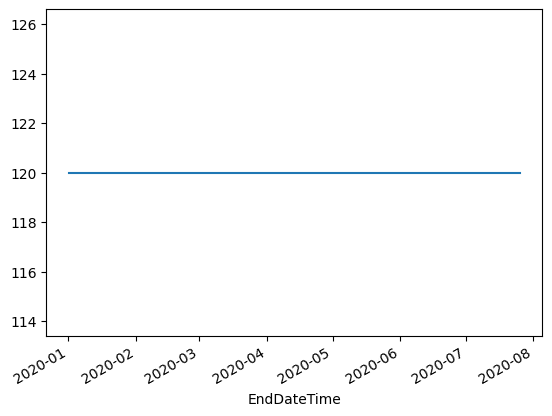

In [396]:
tp = CC_120m_rvol_sample_df['count'] + CC_120m_rvol_sample_df['indicator_sum'] 
tp.plot()

C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:551: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:62: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")


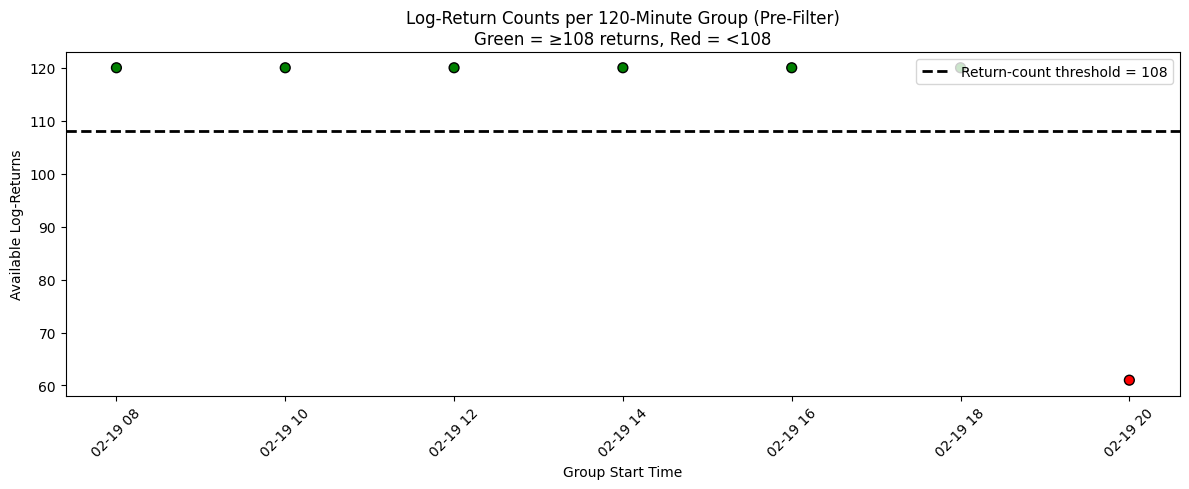

Keeping 6 groups (the green ones) out of 7 total.
                          sum  count
group_id                            
2025-02-19 08:00:00  0.000005    120
2025-02-19 10:00:00  0.000007    120
2025-02-19 12:00:00  0.000006    120
2025-02-19 14:00:00  0.000004    120
2025-02-19 16:00:00  0.000006    120
2025-02-19 18:00:00  0.000004    120


C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:159: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


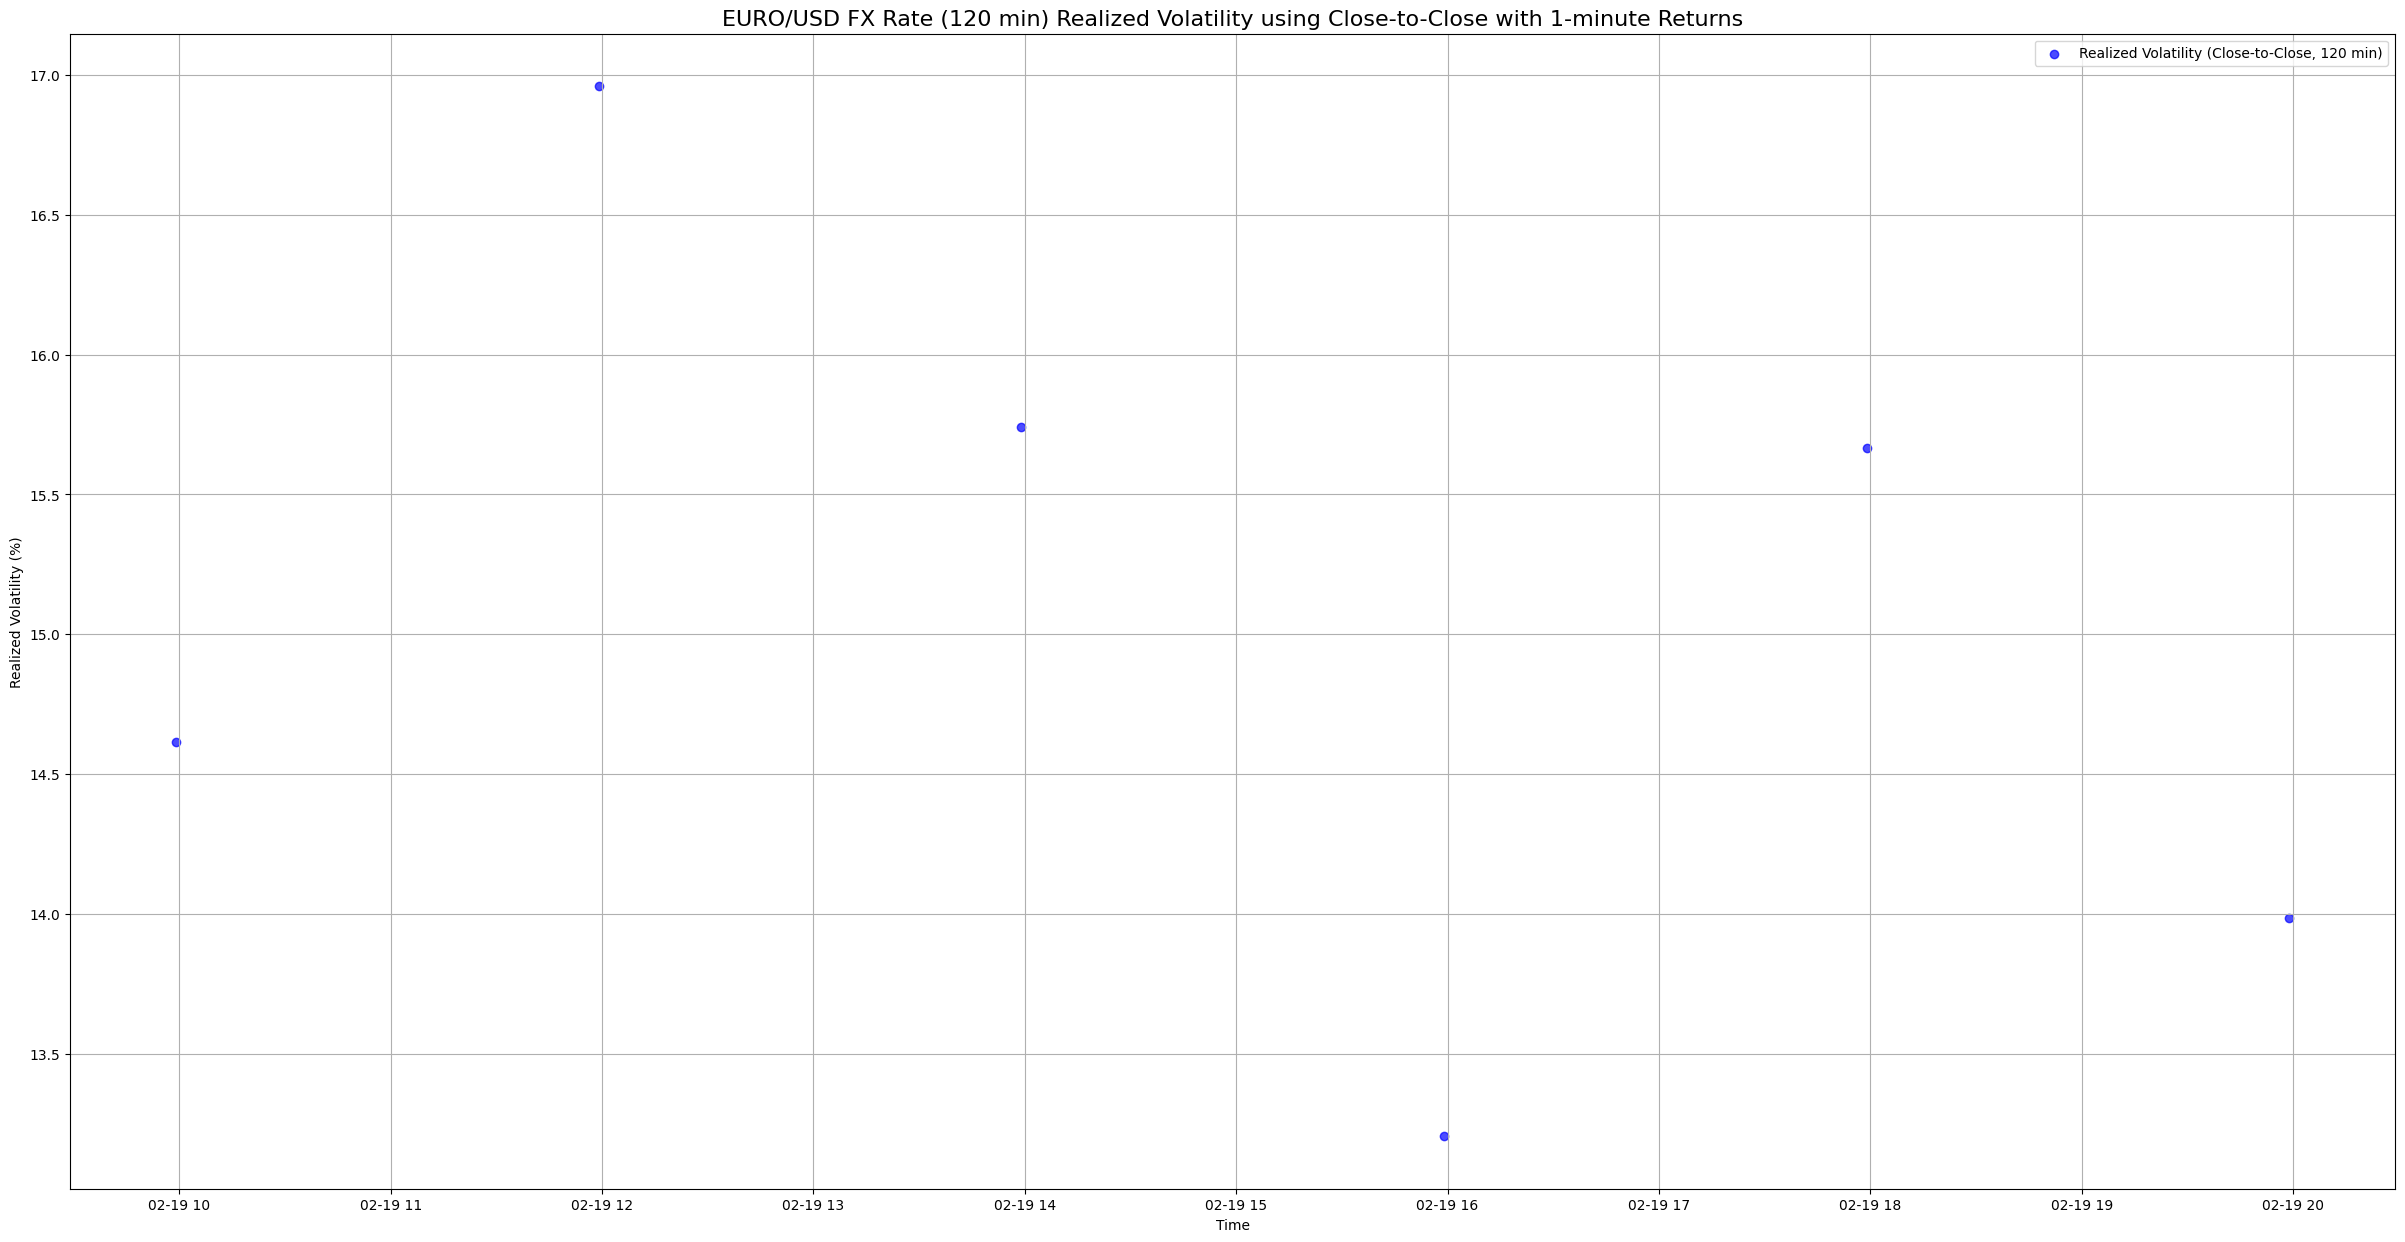

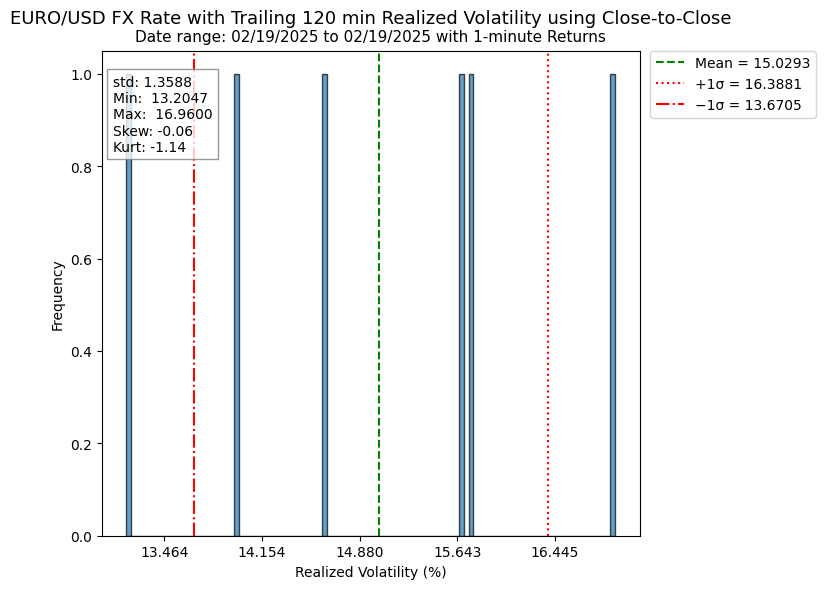

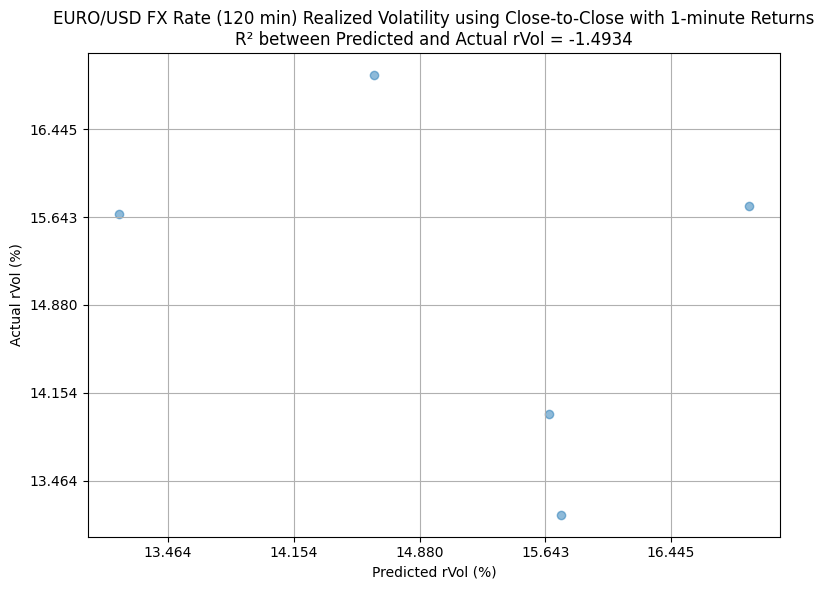

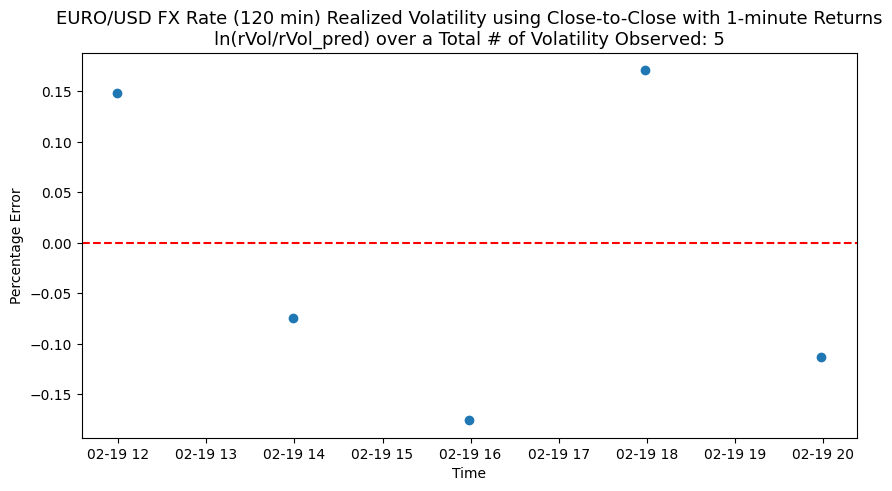

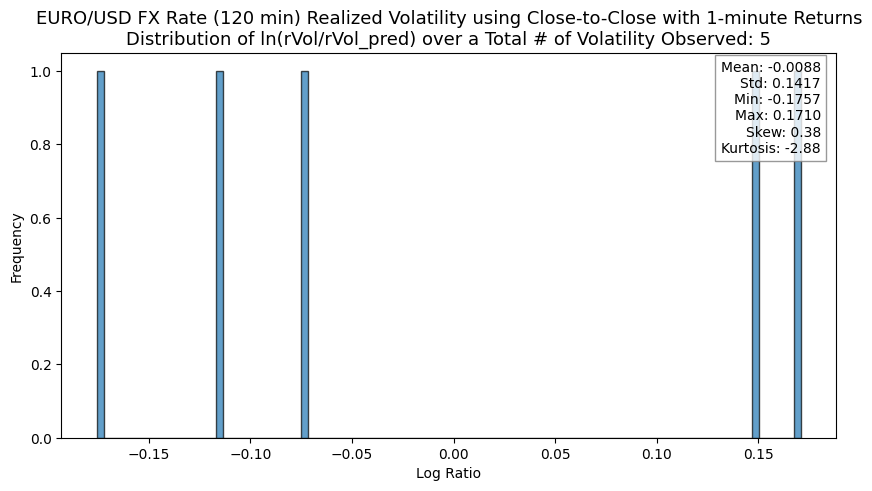

In [397]:
CC_120m_rvol_mid_ohlc = calculate_rvol(mid_ohlc, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [398]:
CC_120m_rvol_mid_ohlc

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2025-02-19 09:59:00 2025-02-19 08:00:00 2025-02-19 08:00:00  609.620921   
2025-02-19 11:59:00 2025-02-19 10:00:00 2025-02-19 10:00:00  607.944677   
2025-02-19 13:59:00 2025-02-19 12:00:00 2025-02-19 12:00:00  607.804411   
2025-02-19 15:59:00 2025-02-19 14:00:00 2025-02-19 14:00:00  608.029889   
2025-02-19 17:59:00 2025-02-19 16:00:00 2025-02-19 16:00:00  608.613320   
2025-02-19 19:59:00 2025-02-19 18:00:00 2025-02-19 18:00:00  610.000437   

                       High_max     Low_min  Close_last  Volume_sum  \
EndDateTime                                                           
2025-02-19 09:59:00  610.467443  607.740068  607.947937           0   
2025-02-19 11:59:00  608.213899  606.462187  607.811917           0   
2025-02-19 13:59:00  608.523004  607.118524  608.017532           0   
2025-02-19 15:59:00  609.237044  607.935626  608.605703           0   
2025-02-19 17:59:00  610.429396  608.458203  610.007987           0   
2025-02-19 19:59:00  611.040874  609.742204  610.933327           0   

                     indicator_sum  count  RVol_120min_Close-to-Close  
EndDateTime                                                            
2025-02-19 09:59:00              0  120.0                   14.615148  
2025-02-19 11:59:00              0  120.0                   16.959962  
2025-02-19 13:59:00              0  120.0                   15.741871  
2025-02-19 15:59:00              0  120.0                   13.204726  
2025-02-19 17:59:00              0  120.0                   15.667720  
2025-02-19 19:59:00              0  120.0                   13.986282

In [399]:
CC_120m_rvol_mid_ohlc['RVol_120min_Close-to-Close'].describe()

count     6.000000
mean     15.029285
std       1.358769
min      13.204726
25%      14.143498
50%      15.141434
75%      15.723333
max      16.959962
Name: RVol_120min_Close-to-Close, dtype: float64

In [400]:
# SPY 15 VOL TEST DATASET

#CC_120m_rvol_mid_ohlc = calculate_rvol(mid_ohlc, vol_measure = 'Close-to-Close', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [401]:
CC_120m_rvol_mid_ohlc

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2025-02-19 09:59:00 2025-02-19 08:00:00 2025-02-19 08:00:00  609.620921   
2025-02-19 11:59:00 2025-02-19 10:00:00 2025-02-19 10:00:00  607.944677   
2025-02-19 13:59:00 2025-02-19 12:00:00 2025-02-19 12:00:00  607.804411   
2025-02-19 15:59:00 2025-02-19 14:00:00 2025-02-19 14:00:00  608.029889   
2025-02-19 17:59:00 2025-02-19 16:00:00 2025-02-19 16:00:00  608.613320   
2025-02-19 19:59:00 2025-02-19 18:00:00 2025-02-19 18:00:00  610.000437   

                       High_max     Low_min  Close_last  Volume_sum  \
EndDateTime                                                           
2025-02-19 09:59:00  610.467443  607.740068  607.947937           0   
2025-02-19 11:59:00  608.213899  606.462187  607.811917           0   
2025-02-19 13:59:00  608.523004  607.118524  608.017532           0   
2025-02-19 15:59:00  609.237044  607.935626  608.605703           0   
2025-02-19 17:59:00  610.429396  608.458203  610.007987           0   
2025-02-19 19:59:00  611.040874  609.742204  610.933327           0   

                     indicator_sum  count  RVol_120min_Close-to-Close  
EndDateTime                                                            
2025-02-19 09:59:00              0  120.0                   14.615148  
2025-02-19 11:59:00              0  120.0                   16.959962  
2025-02-19 13:59:00              0  120.0                   15.741871  
2025-02-19 15:59:00              0  120.0                   13.204726  
2025-02-19 17:59:00              0  120.0                   15.667720  
2025-02-19 19:59:00              0  120.0                   13.986282

C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:551: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:62: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")


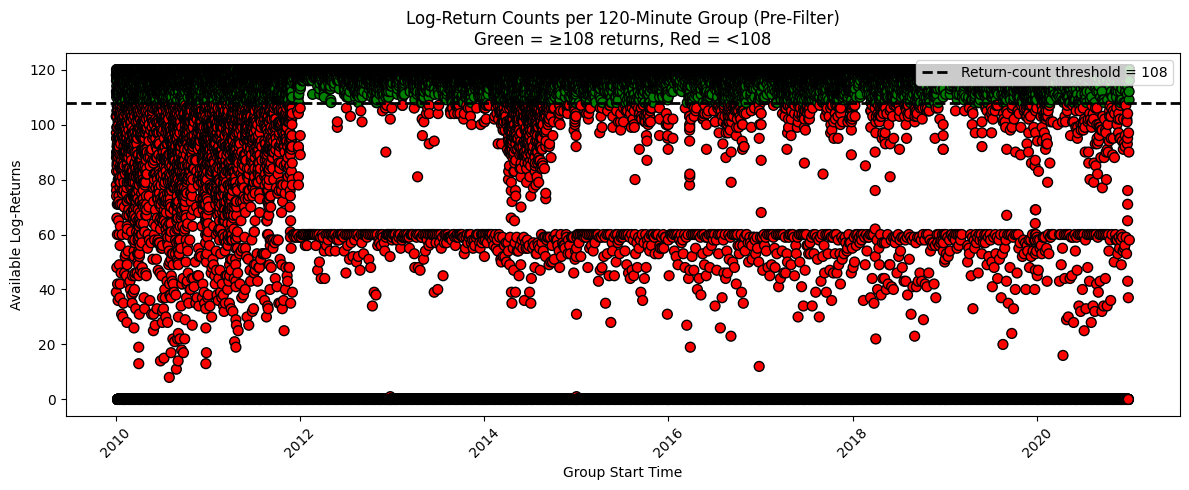

Keeping 30124 groups (the green ones) out of 48181 total.


C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:159: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                              sum  count
group_id                                
2010-01-04 02:00:00  2.858405e-06    118
2010-01-04 04:00:00  2.991575e-06    118
2010-01-04 06:00:00  2.387306e-06    112
2010-01-04 08:00:00  3.388827e-06    116
2010-01-04 10:00:00  3.599000e-06    120
...                           ...    ...
2020-12-31 06:00:00  1.112382e-06    120
2020-12-31 08:00:00  1.195913e-06    120
2020-12-31 10:00:00  3.078248e-06    120
2020-12-31 12:00:00  9.595704e-07    120
2020-12-31 14:00:00  3.463094e-07    116

[30124 rows x 2 columns]


C:\Users\estifo\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


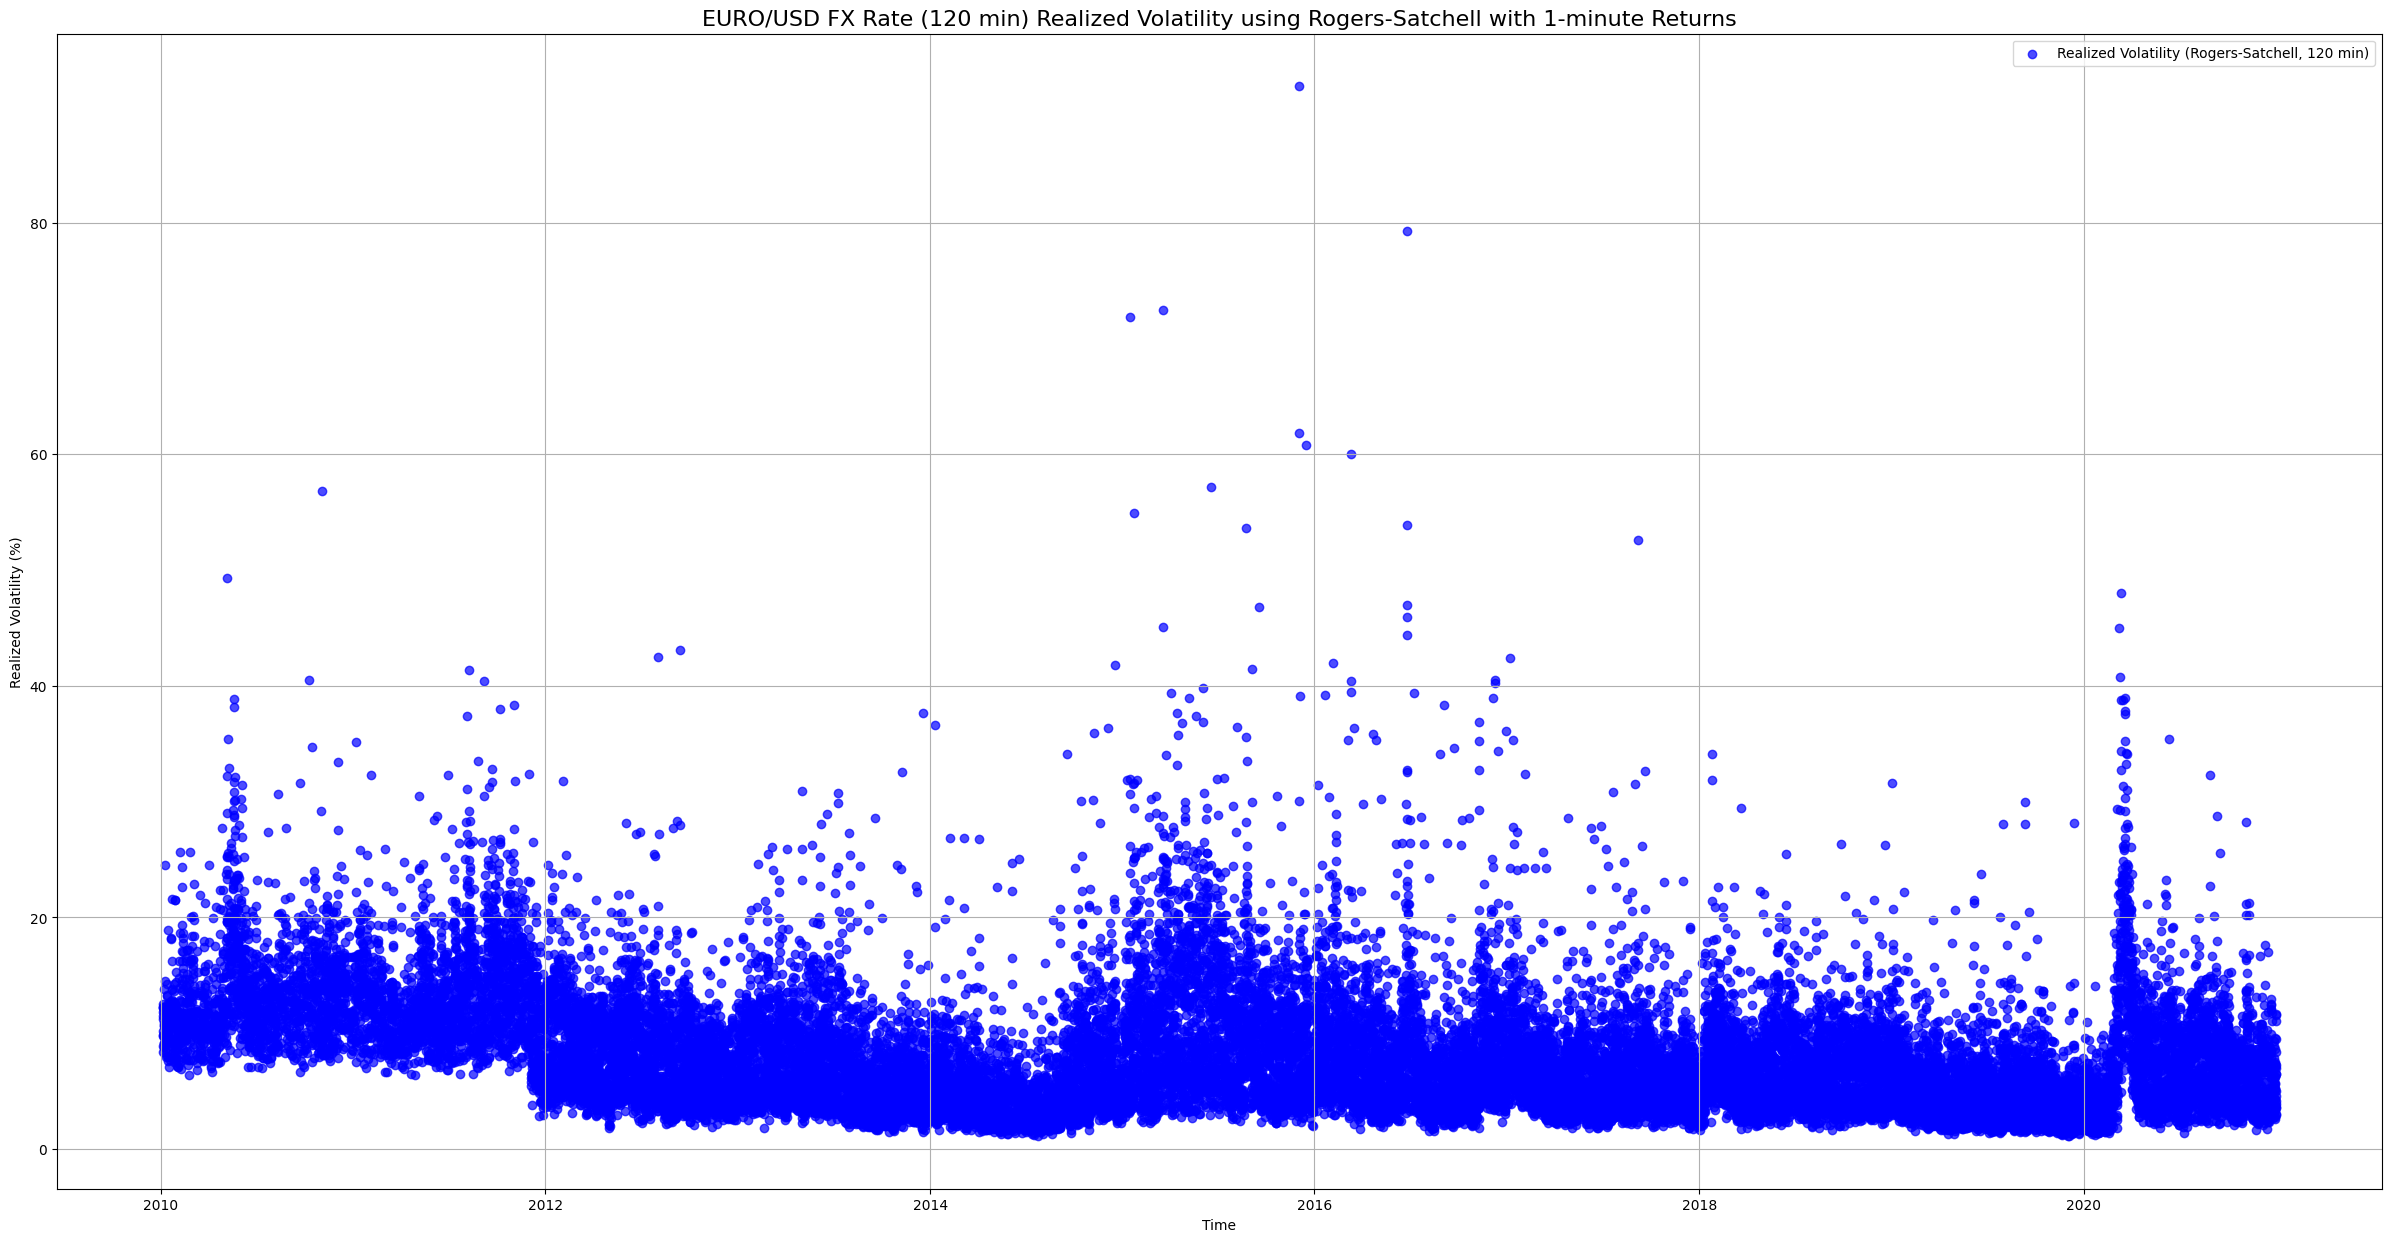

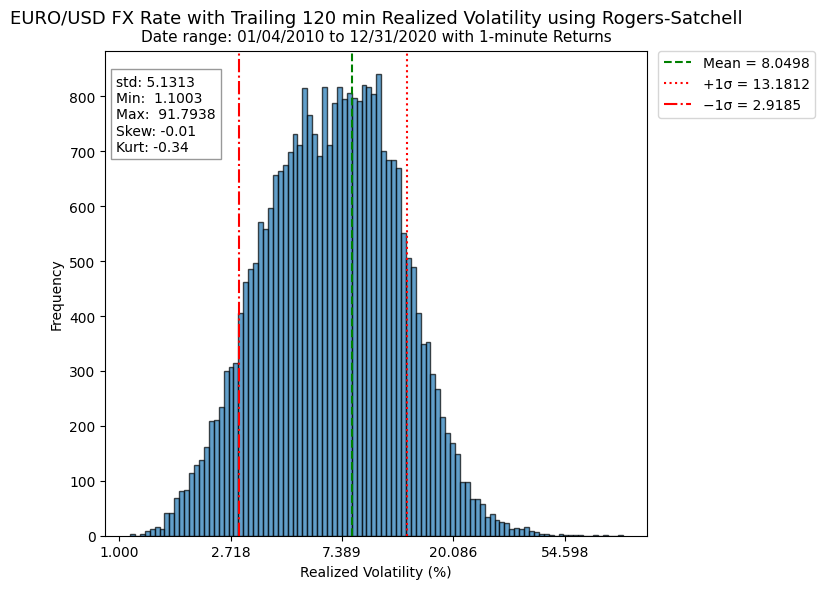

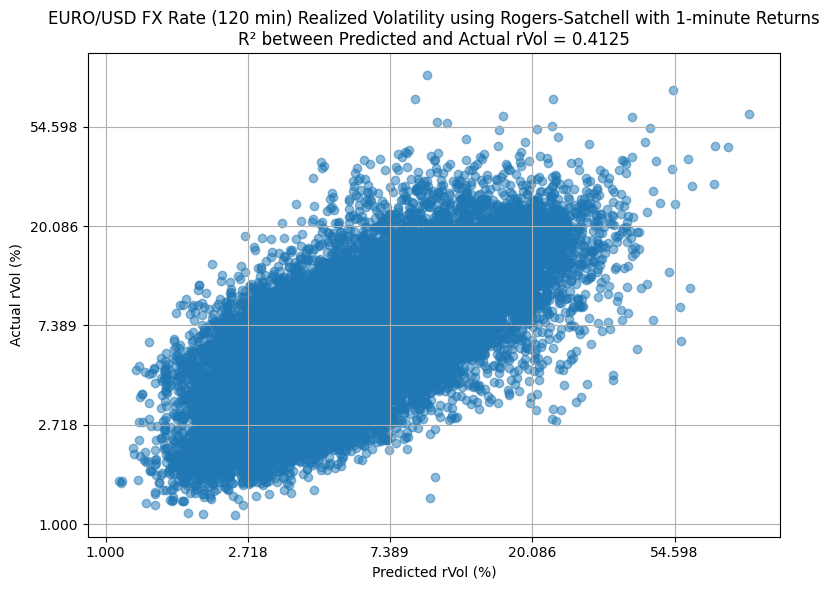

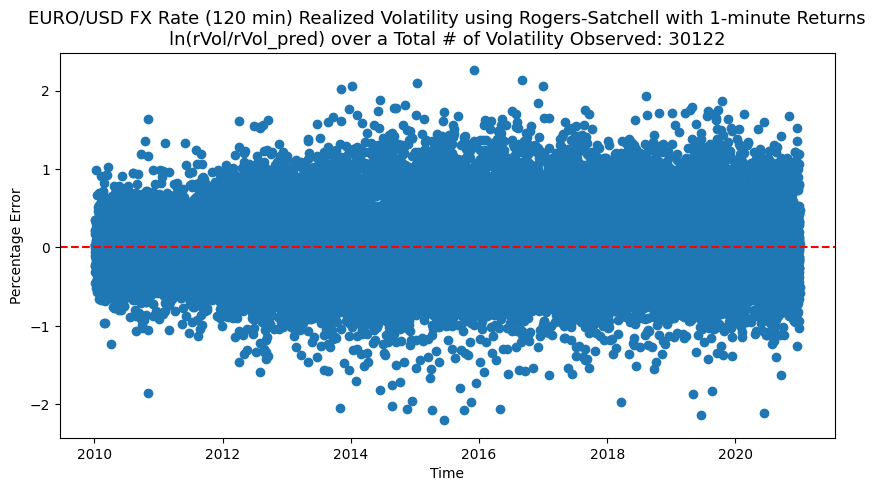

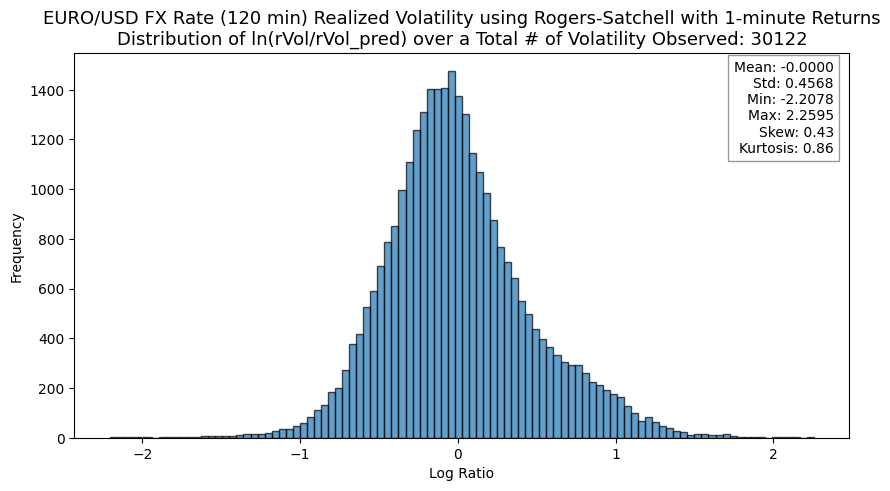

In [402]:
RS_120m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 120, minute_interval = 1, threshold = 0.1, vol_title = 'RVol_120min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'


In [403]:
RS_120m_rvol.head(20)

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2010-01-04 03:59:00 2010-01-04 02:00:00 2010-01-04 02:00:00      1.4297   
2010-01-04 05:59:00 2010-01-04 04:00:00 2010-01-04 04:00:00      1.4337   
2010-01-04 07:59:00 2010-01-04 06:00:00 2010-01-04 06:00:00      1.4374   
2010-01-04 09:59:00 2010-01-04 08:00:00 2010-01-04 08:00:00      1.4398   
2010-01-04 11:59:00 2010-01-04 10:00:00 2010-01-04 10:00:00      1.4425   
2010-01-05 01:59:00 2010-01-05 00:00:00 2010-01-05 00:00:00      1.4426   
2010-01-05 03:59:00 2010-01-05 02:00:00 2010-01-05 02:00:00      1.4474   
2010-01-05 05:59:00 2010-01-05 04:00:00 2010-01-05 04:00:00      1.4419   
2010-01-05 07:59:00 2010-01-05 06:00:00 2010-01-05 06:00:00      1.4417   
2010-01-05 09:59:00 2010-01-05 08:00:00 2010-01-05 08:00:00      1.4438   
2010-01-05 11:59:00 2010-01-05 10:00:00 2010-01-05 10:00:00      1.4404   
2010-01-05 13:59:00 2010-01-05 12:00:00 2010-01-05 12:00:00      1.4402   
2010-01-06 03:59:00 2010-01-06 02:00:00 2010-01-06 02:00:00      1.4312   
2010-01-06 05:59:00 2010-01-06 04:00:00 2010-01-06 04:00:00      1.4352   
2010-01-06 09:59:00 2010-01-06 08:00:00 2010-01-06 08:00:00      1.4355   
2010-01-06 11:59:00 2010-01-06 10:00:00 2010-01-06 10:00:00      1.4353   
2010-01-07 03:59:00 2010-01-07 02:00:00 2010-01-07 02:00:00      1.4370   
2010-01-07 05:59:00 2010-01-07 04:00:00 2010-01-07 04:00:00      1.4365   
2010-01-07 07:59:00 2010-01-07 06:00:00 2010-01-07 06:00:00      1.4349   
2010-01-07 09:59:00 2010-01-07 08:00:00 2010-01-07 08:00:00      1.4317   

                     High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
EndDateTime                                                                     
2010-01-04 03:59:00    1.4339   1.4269      1.4335         0.0            2.0   
2010-01-04 05:59:00    1.4399   1.4336      1.4375         0.0            2.0   
2010-01-04 07:59:00    1.4417   1.4374      1.4397         0.0            8.0   
2010-01-04 09:59:00    1.4450   1.4387      1.4423         0.0            4.0   
2010-01-04 11:59:00    1.4456   1.4403      1.4418         0.0            0.0   
2010-01-05 01:59:00    1.4476   1.4416      1.4475         0.0           10.0   
2010-01-05 03:59:00    1.4483   1.4406      1.4420         0.0            1.0   
2010-01-05 05:59:00    1.4438   1.4414      1.4418         0.0            2.0   
2010-01-05 07:59:00    1.4455   1.4400      1.4437         0.0            8.0   
2010-01-05 09:59:00    1.4446   1.4387      1.4405         0.0            6.0   
2010-01-05 11:59:00    1.4434   1.4386      1.4401         0.0            0.0   
2010-01-05 13:59:00    1.4406   1.4346      1.4363         0.0            9.0   
2010-01-06 03:59:00    1.4351   1.4283      1.4351         0.0            3.0   
2010-01-06 05:59:00    1.4382   1.4347      1.4375         0.0            4.0   
2010-01-06 09:59:00    1.4373   1.4342      1.4354         0.0            3.0   
2010-01-06 11:59:00    1.4416   1.4352      1.4403         0.0            0.0   
2010-01-07 03:59:00    1.4398   1.4356      1.4365         0.0            1.0   
2010-01-07 05:59:00    1.4383   1.4339      1.4350         0.0            2.0   
2010-01-07 07:59:00    1.4352   1.4316      1.4318         0.0            8.0   
2010-01-07 09:59:00    1.4352   1.4299      1.4319         0.0            0.0   

                     count  RVol_120min_Rogers-Satchell  
EndDateTime                                              
2010-01-04 03:59:00  118.0                    11.189197  
2010-01-04 05:59:00  118.0                    11.446877  
2010-01-04 07:59:00  112.0                    10.225655  
2010-01-04 09:59:00  116.0                    12.183210  
2010-01-04 11:59:00  120.0                    12.555326  
2010-01-05 01:59:00  110.0                     9.824426  
2010-01-05 03:59:00  119.0                    12.249708  
2010-01-05 05:59:00  118.0                     8.884526  
2010-01-05 07:59:

In [404]:
RS_120m_rvol.describe()

group_id                  StartDateTime  \
count                          30124                          30124   
mean   2015-10-31 13:48:14.914353920  2015-10-31 13:48:14.916345600   
min              2010-01-04 02:00:00            2010-01-04 02:00:00   
25%              2013-04-01 15:30:00            2013-04-01 15:30:00   
50%              2015-11-25 21:00:00            2015-11-25 21:00:00   
75%              2018-06-14 08:30:00            2018-06-14 08:30:00   
max              2020-12-31 14:00:00            2020-12-31 14:00:00   
std                              NaN                            NaN   

         Open_first      High_max       Low_min    Close_last  Volume_sum  \
count  30124.000000  30124.000000  30124.000000  30124.000000     30124.0   
mean       1.211218      1.212574      1.209877      1.211210         0.0   
min        1.035590      1.037900      1.034060      1.035600         0.0   
25%        1.119020      1.120167      1.117927      1.119028         0.0   
50%        1.179660      1.180785      1.178665      1.179655         0.0   
75%        1.309083      1.310758      1.307478      1.309040         0.0   
max        1.493700      1.493900      1.486200      1.493200         0.0   
std        0.107345      0.107573      0.107079      0.107329         0.0   

       indicator_sum         count  RVol_120min_Rogers-Satchell  
count   30124.000000  30124.000000                 30123.000000  
mean        1.435500    118.564467                     8.049840  
min         0.000000    108.000000                     1.100260  
25%         0.000000    118.000000                     4.379477  
50%         0.000000    120.000000                     6.873922  
75%         2.000000    120.000000                    10.371625  
max        12.000000    120.000000                    91.793796  
std         2.658298      2.658287                     5.131335

C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:551: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:62: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")


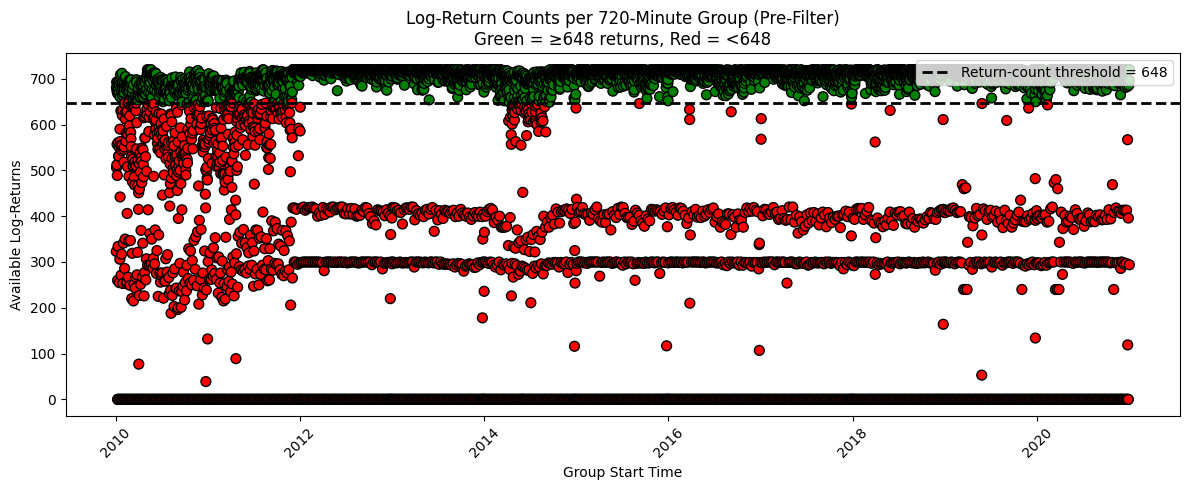

Keeping 4647 groups (the green ones) out of 8031 total.


C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:159: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                          sum  count
group_id                            
2010-01-04 00:00:00  0.000016    681
2010-01-05 00:00:00  0.000016    693
2010-01-06 00:00:00  0.000016    674
2010-01-07 00:00:00  0.000013    692
2010-01-08 00:00:00  0.000026    669
...                       ...    ...
2020-12-29 00:00:00  0.000006    720
2020-12-29 12:00:00  0.000003    686
2020-12-30 00:00:00  0.000010    720
2020-12-30 12:00:00  0.000002    697
2020-12-31 00:00:00  0.000009    720

[4647 rows x 2 columns]


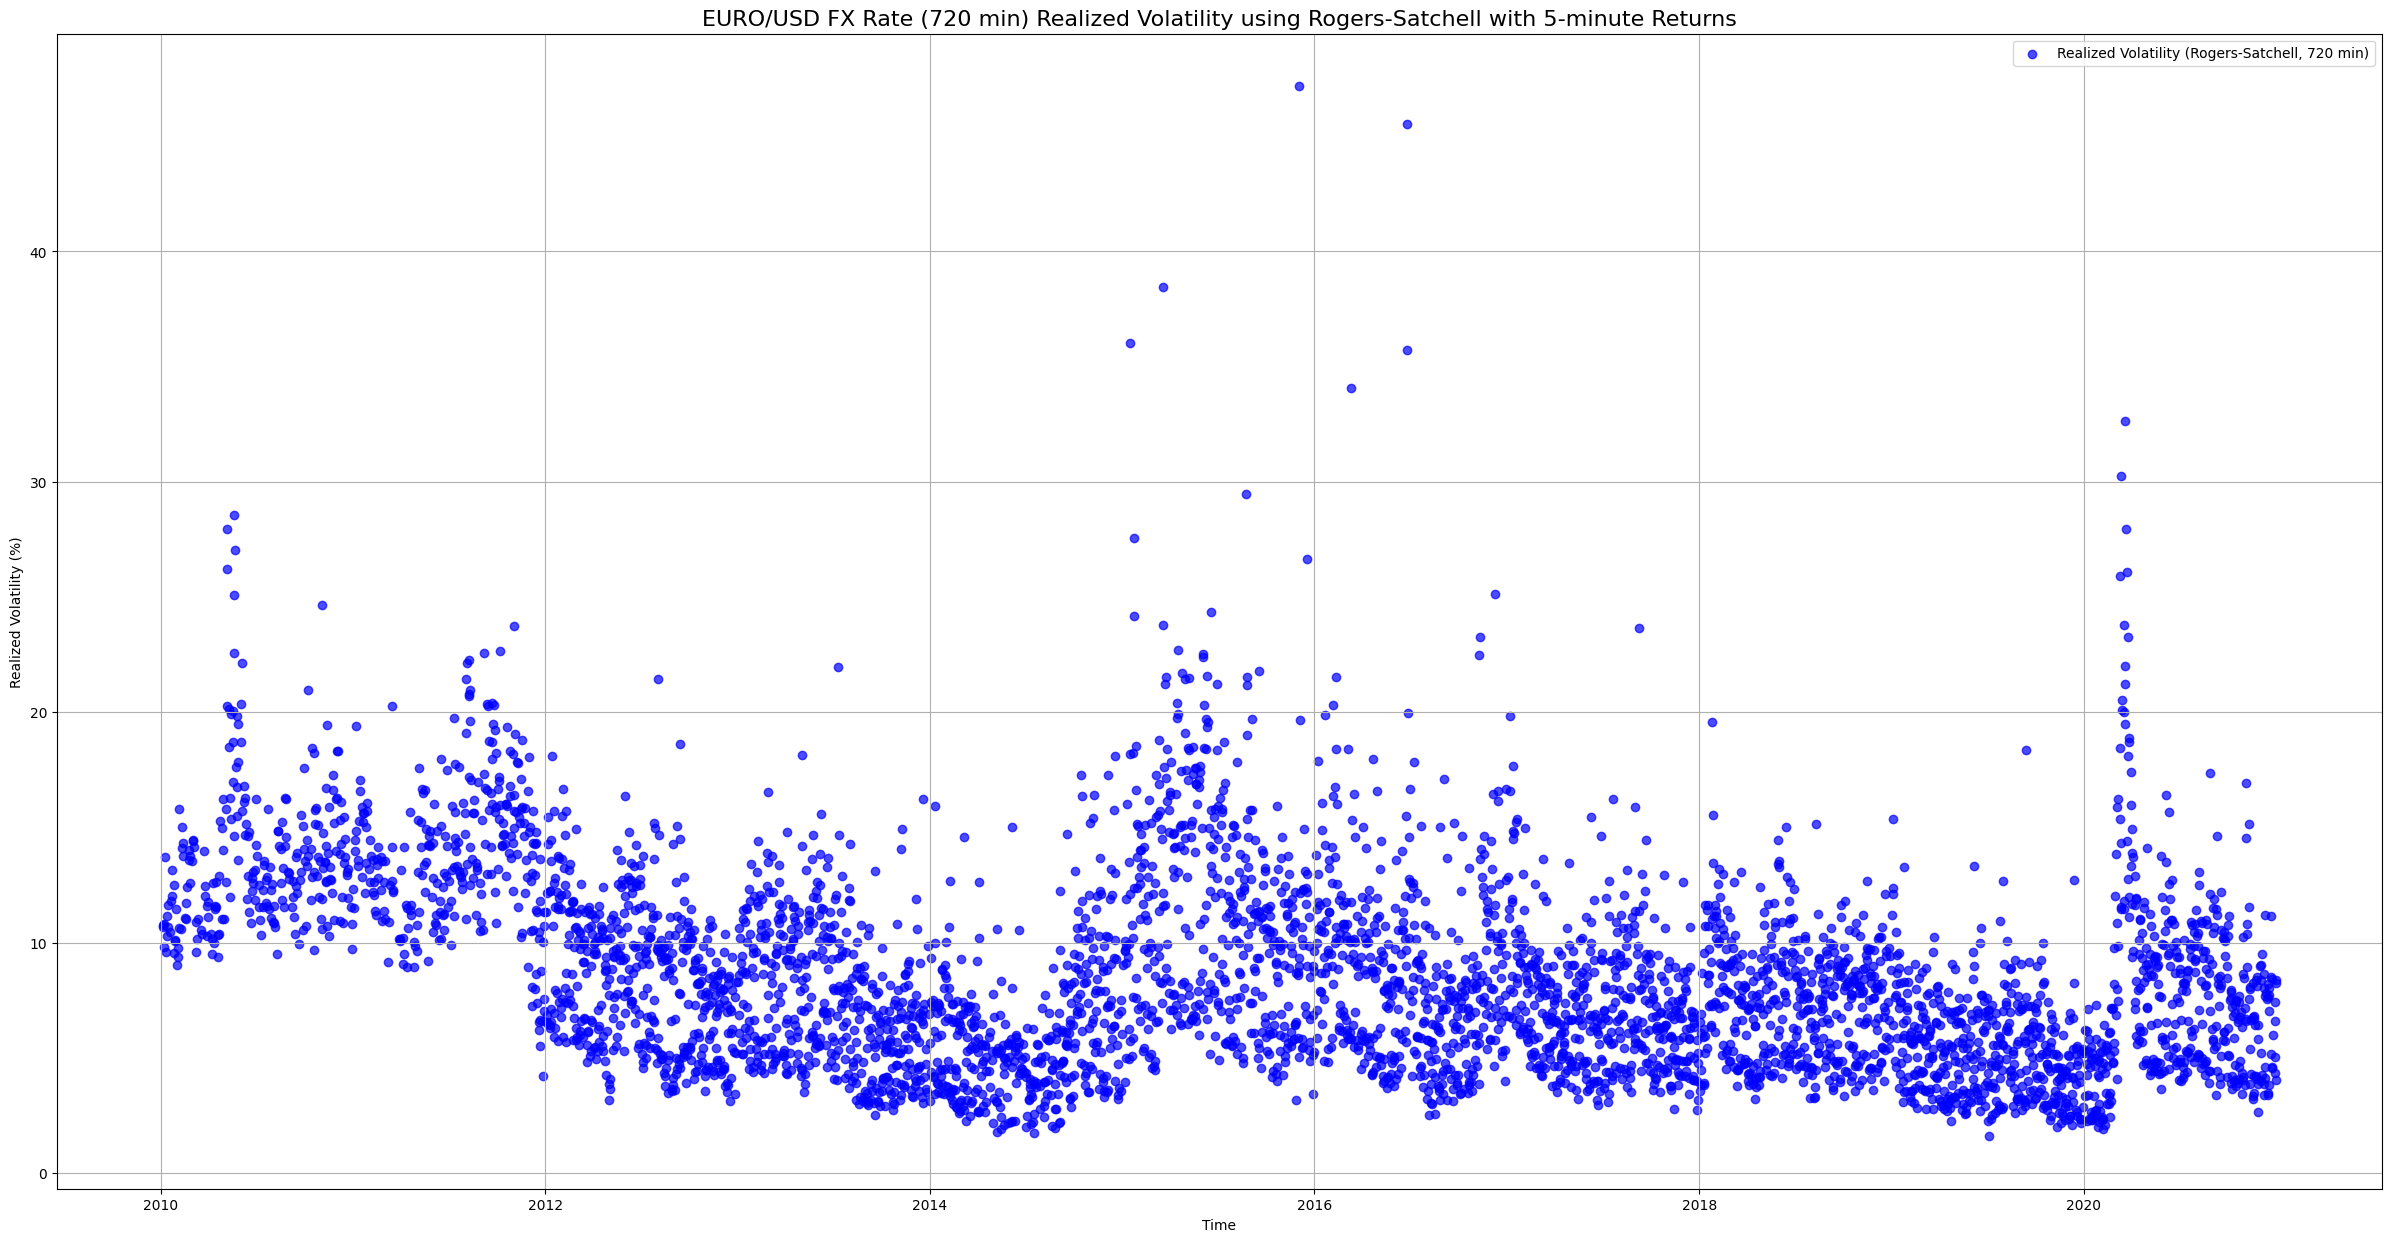

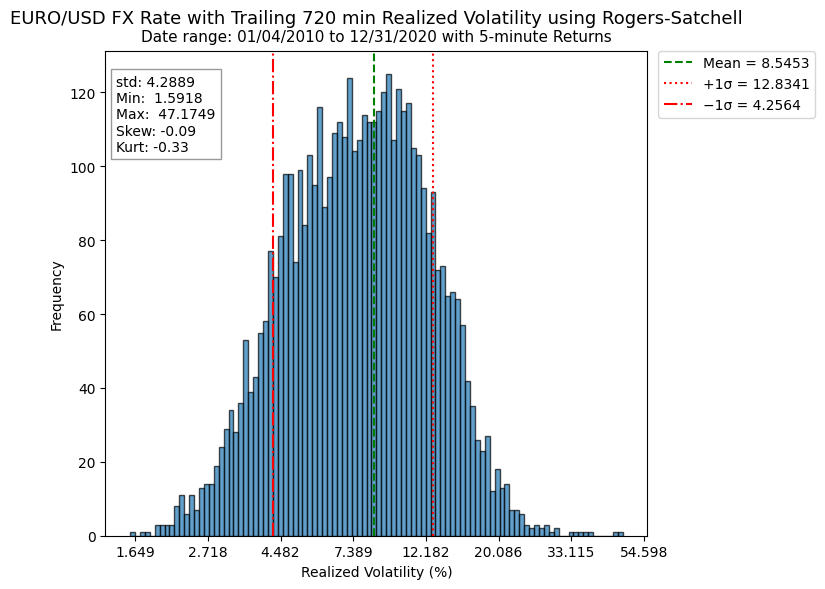

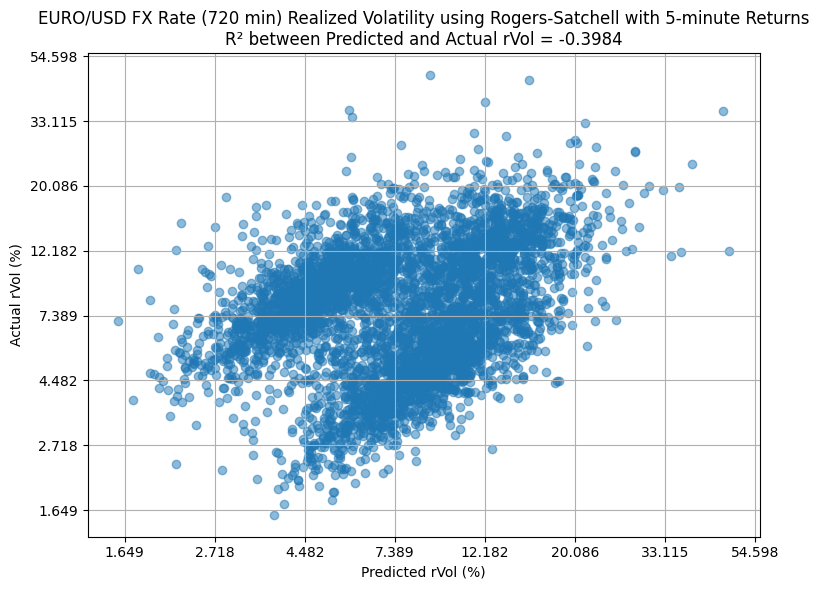

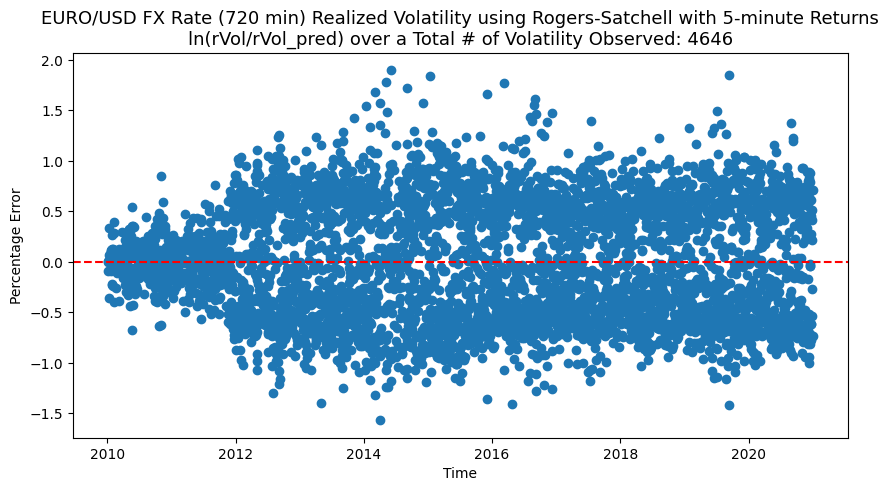

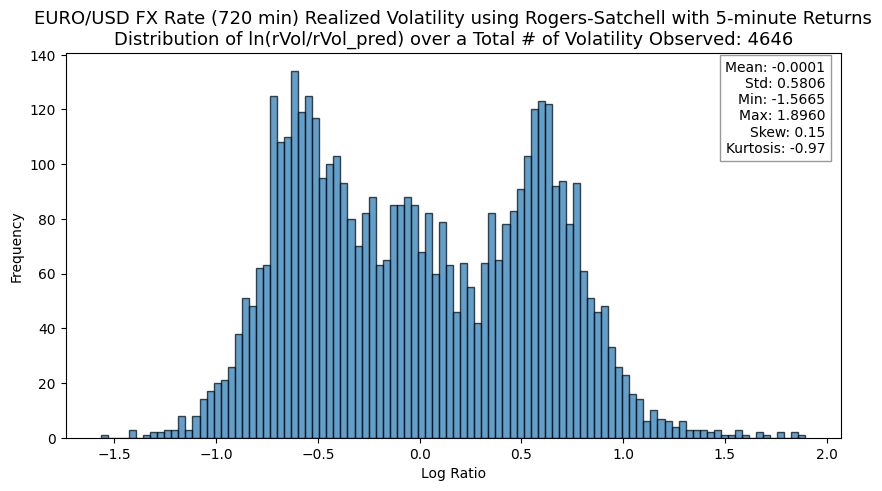

In [405]:

RS_720m_rvol = calculate_rvol(data, vol_measure = 'Rogers-Satchell', timeframe = 720, minute_interval = 5, threshold = 0.1, vol_title= 'RVol_720min_Rogers-Satchell')  # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [406]:
RS_720m_rvol.describe()

group_id                  StartDateTime  \
count                           4647                           4647   
mean   2015-11-23 08:50:58.489347840  2015-11-23 08:50:58.489347840   
min              2010-01-04 00:00:00            2010-01-04 00:00:00   
25%              2013-05-08 06:00:00            2013-05-08 06:00:00   
50%              2015-12-22 00:00:00            2015-12-22 00:00:00   
75%              2018-06-26 06:00:00            2018-06-26 06:00:00   
max              2020-12-31 00:00:00            2020-12-31 00:00:00   
std                              NaN                            NaN   

        Open_first     High_max      Low_min   Close_last  Volume_sum  \
count  4647.000000  4647.000000  4647.000000  4647.000000      4647.0   
mean      1.209561     1.213066     1.206047     1.209520         0.0   
min       1.037390     1.040270     1.034060     1.037380         0.0   
25%       1.118885     1.121655     1.115910     1.118845         0.0   
50%       1.178380     1.181030     1.175600     1.178270         0.0   
75%       1.307485     1.311535     1.304130     1.307390         0.0   
max       1.486400     1.493900     1.479100     1.487400         0.0   
std       0.106466     0.107000     0.105810     0.106407         0.0   

       indicator_sum        count  RVol_720min_Rogers-Satchell  
count    4647.000000  4647.000000                  4647.000000  
mean       12.356789   707.642995                     8.545279  
min         0.000000   648.000000                     1.591797  
25%         1.000000   702.000000                     5.307378  
50%         6.000000   714.000000                     7.732293  
75%        18.000000   719.000000                    10.869721  
max        72.000000   720.000000                    47.174900  
std        14.920657    14.920832                     4.288858

In [407]:
#rvol_2880m_cc = calculate_rvol(data, vol_measure='Close-to-Close', timeframe=2880, minute_interval= 1, threshold=0.1, vol_title= 'RVol_2880min_Close-to-Close') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:551: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Prev_Close_global'].fillna(data['Open'], inplace=True)
C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:62: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  ohlc['group_id'] = ohlc.index.floor(f"{timeframe}T")


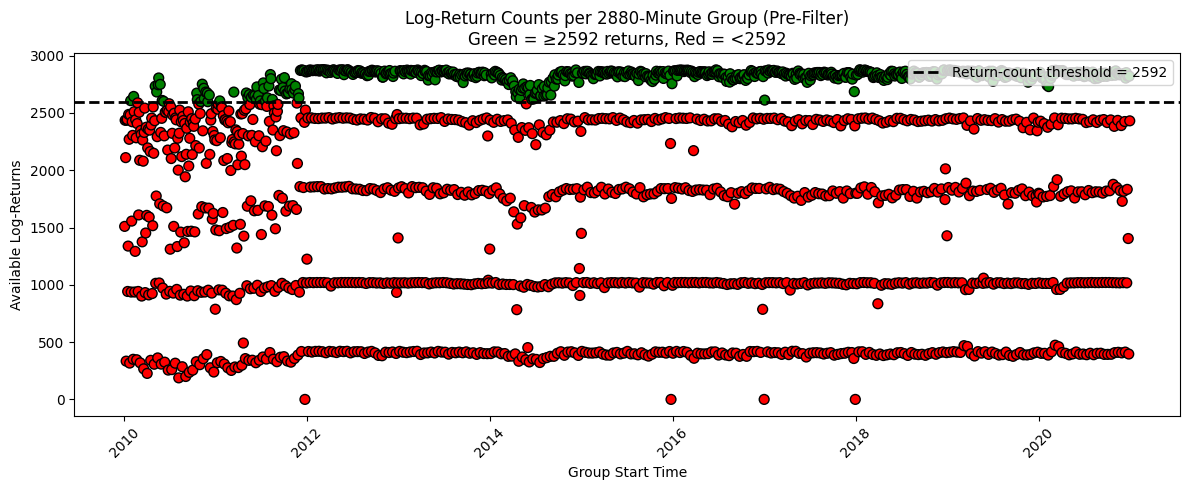

Keeping 748 groups (the green ones) out of 2008 total.


C:\Users\estifo\AppData\Local\Temp\ipykernel_25708\1113774426.py:159: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: compute_volatility_measure(grp, vol_measure))


                 sum  count
group_id                   
2010-01-27  0.000066   2607
2010-02-08  0.000071   2644
2010-05-05  0.000211   2733
2010-05-11  0.000115   2683
2010-05-17  0.000167   2746
...              ...    ...
2020-12-08  0.000023   2841
2020-12-14  0.000019   2804
2020-12-16  0.000028   2852
2020-12-22  0.000025   2821
2020-12-28  0.000019   2821

[748 rows x 2 columns]


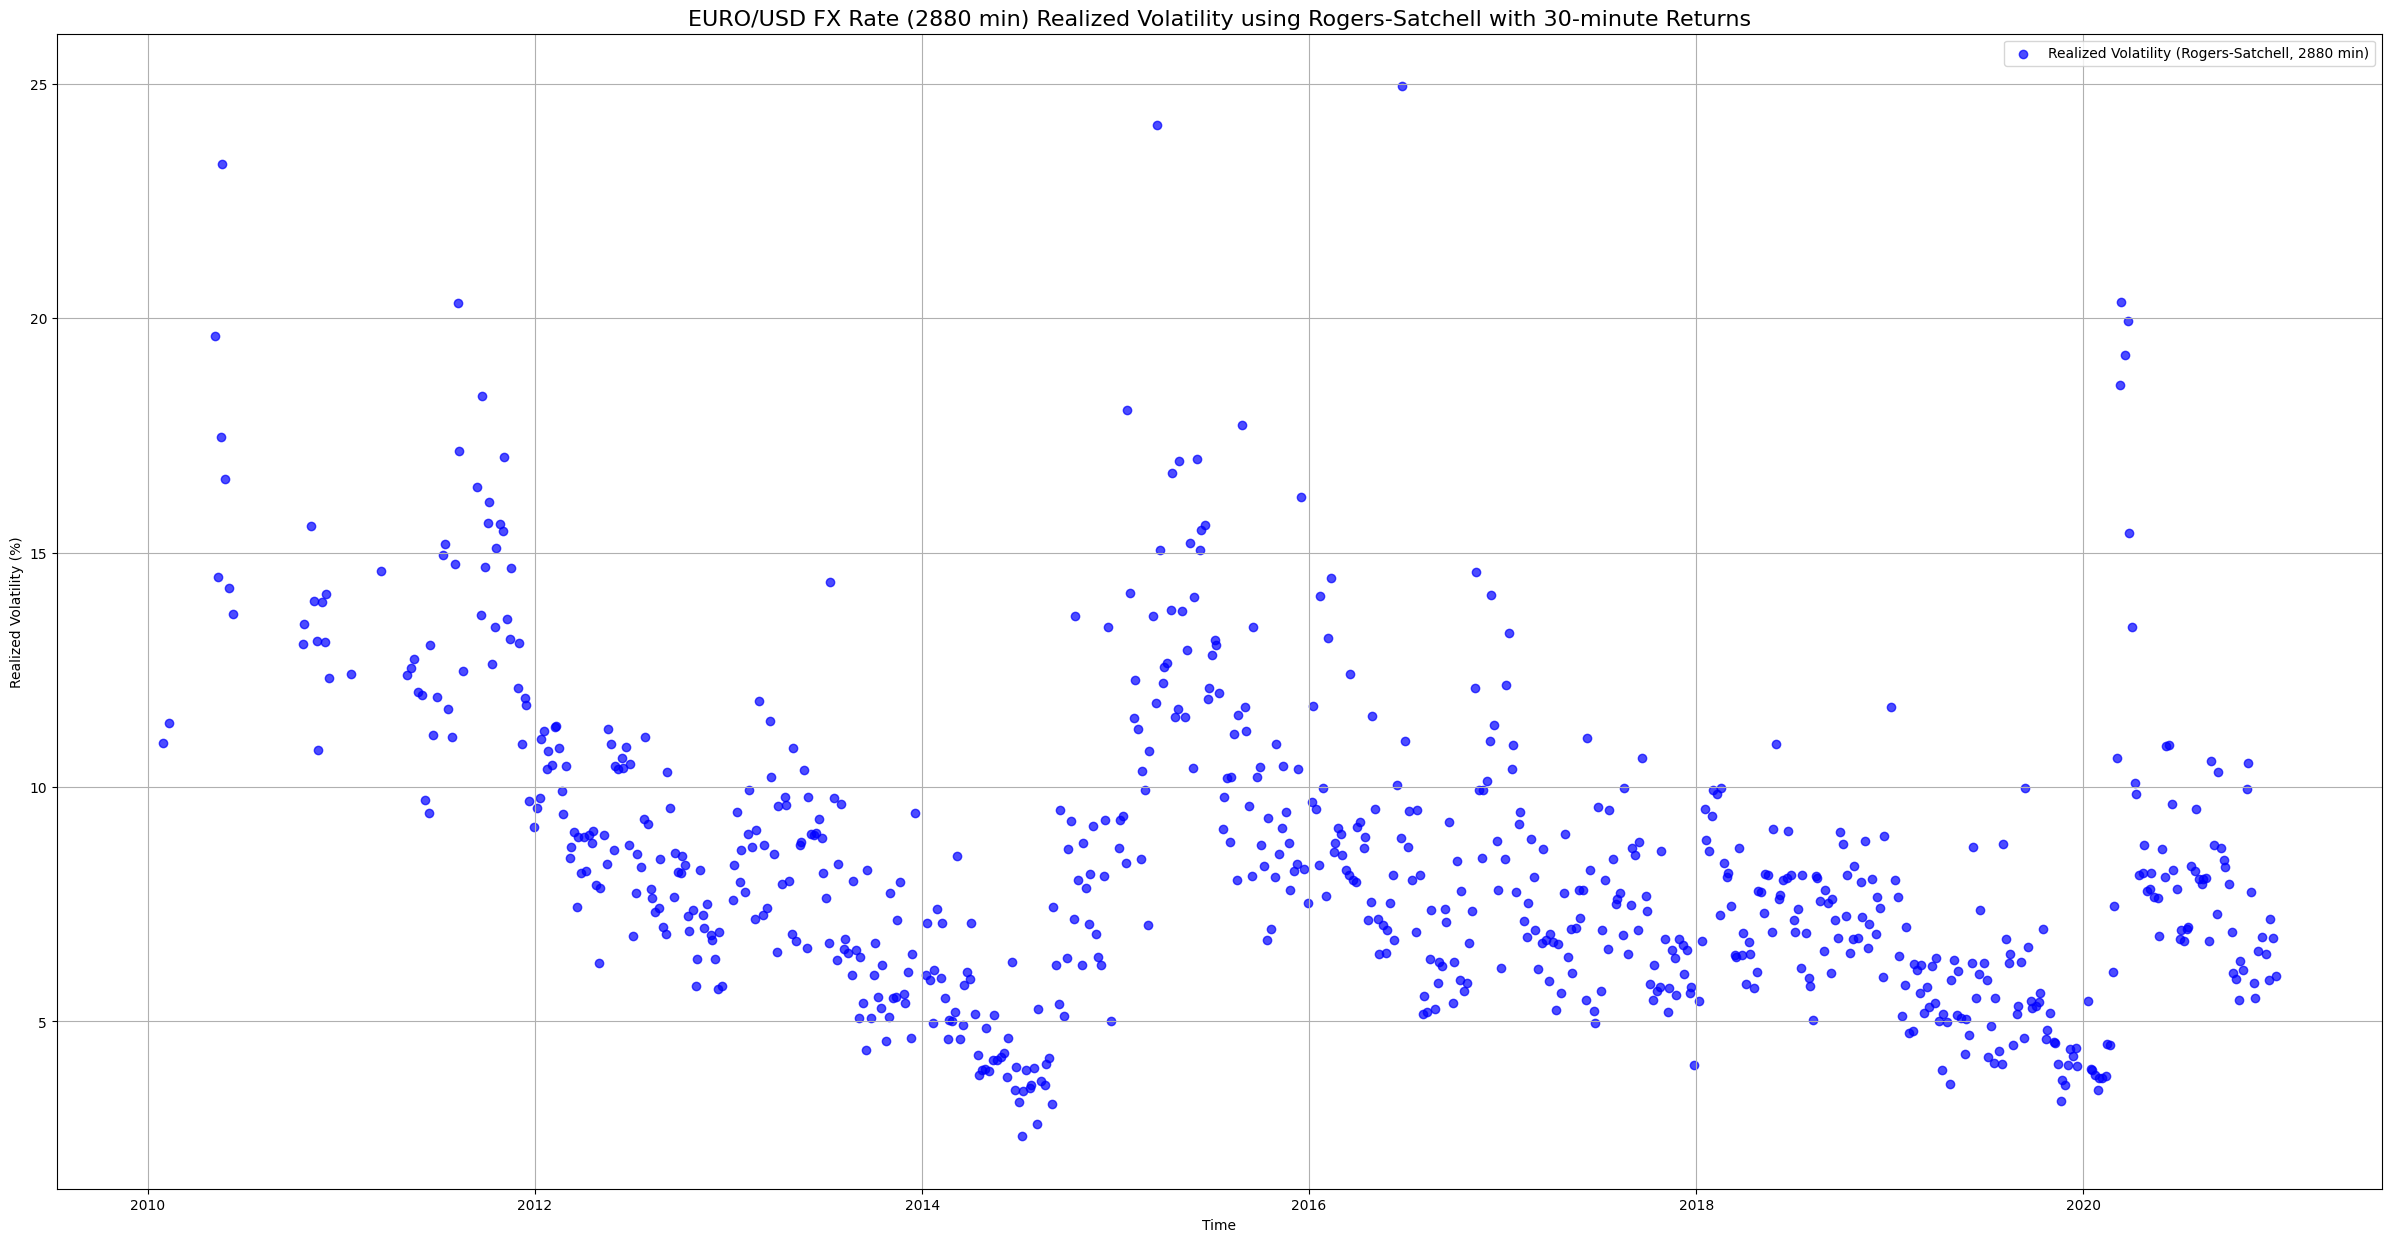

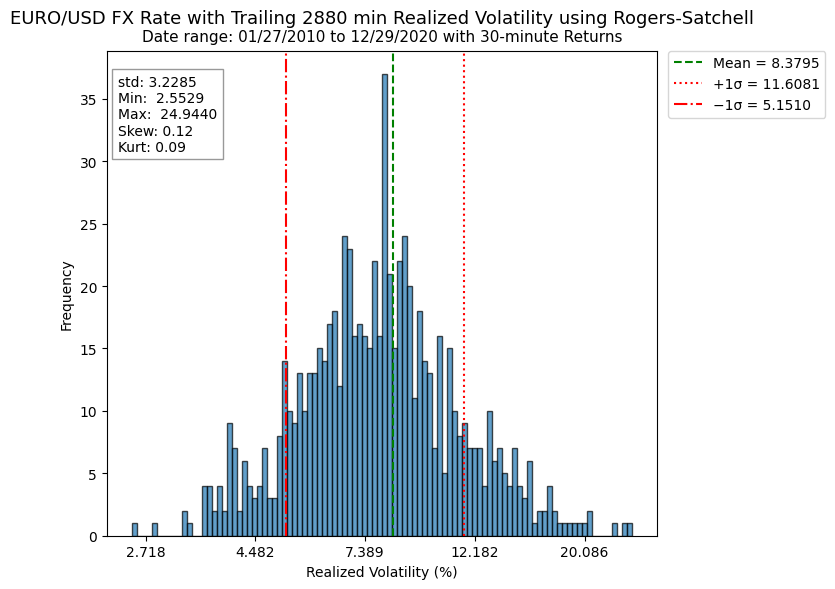

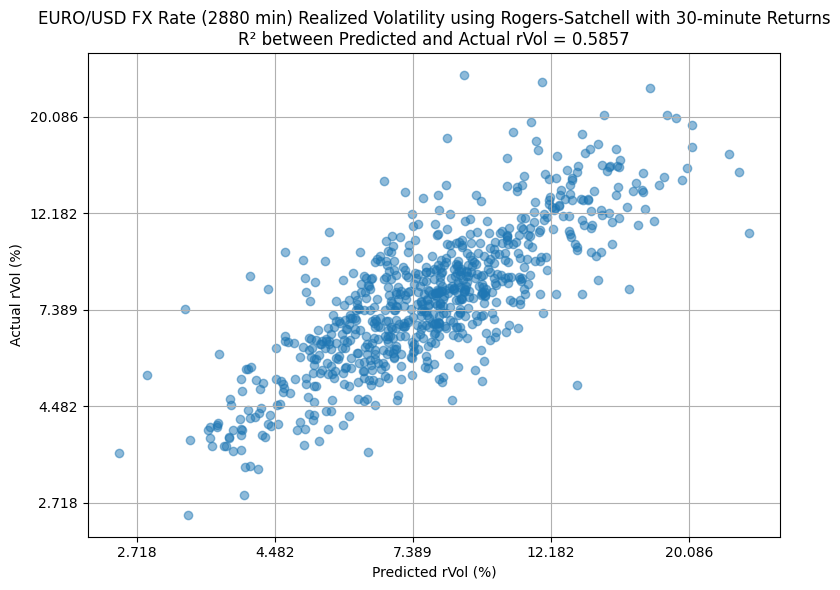

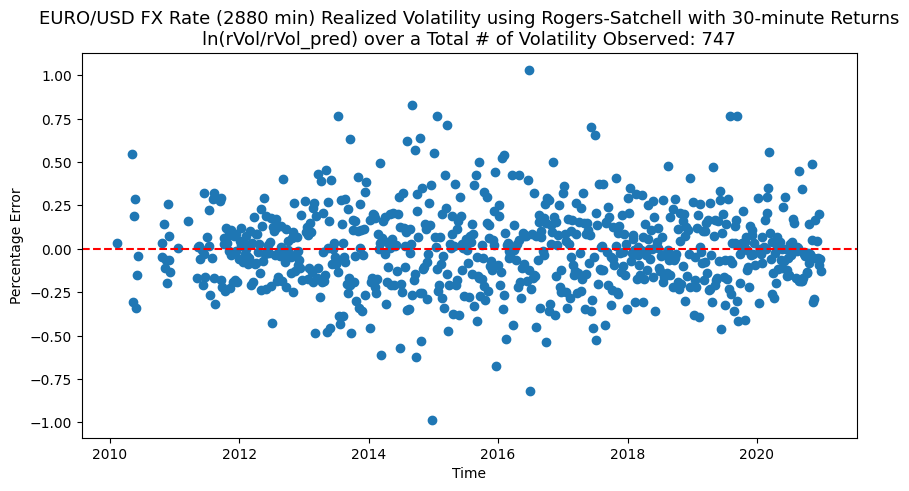

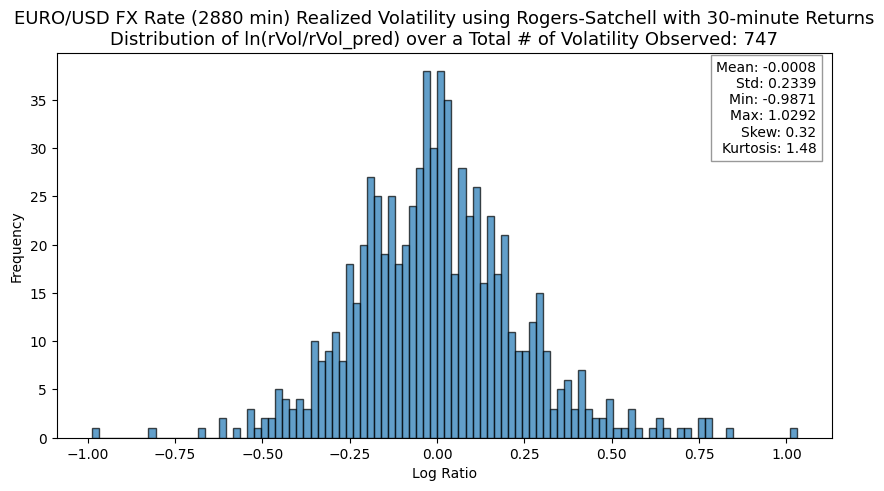

In [408]:
rvol_2880m_rs = calculate_rvol(data, vol_measure='Rogers-Satchell', timeframe=2880, minute_interval= 30, threshold=0.1, vol_title= 'RVol_2880min_Rogers-Satchell') # Choose 'Garman-Klass', 'Rogers-Satchell', or 'Close-to-Close'

In [409]:
rvol_2880m_rs['RVol_2880min_Rogers-Satchell'].describe()

count    748.000000
mean       8.379538
std        3.228517
min        2.552885
25%        6.207809
50%        7.832598
75%        9.730757
max       24.943974
Name: RVol_2880min_Rogers-Satchell, dtype: float64

In [410]:
def average_dist_pred_rvol(data):
    # compute group_id[i] - group_id[i-1] for all i
    diffs = data['group_id'].diff().iloc[1:]
    return diffs.mean()

In [411]:
RS_120m_rvol#.head(20)

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2010-01-04 03:59:00 2010-01-04 02:00:00 2010-01-04 02:00:00     1.42970   
2010-01-04 05:59:00 2010-01-04 04:00:00 2010-01-04 04:00:00     1.43370   
2010-01-04 07:59:00 2010-01-04 06:00:00 2010-01-04 06:00:00     1.43740   
2010-01-04 09:59:00 2010-01-04 08:00:00 2010-01-04 08:00:00     1.43980   
2010-01-04 11:59:00 2010-01-04 10:00:00 2010-01-04 10:00:00     1.44250   
...                                 ...                 ...         ...   
2020-12-31 07:59:00 2020-12-31 06:00:00 2020-12-31 06:00:00     1.22794   
2020-12-31 09:59:00 2020-12-31 08:00:00 2020-12-31 08:00:00     1.22716   
2020-12-31 11:59:00 2020-12-31 10:00:00 2020-12-31 10:00:00     1.22692   
2020-12-31 13:59:00 2020-12-31 12:00:00 2020-12-31 12:00:00     1.22298   
2020-12-31 15:59:00 2020-12-31 14:00:00 2020-12-31 14:00:00     1.22166   

                     High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
EndDateTime                                                                     
2010-01-04 03:59:00   1.43390  1.42690     1.43350         0.0            2.0   
2010-01-04 05:59:00   1.43990  1.43360     1.43750         0.0            2.0   
2010-01-04 07:59:00   1.44170  1.43740     1.43970         0.0            8.0   
2010-01-04 09:59:00   1.44500  1.43870     1.44230         0.0            4.0   
2010-01-04 11:59:00   1.44560  1.44030     1.44180         0.0            0.0   
...                       ...      ...         ...         ...            ...   
2020-12-31 07:59:00   1.22878  1.22595     1.22716         0.0            0.0   
2020-12-31 09:59:00   1.22870  1.22640     1.22692         0.0            0.0   
2020-12-31 11:59:00   1.22704  1.22208     1.22299         0.0            0.0   
2020-12-31 13:59:00   1.22346  1.22149     1.22166         0.0            0.0   
2020-12-31 15:59:00   1.22228  1.22091     1.22158         0.0            4.0   

                     count  RVol_120min_Rogers-Satchell  
EndDateTime                                              
2010-01-04 03:59:00  118.0                    11.189197  
2010-01-04 05:59:00  118.0                    11.446877  
2010-01-04 07:59:00  112.0                    10.225655  
2010-01-04 09:59:00  116.0                    12.183210  
2010-01-04 11:59:00  120.0                    12.555326  
...                    ...                          ...  
2020-12-31 07:59:00  120.0                     6.980137  
2020-12-31 09:59:00  120.0                     7.237472  
2020-12-31 11:59:00  120.0                    11.611514  
2020-12-31 13:59:00  120.0                     6.482992  
2020-12-31 15:59:00  116.0                     3.894657  

[30124 rows x 10 columns]

In [412]:
#RS_120m_rvol.to_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol_RV_Rogers-Satchell.csv", index=False)

In [413]:
df

time     ms           time.1   ms.1        bid   \
0      2025-02-19 08:00:00  0.000  2/19/25 8:00 AM  0.000  609.603988   
1      2025-02-19 08:00:00  0.333  2/19/25 8:00 AM  0.333  609.609069   
2      2025-02-19 08:00:00  0.667  2/19/25 8:00 AM  0.667  609.609857   
3      2025-02-19 08:00:00  0.000  2/19/25 8:00 AM  0.000  609.611744   
4      2025-02-19 08:00:00  0.333  2/19/25 8:00 AM  0.333  609.606529   
...                    ...    ...              ...    ...         ...   
864028                 NaT    NaN              NaN    NaN         NaN   
864029                 NaT    NaN              NaN    NaN         NaN   
864030                 NaT    NaN              NaN    NaN         NaN   
864031                 NaT    NaN              NaN    NaN         NaN   
864032                 NaT    NaN              NaN    NaN         NaN   

               ask         mid              minute  group_id  
0       609.637854  609.620921 2025-02-19 08:00:00       0.0  
1       609.642935  609.626002 2025-02-19 08:00:00       0.0  
2       609.643724  609.626790 2025-02-19 08:00:00       0.0  
3       609.645610  609.628677 2025-02-19 08:00:00       0.0  
4       609.640396  609.623462 2025-02-19 08:00:00       0.0  
...            ...         ...                 ...       ...  
864028         NaN         NaN                 NaT       NaN  
864029         NaN         NaN                 NaT       NaN  
864030         NaN         NaN                 NaT       NaN  
864031         NaN         NaN                 NaT       NaN  
864032         NaN         NaN                 NaT       NaN  

[864033 rows x 9 columns]

In [414]:
def generate_14_day_stability_groups(df, vol_col, stability_days):
    df = df.copy()
    df.sort_index(inplace=True)

    # Step 1: Create rVol_p and log-ratio columns
    df['rVol_p'] = df[vol_col].shift(1)
    df['log_ratio'] = np.log(df[vol_col] / df['rVol_p'])
    df.dropna(inplace=True)
    

    

    # Step 2: Create Stability Group ID
    start_time = df.index.min().floor('D')
    df['Stability_group_id'] = ((df.index - start_time) // pd.Timedelta(days=stability_days)) * pd.Timedelta(days=stability_days) + start_time

    # Reset index
    df.reset_index(inplace=True)

    # Step 3: Aggregate all required fields
    grouped = df.groupby("Stability_group_id")

    result = grouped.agg(
        StartDateTime=('StartDateTime', 'first'),
        EndDateTime=('EndDateTime', 'last'),
        Open_first=('Open_first', 'first'),
        High_max=('High_max', 'max'),
        Low_min=('Low_min', 'min'),
        Close_last=('Close_last', 'last'),
        Volume_sum=('Volume_sum', 'sum'),
        indicator_sum=('indicator_sum', 'sum'),
        count=('count', 'sum'),
        Vol_mean=(vol_col, 'mean'),
        Vol_std=(vol_col, 'std'),
        Vol_skew=(vol_col, lambda x: skew(x, bias=False) if len(x) > 1 else np.nan),
        Vol_kurtosis=(vol_col, lambda x: kurtosis(x, bias=False) if len(x) > 1 else np.nan),
        #Vol_present=(vol_col, lambda x: x.notna().sum()),
        Log_ratio_Count=('log_ratio', lambda x: x.notna().sum()),
        Log_ratio_Mean=('log_ratio', 'mean'),
        Log_ratio_Std=('log_ratio', 'std'),
        Log_ratio_Skew=('log_ratio', lambda x: skew(x, bias=False) if len(x) > 1 else np.nan),
        Log_ratio_Kurtosis=('log_ratio', lambda x: kurtosis(x, bias=False) if len(x) > 1 else np.nan)
    )

    # Step 4: Add group end date
    result['Stability_group_end'] = result.index + pd.Timedelta(days=stability_days) - pd.Timedelta(seconds=1)

    return result


In [415]:
# Generate the 14-day grouped dataset
grouped_14_day_df = generate_14_day_stability_groups(RS_120m_rvol, vol_col='RVol_120min_Rogers-Satchell', stability_days=14)

In [416]:
#grouped_14_day_df.to_csv(r"C:\Users\estifo\Downloads\SPY1Day15Vol_RV_Rogers-Satchell_14DayGroups.csv")

In [417]:
grouped_14_day_df

StartDateTime         EndDateTime  Open_first  \
Stability_group_id                                                       
2010-01-04         2010-01-04 04:00:00 2010-01-15 13:59:00     1.43370   
2010-01-18         2010-01-18 02:00:00 2010-01-31 21:59:00     1.43870   
2010-02-01         2010-02-01 02:00:00 2010-02-12 11:59:00     1.38820   
2010-02-15         2010-02-15 02:00:00 2010-02-28 21:59:00     1.35920   
2010-03-01         2010-03-01 02:00:00 2010-03-12 11:59:00     1.35960   
...                                ...                 ...         ...   
2020-10-26         2020-10-26 00:00:00 2020-11-08 23:59:00     1.18327   
2020-11-09         2020-11-09 00:00:00 2020-11-22 23:59:00     1.18867   
2020-11-23         2020-11-23 00:00:00 2020-12-06 23:59:00     1.18730   
2020-12-07         2020-12-07 00:00:00 2020-12-20 23:59:00     1.21326   
2020-12-21         2020-12-21 00:00:00 2020-12-31 15:59:00     1.21908   

                    High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
Stability_group_id                                                             
2010-01-04           1.45790  1.42630     1.43760         0.0          229.0   
2010-01-18           1.44110  1.38520     1.38640         0.0          252.0   
2010-02-01           1.40250  1.35310     1.36240         0.0          227.0   
2010-02-15           1.37880  1.34420     1.36030         0.0          236.0   
2010-03-01           1.37950  1.34360     1.37510         0.0          187.0   
...                      ...      ...         ...         ...            ...   
2020-10-26           1.18952  1.16026     1.18867         0.0           28.0   
2020-11-09           1.19199  1.17454     1.18731         0.0           67.0   
2020-11-23           1.21773  1.17997     1.21326         0.0           89.0   
2020-12-07           1.22726  1.20587     1.21908         0.0           76.0   
2020-12-21           1.23101  1.21296     1.22158         0.0           59.0   

                      count   Vol_mean   Vol_std  Vol_skew  Vol_kurtosis  \
Stability_group_id                                                         
2010-01-04           6611.0  10.987736  2.736475  2.541409     10.503559   
2010-01-18           7548.0  11.666805  3.240621  1.382926      2.325560   
2010-02-01           7813.0  12.228733  4.104351  1.278839      1.623881   
2010-02-15           7324.0  12.096616  3.389888  1.247713      3.018729   
2010-03-01           6413.0  12.384224  3.522506  0.896584      0.476373   
...                     ...        ...       ...       ...           ...   
2020-10-26          13532.0   7.461027  4.240169  1.896496      5.351467   
2020-11-09          13493.0   6.255852  3.433597  1.806790      4.809583   
2020-11-23          12271.0   5.878523  2.929603  0.937307      0.708689   
2020-12-07          13364.0   6.073167  3.080027  1.078347      1.738806   
2020-12-21          10261.0   6.349479  2.755343  0.742052     -0.262495   

                    Log_ratio_Count  Log_ratio_Mean  Log_ratio_Std  \
Stability_group_id                                                   
2010-01-04                       57       -0.008124       0.281000   
2010-01-18                       65        0.004506       0.288432   
2010-02-01                       67        0.009487       0.309795   
2010-02-15                       63       -0.009024       0.348627   
2010-03-01                       55        0.005248       0.358066   
...                             ...             ...            ...   
2020-10-26                      113        0.002628       0.407770   
2020-11-09                      113       -0.007034       0.369081   
2020-11-23                      103        0.002218       0.436383   
2020-12-07                      112        0.004452       0.477404   
2020-12-21                       86        0.001709       0.436511   

                    Log_ratio_Skew  Log_ratio_Kurtosis Stability_group_end  
Stability_group_id                          

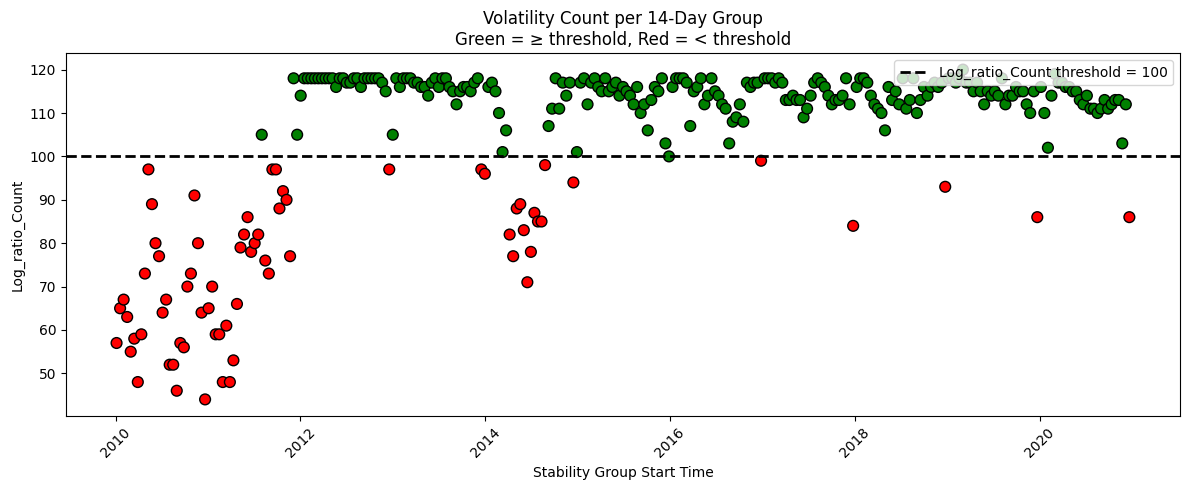

Stability_group_id
2010-01-04     57
2010-01-18     65
2010-02-01     67
2010-02-15     63
2010-03-01     55
             ... 
2020-10-26    113
2020-11-09    113
2020-11-23    103
2020-12-07    112
2020-12-21     86
Name: Log_ratio_Count, Length: 287, dtype: int64

In [418]:


def plot_vol_present_scatter(df_grouped, threshold=100):
    """
    Plot a scatter of Vol_present per stability group.
    Green = group has enough volatility points (≥ threshold)
    Red = group has too few (< threshold)
    """
    vol_present = df_grouped["Log_ratio_Count"]
    passed = vol_present >= threshold

    plt.figure(figsize=(12, 5))
    plt.scatter(
        vol_present.index, vol_present.values,
        c=['green' if ok else 'red' for ok in passed],
        edgecolor='k', s=60
    )
    plt.axhline(y=threshold, color='black', linestyle='--', linewidth=2,
                label=f"Log_ratio_Count threshold = {threshold}")
    plt.xticks(rotation=45)
    plt.xlabel('Stability Group Start Time')
    plt.ylabel('Log_ratio_Count')
    plt.title('Volatility Count per 14-Day Group\nGreen = ≥ threshold, Red = < threshold')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
    return vol_present

plot_vol_present_scatter(grouped_14_day_df, threshold=100)

In [419]:
import matplotlib.pyplot as plt

#def plot_log_rvol_ratio_statistics(df_grouped):
    """
    Plot mean, std dev, skewness, and kurtosis of ln(rVol / rVol_p)
    across 14-day stability groups, with x-axis labels on all subplots.
    """
    fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

    axs[0].scatter(df_grouped.index, df_grouped['Log_Mean'], color='blue', s=30)
    axs[0].set_ylabel('Mean')
    axs[0].set_title('Mean of ln(rVol / rVol_p)')
    axs[0].tick_params(labelbottom=True)

    axs[1].scatter(df_grouped.index, df_grouped['Log_Std'], color='orange', s=30)
    axs[1].set_ylabel('Std Dev')
    axs[1].set_title('Std Dev of ln(rVol / rVol_p)')
    axs[1].tick_params(labelbottom=True)

    axs[2].scatter(df_grouped.index, df_grouped['Log_Skew'], color='green', s=30)
    axs[2].set_ylabel('Skewness')
    axs[2].set_title('Skewness of ln(rVol / rVol_p)')
    axs[2].tick_params(labelbottom=True)

    axs[3].scatter(df_grouped.index, df_grouped['Log_Kurtosis'], color='red', s=30)
    axs[3].set_ylabel('Kurtosis')
    axs[3].set_xlabel('Stability Group Start Time')
    axs[3].set_title('Kurtosis of ln(rVol / rVol_p)')

    plt.suptitle('Log-Volatility Ratio Statistics Over 14-Day Groups', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

#

#plot_log_rvol_ratio_statistics(grouped_14_day_df)

IndentationError: unexpected indent (2845223613.py, line 4)

In [ ]:
def plot_log_rvol_ratio_statistics_filtered(df_grouped, threshold=100):
    """
    Filter groups with sufficient log-rVol ratio counts and plot mean, std dev,
    skewness, and kurtosis of ln(rVol / rVol_p) for those groups only.
    """
    # Filter the DataFrame for groups meeting the threshold
    sufficient_data = df_grouped[df_grouped["Log_ratio_Count"] >= threshold]

    # Set up the subplots
    fig, axs = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

    # Plotting each metric
    axs[0].scatter(sufficient_data.index, sufficient_data['Log_ratio_Mean'], color='blue', s=30)
    axs[0].set_ylabel('Mean')
    axs[0].set_title('Mean of ln(rVol / rVol_p)')
    axs[0].tick_params(labelbottom=True)

    axs[1].scatter(sufficient_data.index, sufficient_data['Log_ratio_Std'], color='orange', s=30)
    axs[1].set_ylabel('Std Dev')
    axs[1].set_title('Std Dev of ln(rVol / rVol_p)')
    axs[1].tick_params(labelbottom=True)

    axs[2].scatter(sufficient_data.index, sufficient_data['Log_ratio_Skew'], color='green', s=30)
    axs[2].set_ylabel('Skewness')
    axs[2].set_title('Skewness of ln(rVol / rVol_p)')
    axs[2].tick_params(labelbottom=True)

    axs[3].scatter(sufficient_data.index, sufficient_data['Log_ratio_Kurtosis'], color='red', s=30)
    axs[3].set_ylabel('Kurtosis')
    axs[3].set_xlabel('Stability Group Start Time')
    axs[3].set_title('Kurtosis of ln(rVol / rVol_p)')

    # Final layout
    plt.suptitle(f'Log-Volatility Ratio Statistics (Groups with ≥ {threshold} Log_ratio_Count)', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
   

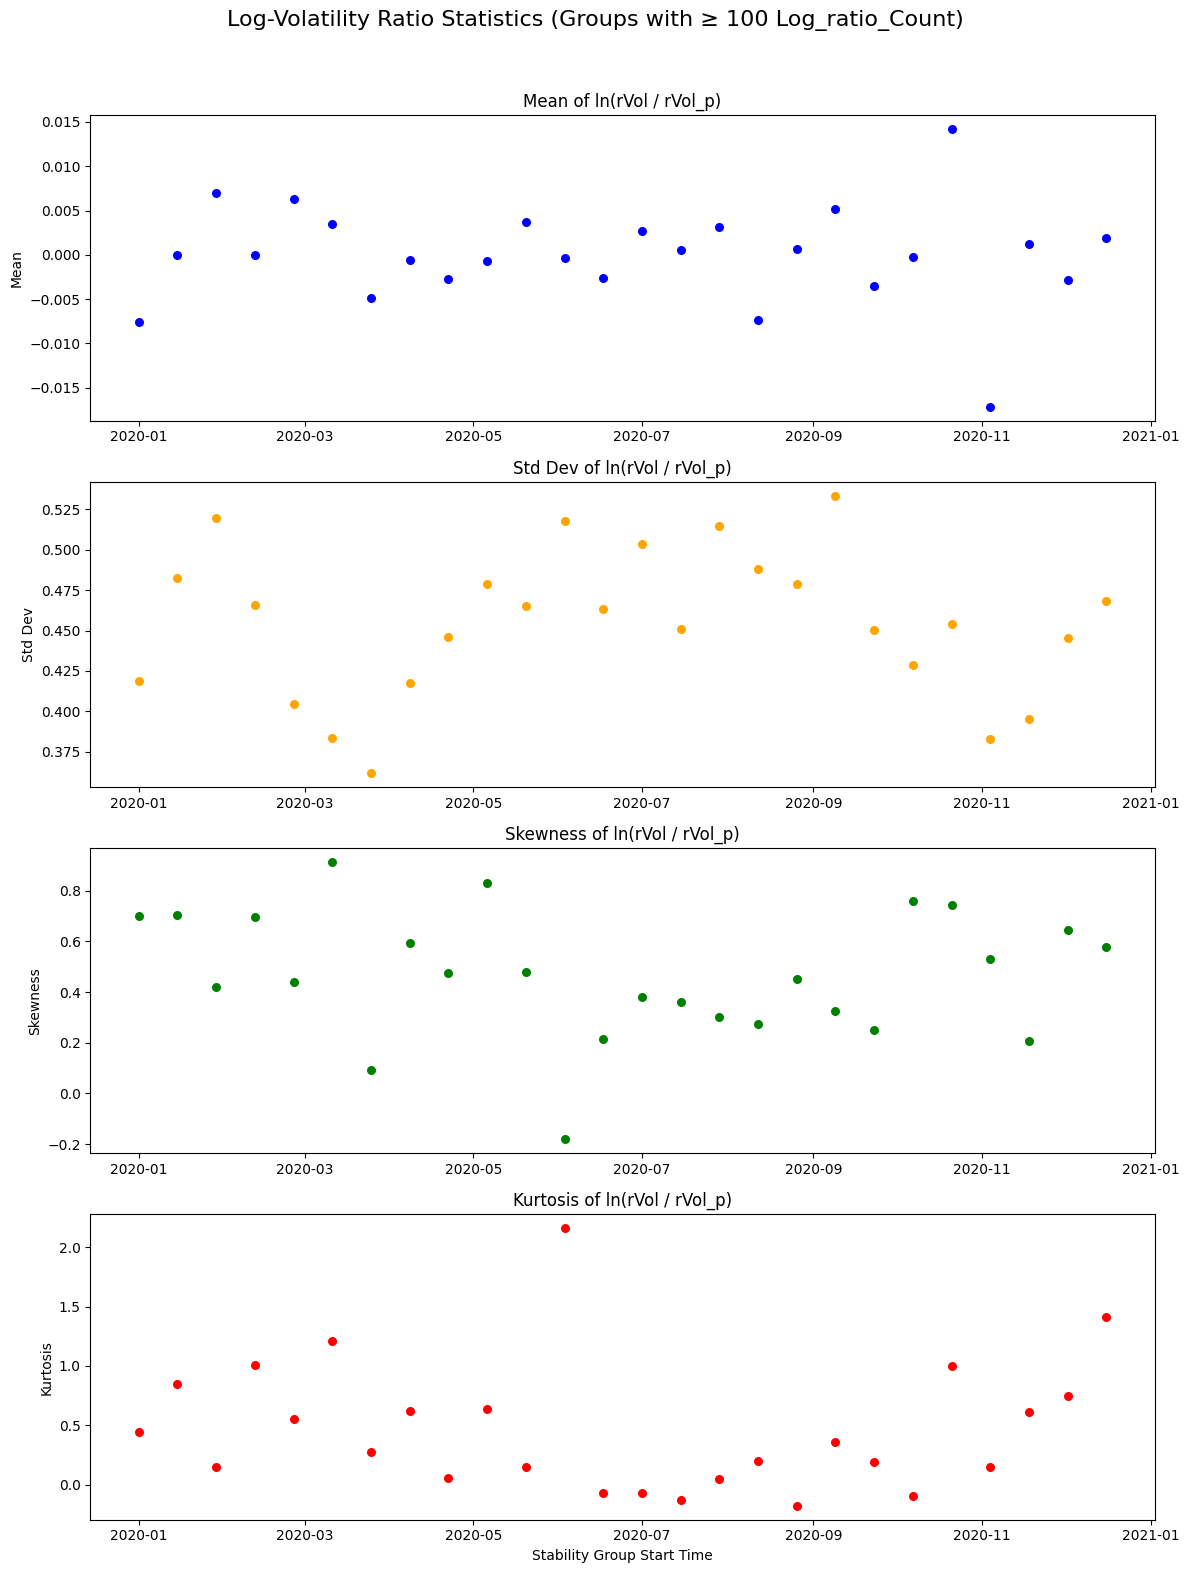

In [ ]:
plot_log_rvol_ratio_statistics_filtered(grouped_14_day_df, threshold=100)

In [ ]:
RS_120m_rvol['group_id'].describe()

count                             2928
mean     2020-06-30 21:49:20.655737600
min                2020-01-01 18:00:00
25%                2020-04-01 09:30:00
50%                2020-06-29 23:00:00
75%                2020-09-29 15:00:00
max                2020-12-31 16:00:00
Name: group_id, dtype: object

In [ ]:
average_dist_pred_rvol(RS_120m_rvol)

Timedelta('0 days 02:59:31.711650153')

In [ ]:
RS_720m_rvol.dropna(inplace=True)
RS_720m_rvol.head(20)

group_id       StartDateTime  Open_first  \
EndDateTime                                                               
2020-01-02 00:00:00 2020-01-01 12:00:00 2020-01-01 17:00:00     1.12120   
2020-01-02 12:00:00 2020-01-02 00:00:00 2020-01-02 00:05:00     1.12012   
2020-01-03 00:00:00 2020-01-02 12:00:00 2020-01-02 12:05:00     1.11656   
2020-01-03 12:00:00 2020-01-03 00:00:00 2020-01-03 00:05:00     1.11701   
2020-01-06 12:00:00 2020-01-06 00:00:00 2020-01-06 00:00:00     1.11644   
2020-01-07 00:00:00 2020-01-06 12:00:00 2020-01-06 12:05:00     1.11855   
2020-01-07 12:00:00 2020-01-07 00:00:00 2020-01-07 00:05:00     1.11903   
2020-01-08 00:00:00 2020-01-07 12:00:00 2020-01-07 12:05:00     1.11383   
2020-01-08 12:00:00 2020-01-08 00:00:00 2020-01-08 00:05:00     1.11491   
2020-01-09 00:00:00 2020-01-08 12:00:00 2020-01-08 12:05:00     1.11182   
2020-01-09 12:00:00 2020-01-09 00:00:00 2020-01-09 00:05:00     1.11157   
2020-01-10 00:00:00 2020-01-09 12:00:00 2020-01-09 12:05:00     1.11049   
2020-01-10 12:00:00 2020-01-10 00:00:00 2020-01-10 00:05:00     1.11076   
2020-01-13 12:00:00 2020-01-13 00:00:00 2020-01-13 00:00:00     1.11272   
2020-01-14 00:00:00 2020-01-13 12:00:00 2020-01-13 12:05:00     1.11374   
2020-01-14 12:00:00 2020-01-14 00:00:00 2020-01-14 00:05:00     1.11363   
2020-01-15 00:00:00 2020-01-14 12:00:00 2020-01-14 12:05:00     1.11289   
2020-01-15 12:00:00 2020-01-15 00:00:00 2020-01-15 00:05:00     1.11325   
2020-01-16 00:00:00 2020-01-15 12:00:00 2020-01-15 12:05:00     1.11597   
2020-01-16 12:00:00 2020-01-16 00:00:00 2020-01-16 00:05:00     1.11516   

                     High_max  Low_min  Close_last  Volume_sum  indicator_sum  \
EndDateTime                                                                     
2020-01-02 00:00:00   1.12245  1.12008     1.12012         0.0           25.0   
2020-01-02 12:00:00   1.12141  1.11649     1.11654         0.0            0.0   
2020-01-03 00:00:00   1.11784  1.11635     1.11700         0.0           36.0   
2020-01-03 12:00:00   1.11798  1.11249     1.11719         0.0            0.0   
2020-01-06 12:00:00   1.12055  1.11571     1.11855         0.0            4.0   
2020-01-07 00:00:00   1.11989  1.11842     1.11903         0.0           46.0   
2020-01-07 12:00:00   1.11924  1.11335     1.11384         0.0            4.0   
2020-01-08 00:00:00   1.11682  1.11378     1.11492         0.0            5.0   
2020-01-08 12:00:00   1.11549  1.11087     1.11183         0.0            1.0   
2020-01-09 00:00:00   1.11259  1.11016     1.11157         0.0           16.0   
2020-01-09 12:00:00   1.11204  1.10924     1.11048         0.0            1.0   
2020-01-10 00:00:00   1.11113  1.11020     1.11075         0.0           28.0   
2020-01-10 12:00:00   1.11205  1.10850     1.11180         0.0            1.0   
2020-01-13 12:00:00   1.11469  1.11125     1.11373         0.0            4.0   
2020-01-14 00:00:00   1.11448  1.11312     1.11364         0.0           17.0   
2020-01-14 12:00:00   1.11444  1.11045     1.11289         0.0            8.0   
2020-01-15 00:00:00   1.11348  1.11246     1.11325         0.0           26.0   
2020-01-15 12:00:00   1.11634  1.11185     1.11597         0.0           11.0   
2020-01-16 00:00:00   1.11614  1.11481     1.11516         0.0           25.0   
2020-01-16 12:00:00   1.11727  1.11279     1.11300         0.0            0.0   

                     n_minus_1_mean  RVol_720min_Rogers-Satchell  
EndDateTime                                                       
2020-01-02 00:00:00            84.0                     1.756534  
2020-01-02 12:00:00           143.0                     4.927517  
2020-01-03 00:00:00           143.0                     3.077725  
2020-01-03 12:00:00           143.0                     5.607314  
2020-01-06 12:00:00           144.0                     4.190192  
2020-01-07 00:00:00           141.0                     2.135549  
2020-01-07 12:00:00           143.0                     5.768

<Axes: xlabel='EndDateTime'>

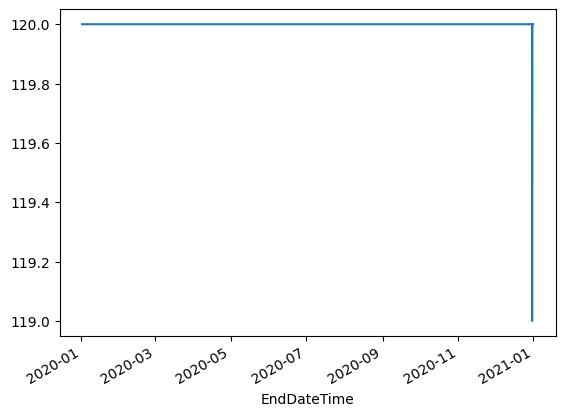

In [ ]:
p = RS_120m_rvol['count'] + RS_120m_rvol['indicator_sum']
p.plot()

In [ ]:
RS_720m_rvol['group_id'].describe()

count                              466
mean     2020-07-01 10:59:44.549356032
min                2020-01-01 12:00:00
25%                2020-04-01 15:00:00
50%                2020-07-01 06:00:00
75%                2020-09-29 21:00:00
max                2020-12-31 12:00:00
Name: group_id, dtype: object

In [ ]:
average_dist_pred_rvol(RS_720m_rvol)

Timedelta('0 days 18:50:19.354838709')

In [ ]:
rvol_2880m_rs

group_id       StartDateTime  Open_first  High_max  \
EndDateTime                                                                
2020-01-03 00:00:00 2020-01-01 2020-01-01 17:00:00     1.12120   1.12245   
2020-01-09 00:00:00 2020-01-07 2020-01-07 00:00:00     1.11908   1.11924   
2020-01-15 00:00:00 2020-01-13 2020-01-13 00:00:00     1.11272   1.11469   
2020-01-17 00:00:00 2020-01-15 2020-01-15 00:30:00     1.11325   1.11727   
2020-01-23 00:00:00 2020-01-21 2020-01-21 00:00:00     1.10992   1.11179   
...                        ...                 ...         ...       ...   
2020-12-16 00:00:00 2020-12-14 2020-12-14 00:00:00     1.21331   1.21767   
2020-12-18 00:00:00 2020-12-16 2020-12-16 00:30:00     1.21644   1.22726   
2020-12-24 00:00:00 2020-12-22 2020-12-22 00:00:00     1.22230   1.22570   
2020-12-30 00:00:00 2020-12-28 2020-12-28 00:00:00     1.22102   1.22948   
2020-12-31 17:00:00 2020-12-30 2020-12-30 00:30:00     1.22842   1.23101   

                     Low_min  Close_last  Volume_sum  indicator_sum  \
EndDateTime                                                           
2020-01-03 00:00:00  1.11635     1.11700         0.0           61.0   
2020-01-09 00:00:00  1.11016     1.11154         0.0           26.0   
2020-01-15 00:00:00  1.11045     1.11325         0.0           55.0   
2020-01-17 00:00:00  1.11185     1.11319         0.0           74.0   
2020-01-23 00:00:00  1.10700     1.10852         0.0           72.0   
...                      ...         ...         ...            ...   
2020-12-16 00:00:00  1.21210     1.21645         0.0           76.0   
2020-12-18 00:00:00  1.21250     1.22405         0.0           28.0   
2020-12-24 00:00:00  1.21520     1.22043         0.0           59.0   
2020-12-30 00:00:00  1.21913     1.22839         0.0           59.0   
2020-12-31 17:00:00  1.22091     1.22153         0.0           28.0   

                     n_minus_1_mean  RVol_2880min_Rogers-Satchell  
EndDateTime                                                        
2020-01-03 00:00:00            62.0                      2.991703  
2020-01-09 00:00:00            96.0                      5.063266  
2020-01-15 00:00:00            96.0                      3.850530  
2020-01-17 00:00:00            95.0                      3.846364  
2020-01-23 00:00:00            96.0                      3.682005  
...                             ...                           ...  
2020-12-16 00:00:00            96.0                      5.771181  
2020-12-18 00:00:00            95.0                      6.918203  
2020-12-24 00:00:00            96.0                      6.576771  
2020-12-30 00:00:00            96.0                      5.775770  
2020-12-31 17:00:00            81.0                      6.572968  

[78 rows x 10 columns]

In [ ]:
rvol_2880m_rs['n_minus_1_mean']+rvol_2880m_rs['indicator_sum']

EndDateTime
2020-01-03 00:00:00    123.0
2020-01-09 00:00:00    122.0
2020-01-15 00:00:00    151.0
2020-01-17 00:00:00    169.0
2020-01-23 00:00:00    168.0
                       ...  
2020-12-16 00:00:00    172.0
2020-12-18 00:00:00    123.0
2020-12-24 00:00:00    155.0
2020-12-30 00:00:00    155.0
2020-12-31 17:00:00    109.0
Length: 78, dtype: float64

In [ ]:
average_dist_pred_rvol(rvol_2880m_rs)

Timedelta('4 days 17:27:16.363636363')